# Boston
_Ch 02 - Q10 (applied)_  

__Description__  
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.

__Source__  
The data was originally published by Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

__References__  
This dataset is a part of the course material of the book : ___Introduction to Statistical Learning with R___

__Short description of variables__  

variable | description
:--- | :---
crim | per capita crime rate by town
zn | proportion of residential land zoned for lots over 25,000 sq.ft.
indus | proportion of non-retail business acres per town.
chas | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
nox | nitrogen oxides concentration (parts per 10 million).
rm | average number of rooms per dwelling.
age | proportion of owner-occupied units built prior to 1940.
dis | weighted mean of distances to five Boston employment centres.
rad | index of accessibility to radial highways.
tax | full-value property-tax rate per \$10,000.
ptratio | pupil-teacher ratio by town.
black | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
lstat | lower status of the population (percent).
medv | median value of owner-occupied homes in \$1000s.

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<a id='toc2'></a>
### Index
- [1) Load packages](#1%29-Load-packages)  
- [2) Import Data](#2%29-Import-Data)
- [a) Data dimensions](#a%29-Data-dimensions)
- [b) Pairwise comparisons](#b%29-Pairwise-comparisons)
- [c) Predictors associated with crime rate](#c%29-Predictors-associated-with-crime-rate)
- [Defined functions](#Defined-functions)
- [d) Range of predictors](#d%29-Range-of-predictors)
  - [1) Suburbs with High Crime Rate](#1%29-Suburbs-with-High-Crime-Rate)
      - [Observations](#obs-hcr)
  - [2) Suburbs with high tax rate](#2%29-Suburbs-with-high-tax-rate)
      - [Observations](#obs-htr)
  - [3) Suburbs with high pupil-teacher ratio](#3%29-Suburbs-with-high-pupil-teacher-ratio)
      - [Observations](#obs-hptr)
- [e) Suburbs bounding Charles River](#e%29-Suburbs-bounding-Charles-River)
- [f) Median pupil-teacher ratio](#f%29-Median-pupil-teacher-ratio)
- [g) Lowest medv Suburb](#g%29-Lowest-medv-Suburb)
    - [Observations](#obs-medv)
- [h) Suburbs with high average no. of rooms](#h%29-Suburbs-with-high-average-no.-of-rooms)
    - [Observations](#obs-hrmt)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 1) Load packages

In [1]:
# Load packages
library(ggplot2)
# pacman::p_load(tidyverse, reshape2)
library(RColorBrewer)
suppressPackageStartupMessages(library(Hmisc))

#### <i>Some preliminary workings</i>

In [2]:
# Save default parameters
defop = options()
defpar = par(no.readonly=T)

In [3]:
# Function to modify plot parameters
plot_pars = function(w=7, h=5) {options(repr.plot.width=w, repr.plot.height=h)}

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### 2) Import Data

In [4]:
# Import data
suppressPackageStartupMessages(library(MASS))
df = Boston

dim(df)
head(df)

[1] 506  14

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [5]:
# check for NAs
anyNA(df)

[1] FALSE

In [6]:
# structure of data
str(df)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


All of the columns are of a numerical natue and have been recongnized as such by R. With that and no missing values, prima facie, the data appears to be complete.

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### a) Data dimensions
How many rows are in this data set? How many columns? What do the rows and columns represent?

In [7]:
# Shape of data
dim(df)

[1] 506  14

***What do the rows and columns represent?***

Rows represent the 506 census tracts* that comprise the Boston metropolitan area.  
The 14 columns represent variables related to the housing market.

_*Census tract : small areas delineated by the US Bureau of the Census, that serve as statistical approximations of neighborhoods._

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### b) Pairwise comparisons
Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

In [8]:
# No. of pairs
choose(14,2)

[1] 91

We can plot a pairs plot for quick pair-wise comparison.

#### Scatter plots

In [9]:
# Pairs plot panels
panel.hist <- function(x, col="thistle", ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = 'thistle', ...)
}
panel.cor <- function(x, y, digits = 3, prefix = "", cex.cor, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r = cor(x, y)
    r1 <- abs(cor(x, y))
    txt <- format(c(r, 0.123456789), digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = 1.5+cex.cor*abs(r))
}

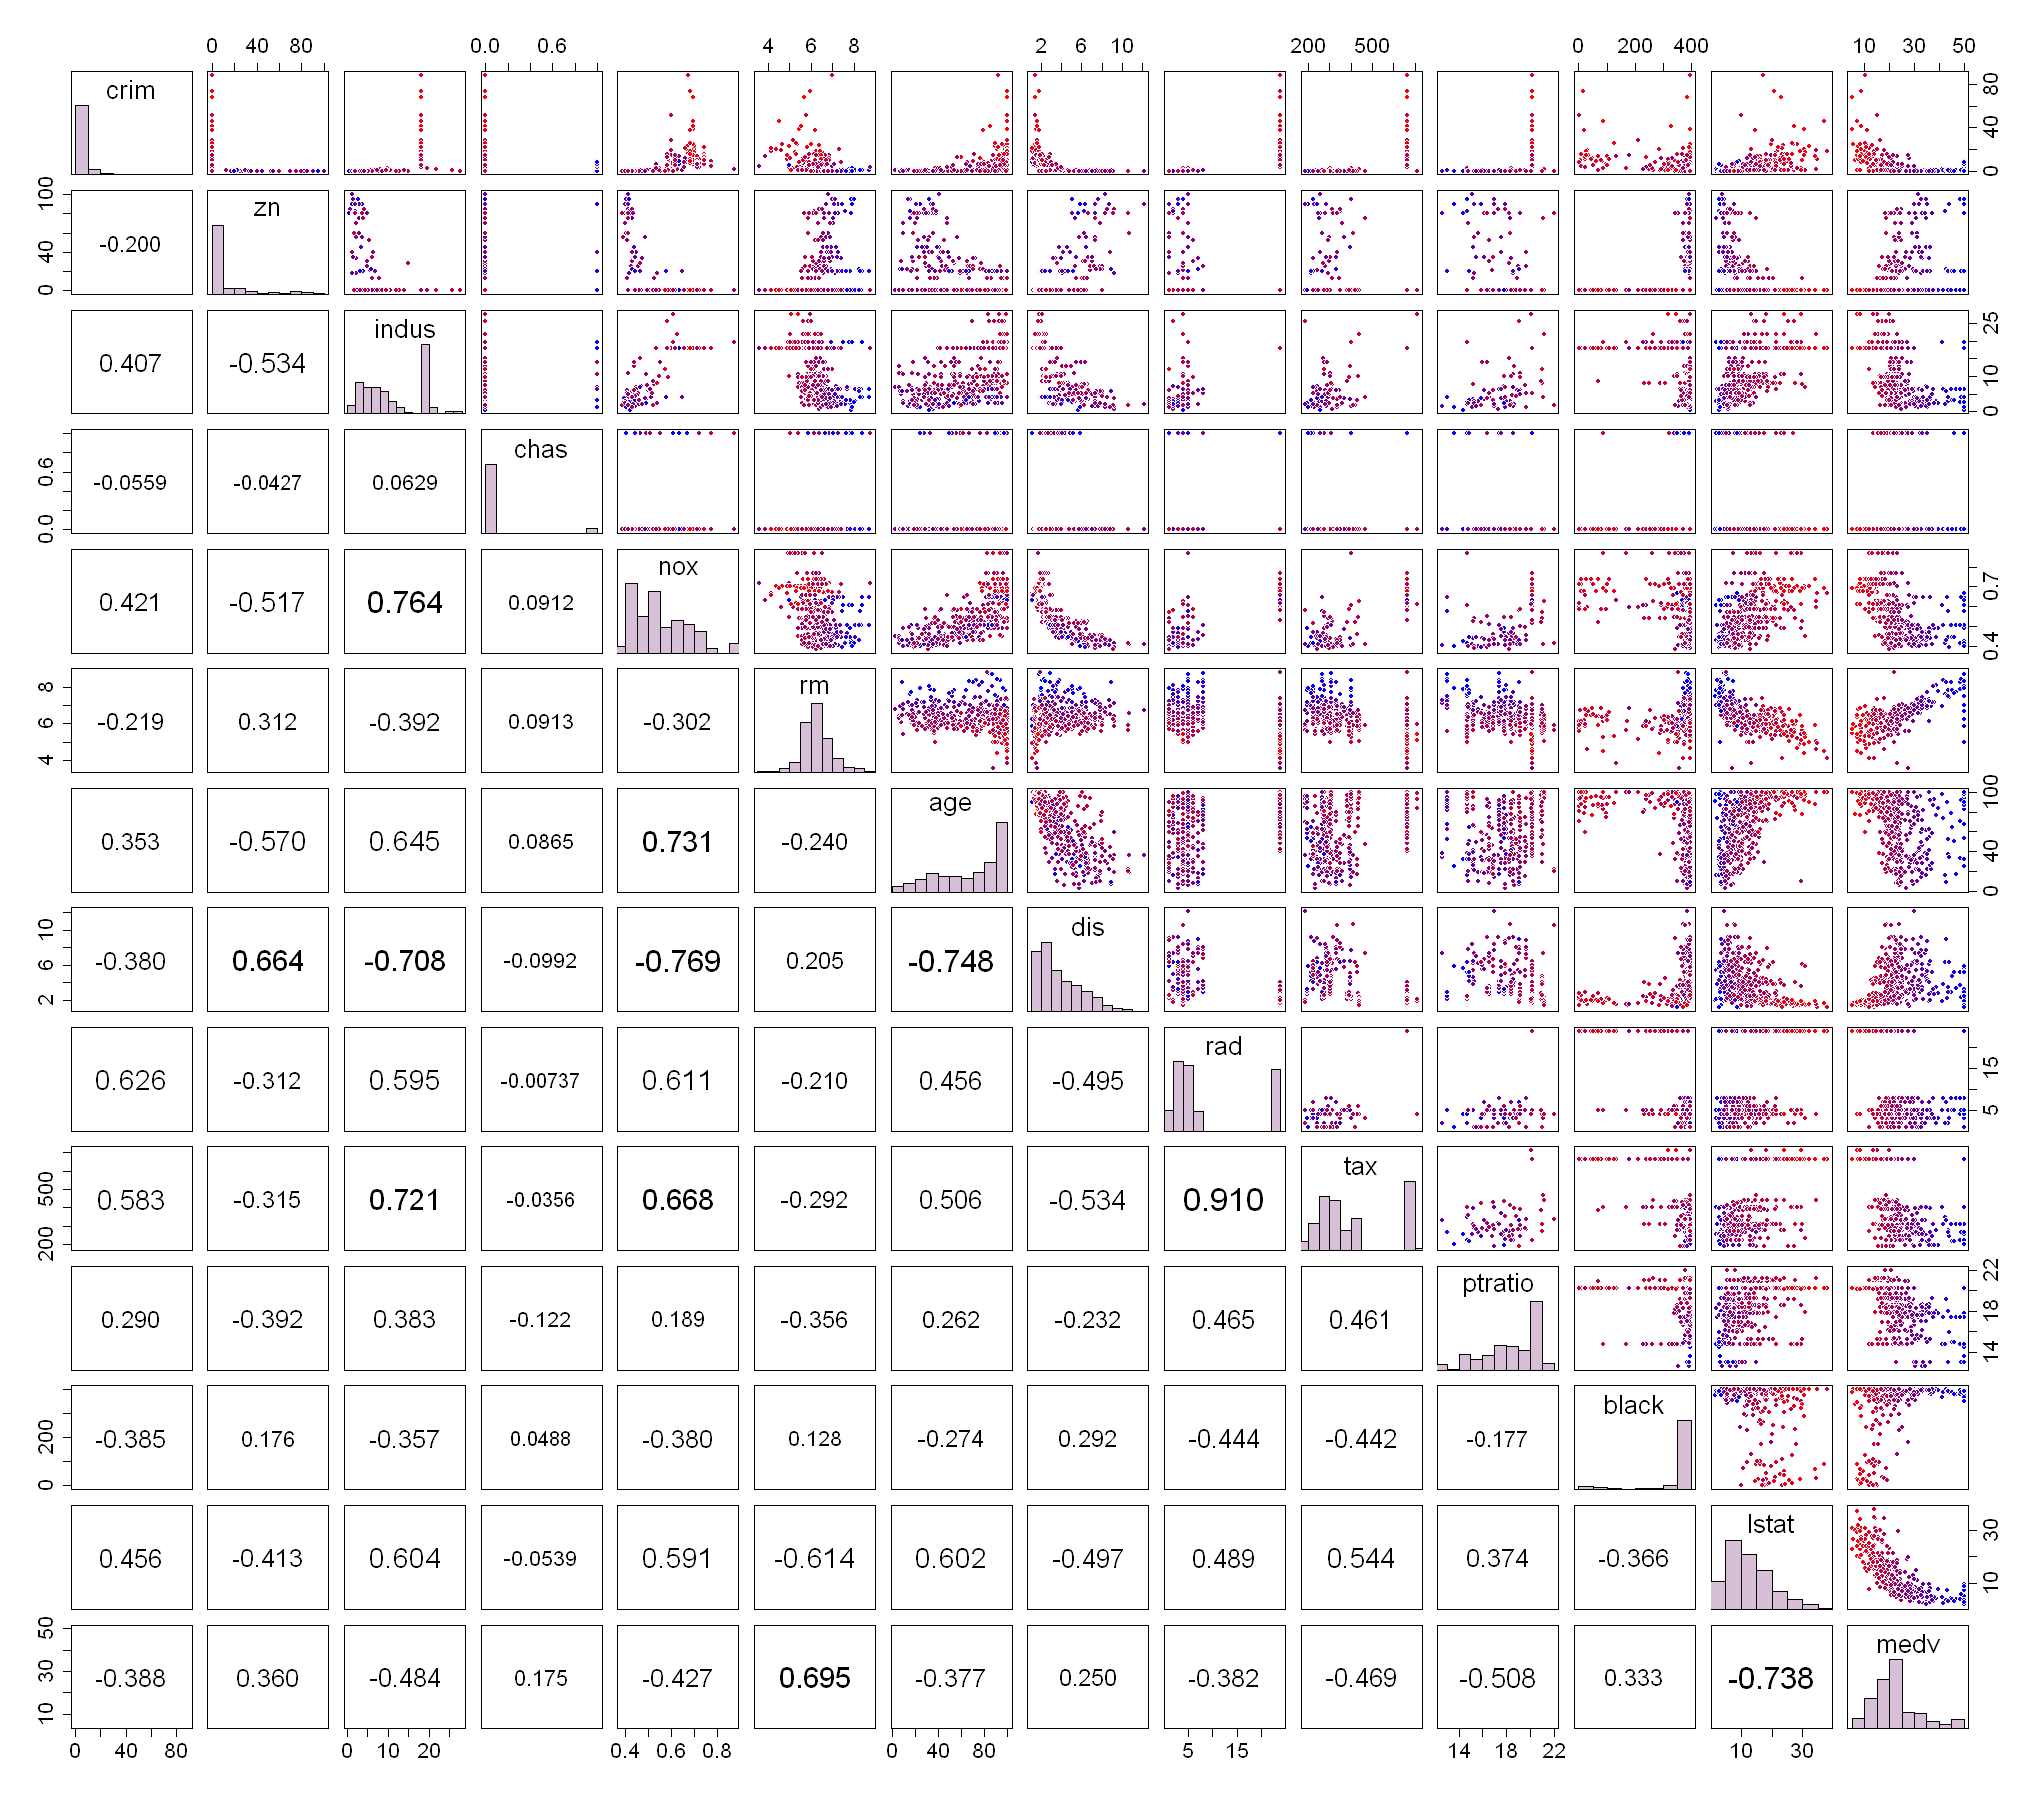

In [10]:
# Generate a continuous color palette
# rbPal = colorRampPalette(c('#BE8895','#281B37'))
rbPal <- colorRampPalette(c('red','blue'))
cols = rbPal(nrow(df))[as.numeric(cut(df$medv, breaks=nrow(df)))]

# Plot
plot_pars(17,15)
pairs(df, cex=1, cex.labels = 2, cex.axis=1.6, pch=21, bg=cols, col='whitesmoke',
      diag.panel=panel.hist, lower.panel=panel.cor)
options(defop)

<div class="alert alert-block alert-info">
<a id=''></a>
<b>Observations:</b><br>
    <b>1) medv &rarr; median house value</b><br>
    &ensp;- Clear correlation with: <br>
    &emsp; • a) lstat &rarr; corr = -0.738 <br> 
    &emsp; &ensp; lstat : proportion of economically disadvantaged sections within the town population <br> 
    &emsp; &ensp; Number of low valued homes could be more within a town, thus bringing down median house value (medv)<br>
    &emsp; • b) rm &rarr; corr = -0.695 <br> 
    &emsp; &ensp; rm : average no. of rooms per dwelling<br> 
    &emsp; &ensp; more rooms >> greater living area >> higher value (medv)<br>
    <b>2) crim &rarr; per capita crime rate</b><br>
    &ensp;- Moderate correlation with: <br>
    &emsp; • a) rad &rarr; corr = 0.626 <br> 
    &emsp; &ensp; rad : index of accessibility to radial highways<br> 
    &emsp; • b) tax &rarr; corr = -0.583 <br> 
    &emsp; &ensp; tax : full-value property-tax rate per $10,000<br>
    <b>3) Other associations that are noticable from the scatter plots:</b><br>
    &emsp; a) nox &rarr; concentration of nitrigen oxide particles<br>
    &emsp; &emsp; • age : towns with higher nox also have higher proportion of older buildings<br>
    &emsp; &emsp; • dis : dis is a measure of how close a town is to the business centers<br> 
    &emsp; &emsp; &emsp; &emsp; Unsurprisingly, towns farther away from the business centers are less polluted<br>
    &emsp; b) rm &rarr; lstat : negative relation<br><br>
    <i>Correlation matrix below</i>
</div>

#### Correlations

In [11]:
# Correlations >= | 0.55 |
corr = cor(df)
as.data.frame(apply(corr, 2, function(x) ifelse(abs(x)>=0.55, round(x, 3), "-")))

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
crim,1,-,-,-,-,-,-,-,0.626,0.583,-,-,-,-
zn,-,1,-,-,-,-,-0.57,0.664,-,-,-,-,-,-
indus,-,-,1,-,0.764,-,0.645,-0.708,0.595,0.721,-,-,0.604,-
chas,-,-,-,1,-,-,-,-,-,-,-,-,-,-
nox,-,-,0.764,-,1,-,0.731,-0.769,0.611,0.668,-,-,0.591,-
rm,-,-,-,-,-,1,-,-,-,-,-,-,-0.614,0.695
age,-,-0.57,0.645,-,0.731,-,1,-0.748,-,-,-,-,0.602,-
dis,-,0.664,-0.708,-,-0.769,-,-0.748,1,-,-,-,-,-,-
rad,0.626,-,0.595,-,0.611,-,-,-,1,0.91,-,-,-,-


[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### c) Predictors associated with crime rate
Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

<b><i>crim - variable analysis</i></b>

In [12]:
range(df$crim)

[1]  0.00632 88.97620

In [13]:
# Percentiles
perc = round(quantile(df$crim, c(0.10, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99)),3)
perc

10%    25%    50%    75%    90%    95%    99% 
 0.038  0.082  0.257  3.677 10.753 15.789 41.370

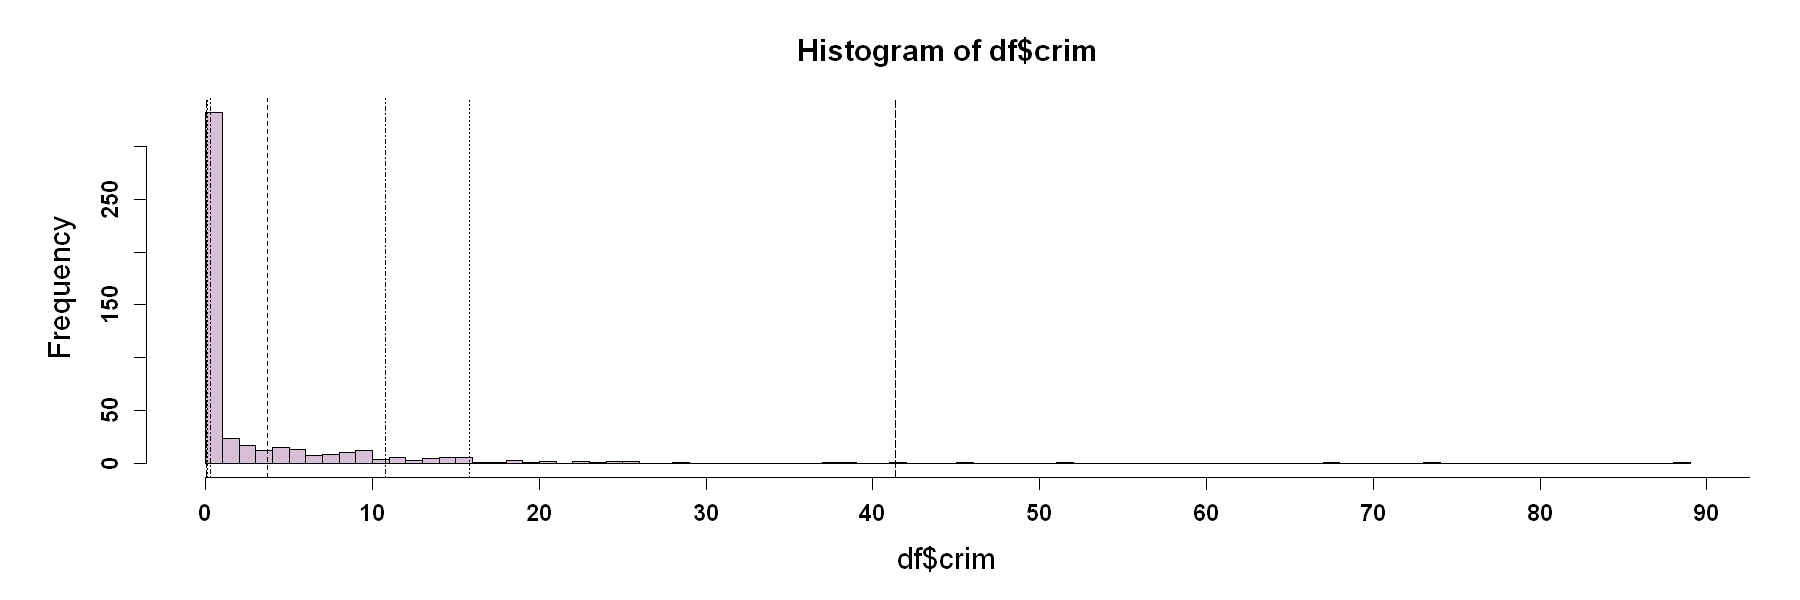

In [14]:
# Distribution of crim
plot_pars(15, 5)
par(oma=c(0,0+2,0,0))
hist(df$crim, nclass='FD', col='thistle', xaxt='n', 
     cex.main=1.5, cex.lab=1.5, cex.axis=1.2, font.axis=2)
axis(side=1, at=seq(0, 100, 10), cex.axis=1.2, font.axis=2)
for (i in perc) {
    abline(v=quantile(df$crim, c(0.10,0.25,0.5,0.75,0.9,0.95,0.99)), lty=c(5,3,4,2,4,3,5), lwd=1)}
options(defpar)

In [15]:
# Correlation
round(corr,3)[1,]

crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
  1.000  -0.200   0.407  -0.056   0.421  -0.219   0.353  -0.380   0.626   0.583 
ptratio   black   lstat    medv 
  0.290  -0.385   0.456  -0.388

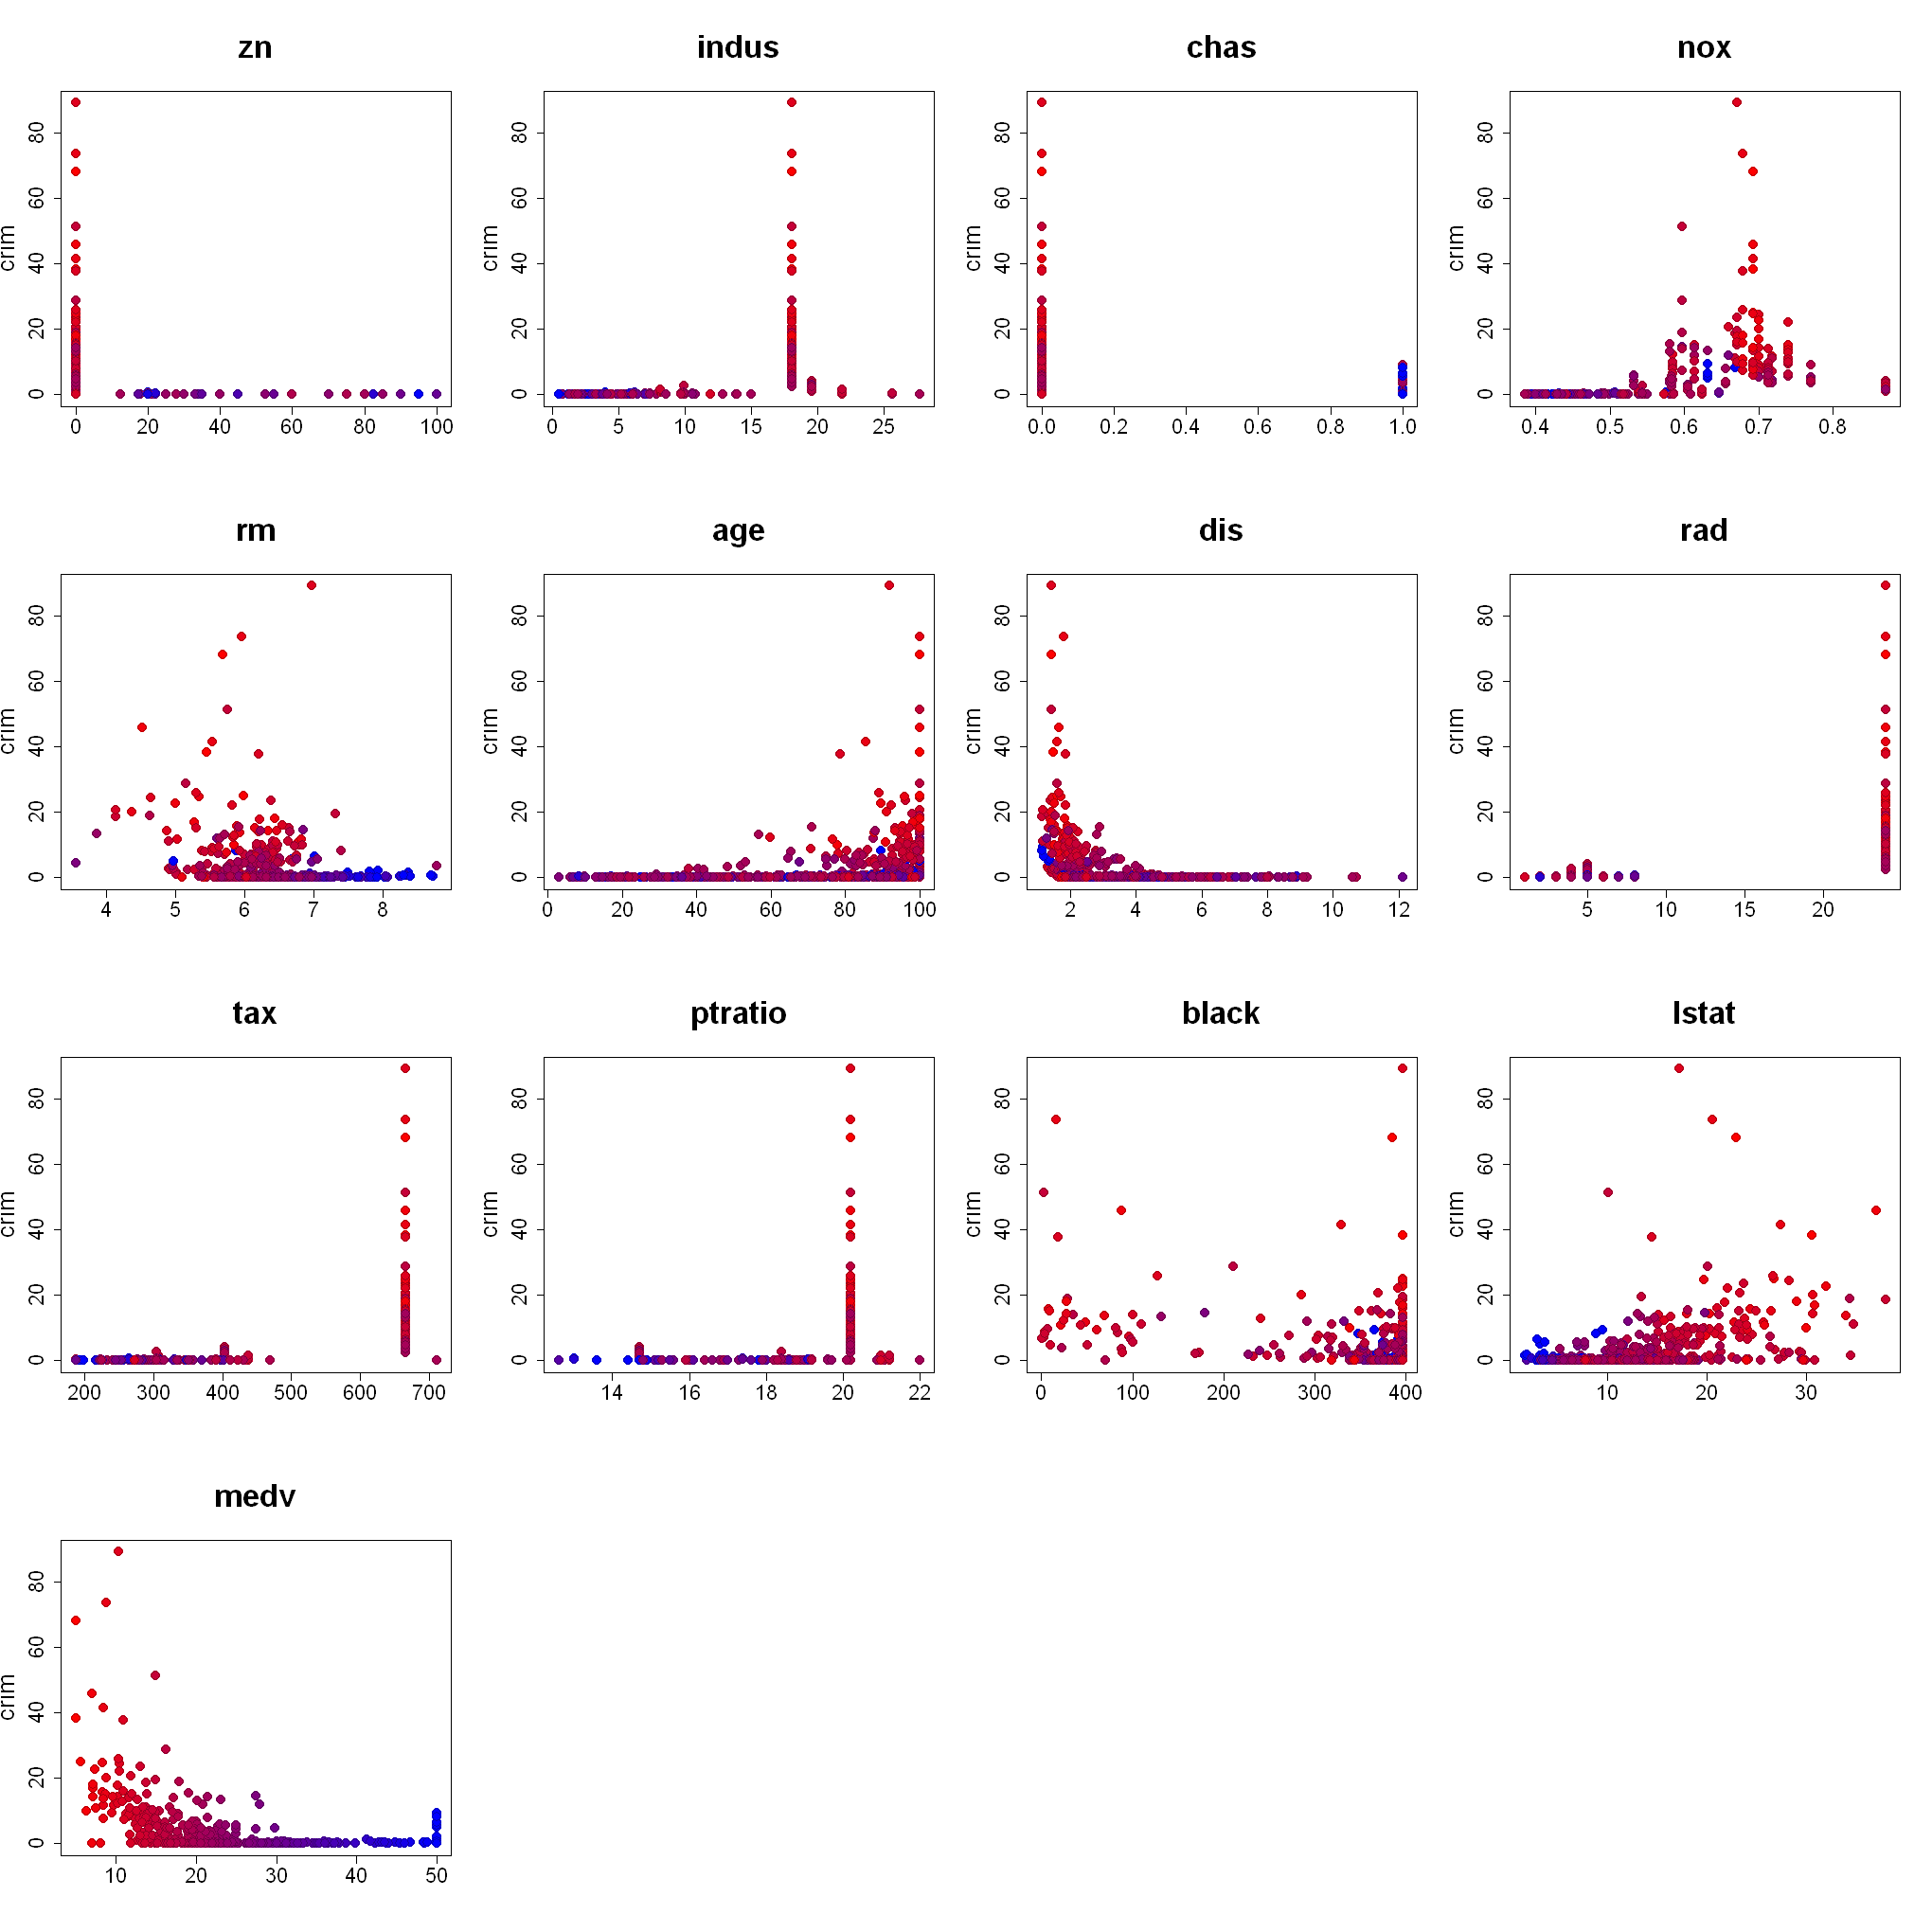

In [16]:
# Scatter plots with crim
vars = setdiff(names(df), c('crim'))
xlabels = vars
ylabels = rep('crim', length(vars))

par(mfrow=c((length(vars)%/%4)+1, 4))
par(mar=c(5.1, 4.1, 4.1+2, 2.1))  # b,l,t,r

plot_pars(17,17)
for (i in seq(length(vars))) {
    var = vars[i]
    plot(df[,var], df$crim, pch=21, bg=cols, col=alpha('black',0.3),  # or col=NULL
        main=paste(var), xlab='', ylab=ylabels[i],
        cex=1.7, cex.main=2.5, cex.lab=2, cex.axis=1.7)
}

par(defpar)
options(defop)

<div class="alert alert-block alert-info">
<a id='obs-crim'></a>
<b>Observations:</b><br>
    - crim has a highly positively skewed distribution ranging from 0.006 to 89. 95% of the towns have crim &lt; 15.8<br>
    - crim has a moderately strong positive correlation with rad (0.626) and tax (0.583)<br>
    <u><i>Scatter plots</i></u><br>
    - <b>zn</b> = 0 has towns that do not have any residential land > 25000 sq ft. 74% (372/506) towns come under this category.<br>
    &ensp;Towns with large residential plots (zn $\neq$ 0) have very low crime rate with max crim = 0.82526 (65th percentile (or p65) of overall crim)<br>
    - <b>indus</b> &rarr; proportion of non-retail business acres per town<br>
    &ensp; indus = 18.1 is the category with the large spread of crim.<br>
    &ensp; 26% (132/506) of the towns have indus = 18.1.<br>
    &ensp; Maximum crime rate in other towns is 4% (p76).<br>
    - <b>chas</b> = 1 denotes towns that are bounded by the Charles River.<br> 
    &ensp; Only 7% of the towns fall under this category. And crime rate in such towns is spread enough which would lead us to conclude that this variable is inconsequential for crime rate.<br>
    - <b>nox</b> &rarr; nitrogen oxides concentration (parts per 10 million)<br>
    &ensp; Towns with high nox levels have larger spread of crime rates.<br>
    - <b>rm</b> &rarr; Average number of  rooms per dwelling<br>
    &ensp; rm has an unclear relationship with crim, although towns with low rm tend to have a higher upper range of crim.<br>
    - <b>age</b> &rarr; proportion of owner-occupied units built prior to 1940<br>
    &ensp; Towns with a higher proportion of older buildings have wider spread crime rates.<br>
    &ensp; Although age has a low correlation with crim (0.353), scatter plot suggests that their could be a non-linear relationship between them.<br>
    - <b>dis</b> &rarr; weighted mean of distances to five Boston employment centres<br> 
    &ensp; Towns that are very close to the employment centers have the highest crime rates.<br>
    - <b>rad</b> &rarr; index of accessibility to radial highways<br>
    &ensp; Crime is significantly high in the towns with rad index = 24, which constitute 26% of the data.<br>
    &ensp; rad also has the highest correlation with crim @ 0.626. In towns with rad $\neq$ 24, max crim is 4.0974 (p75)<br>
    - <b>tax</b> &rarr; full-value property-tax rate per \$10,000<br>
    &ensp; tax has the second highest correlation with crim @ 0.583 <br>
    &ensp; 26% of the towns have tax = 666, which also has the highest crime rates.<br>
    &ensp; Maximum crim in other towns is 4.0974 (p75)<br>
    - <b>ptratio</b> &rarr; pupil-teacher ratio by town<br>
    &ensp; Towns with high crim fall under ptratio = 20.2 which makes up the largest chunk of the data at 28%.<br>
    - <b>lstat</b> &rarr; lower status of the population (percent)<br> 
    &ensp; lstat has a roughly funnel shaped scatter plot pattern with crim.<br>
    &ensp; Some of towns with higher proportion of economically disadvantaged sections suffer from relatively higher incidences of crim.<br>
    &ensp; Correlation of crim with lstat is 0.421, which is neither strong nor weak. This is so because many of the towns with moderately high lstat have low crim as well as high crime rates, but the balance tilts towards high crim as lstat gets higher and higher.<br>
    - <b>medv</b> &rarr; median value of owner-occupied homes in $1000s<br>
    &ensp; There appears to be a curvi-linear relationship between medv and crim and correlation = -0.388<br>
    &ensp; Towns with higher medv have lower crim numbers.



*Note* : $p_i$ denotes $i^{th}$ percentile<br><br>
    
*Workings below*
</div>


[go to toc](#toc2)

##### --&nbsp; Workings &nbsp; --------------------------------------------------------------

###### zn

In [17]:
# Frequency table
fd = table(df$zn)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd = fd[, order(fd['Freq',], decreasing=T)]
fd

,0,20,80,12.5,22,25,40,30,45,90,...,35,52.5,55,70,75,82.5,85,17.5,18,100
Freq,372,21,15,10,10,10,7,6,6,5,...,3,3,3,3,3,2,2,1,1,1
%,74,4,3,2,2,2,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0


In [18]:
# Maximum crim in zn other than 0
a = max(df$crim[df$zn != 0])
a

# Percentile
ecdf(df$crim)(a)

[1] 0.82526

[1] 0.6442688

###### indus

In [19]:
range(df$indus)

[1]  0.46 27.74

In [20]:
# Frequency table
fd = table(df$indus)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd = fd[, order(fd['Freq',], decreasing=T)]
fd

,18.1,19.58,8.14,6.2,21.89,3.97,9.9,8.56,10.59,5.86,...,1.76,1.89,2.01,2.02,2.25,2.31,2.97,3.75,4,4.15
Freq,132,30,22,18,15,12,12,11,11,10,...,1,1,1,1,1,1,1,1,1,1
%,26,6,4,4,3,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Frequency table with class intervals
ci = cut(df$indus, breaks=seq(0, ((max(df$indus)%/%10)+1)*10, 2))
fd = table(ci)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd

,"(0,2]","(2,4]","(4,6]","(6,8]","(8,10]","(10,12]","(12,14]","(14,16]","(16,18]","(18,20]","(20,22]","(22,24]","(24,26]","(26,28]","(28,30]"
Freq,20,73,62,62,53,29,15,3,0,162,15,0,7,5,0
%,4,14,12,12,10,6,3,1,0,32,3,0,1,1,0


In [22]:
# Frequency table of indus Towns with crim > 5
table(df$indus[df$crim>5])


18.1 
 106 

In [23]:
# max crim in indus <> 18.1
a = max(df$crim[df$indus!=18.1])
a
ecdf(df$crim)(a)

[1] 4.0974

[1] 0.7648221

###### chas

In [24]:
# chas - binary variable denoting if a town adjoins Charles river
table(df$chas)


  0   1 
471  35 

In [25]:
# max crim in chas = 1
a = max(df$crim[df$chas==1])
a
ecdf(df$crim)(a)

[1] 8.98296

[1] 0.8695652

###### nox

In [26]:
range(df$nox)

[1] 0.385 0.871

In [27]:
# Frequency table
fd = table(df$nox)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd = fd[, order(fd['Freq',], decreasing=T)]
fd

# Frequency table with class intervals
ci = cut(df$nox, breaks=seq(0.3, 0.9, 0.1))
fd = table(ci)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd

,0.538,0.713,0.437,0.871,0.489,0.624,0.605,0.693,0.74,0.544,...,0.469,0.484,0.575,0.659,0.385,0.389,0.394,0.422,0.435,0.518
Freq,23,18,17,16,15,15,14,14,13,12,...,2,2,2,2,1,1,1,1,1,1
%,5,4,3,3,3,3,3,3,3,2,...,0,0,0,0,0,0,0,0,0,0


,"(0.3,0.4]","(0.4,0.5]","(0.5,0.6]","(0.6,0.7]","(0.7,0.8]","(0.8,0.9]"
Freq,11,181,149,104,45,16
%,2,36,29,21,9,3


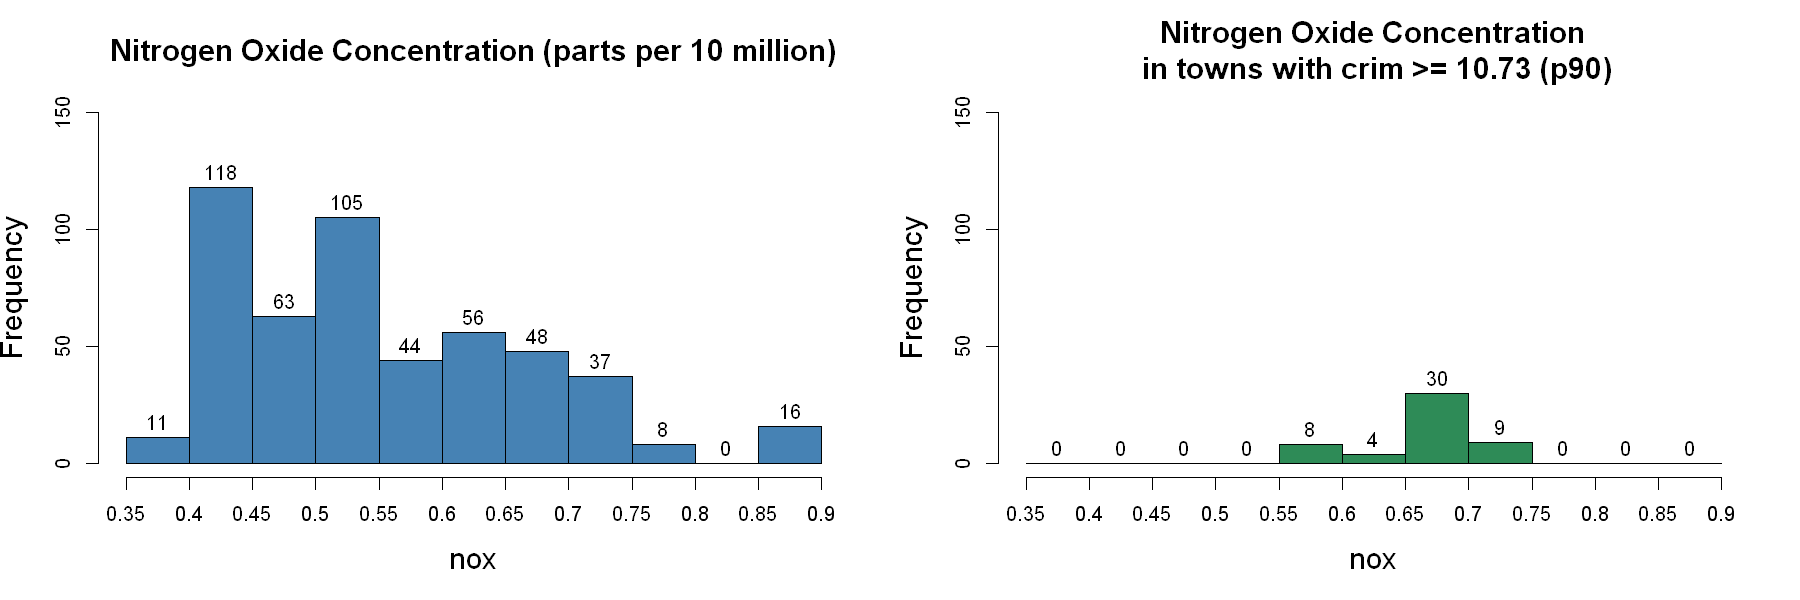

In [28]:
# Histogram
plot_pars(15,5)
par(mfrow=c(1,2))
a = hist(df$nox, nclass='FD', labels=T, xlab='nox', cex.lab=1.5, col='steelblue',
     main='Nitrogen Oxide Concentration (parts per 10 million)', cex.main=1.5, ylim=c(0,150))
axis(side=1, at=a$breaks, labels=a$breaks)
b = hist(df$nox[df$crim>=10.73], breaks=a$breaks, labels=T, xlab='nox', cex.lab=1.5, col='seagreen4',
         main='Nitrogen Oxide Concentration\n in towns with crim >= 10.73 (p90)', 
         cex.main=1.5, ylim=c(0,150))
axis(side=1, at=b$breaks, labels=b$breaks)
options(defpar)

###### rm

In [29]:
range(df$rm)

[1] 3.561 8.780

In [30]:
# Frequency table
fd = table(df$rm)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd = fd[, order(fd['Freq',], decreasing=T)]
fd

# Frequency table with class intervals
ci = cut(df$rm, breaks=seq(3, 9, 0.5))
fd = table(ci)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd

,5.713,6.127,6.167,6.229,6.405,6.417,4.138,5.304,5.39,5.404,...,8.247,8.259,8.266,8.297,8.337,8.375,8.398,8.704,8.725,8.78
Freq,3,3,3,3,3,3,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
%,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,"(3,3.5]","(3.5,4]","(4,4.5]","(4.5,5]","(5,5.5]","(5.5,6]","(6,6.5]","(6.5,7]","(7,7.5]","(7.5,8]","(8,8.5]","(8.5,9]"
Freq,0,2,3,11,26,131,181,88,37,14,10,3
%,0,0,1,2,5,26,36,17,7,3,2,1


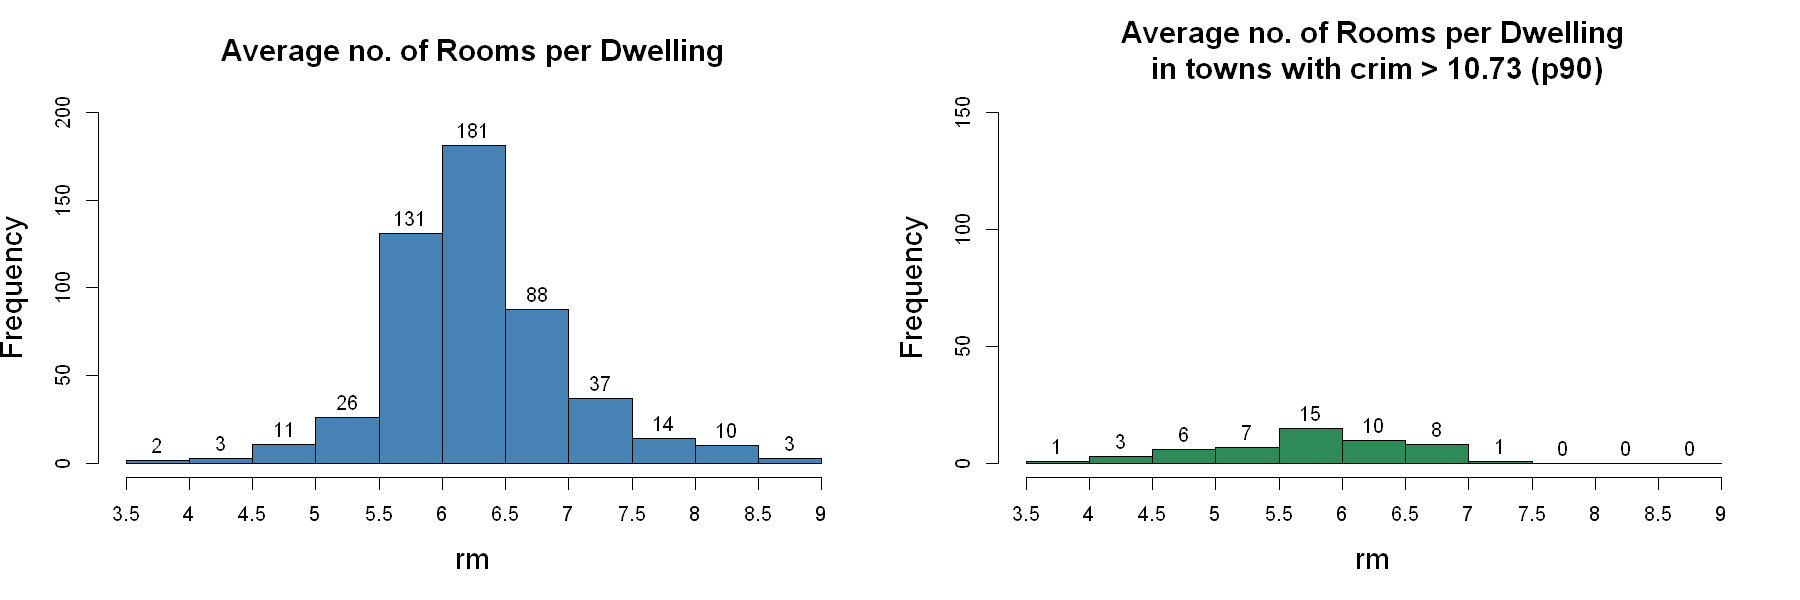

In [31]:
plot_pars(15,5)
par(mfrow=c(1,2))
a = hist(df$rm, nclass=15, labels=T, xlab='rm', cex.lab=1.5, col='steelblue',
     main='Average no. of Rooms per Dwelling', cex.main=1.5, ylim=c(0,200))
axis(side=1, at=a$breaks, labels=a$breaks)
b = hist(df$rm[df$crim>=10.73], breaks=a$breaks, labels=T, xlab='rm', cex.lab=1.5, col='seagreen4',
         main='Average no. of Rooms per Dwelling\n in towns with crim > 10.73 (p90)', 
         cex.main=1.5, ylim=c(0,150))
axis(side=1, at=b$breaks, labels=b$breaks)
options(defpar)

###### age

In [32]:
# Frequency table for age
age_groups = cut2(df$age, cuts=seq(0,100,10))  # library(Hmisc)) >> cut2, cut2 v cut >> [) v (]
age_fd = as.data.frame(table(age_groups))
age_fd['prop'] = round(age_fd['Freq']/506*100, 0)

# crim > 10.73
age_groups2 = cut2(df$age[df$crim>10.73], cuts=seq(0,100,10), oneval=FALSE)
age_fd2 = as.data.frame(table(age_groups2))
age_fd2['prop2'] = round(age_fd2['Freq']/sum(age_fd2['Freq'])*100, 0)
# age_fd2
cbind(age_fd, age_fd2[,2:3])

age_groups,Freq,prop,Freq,prop2
<fct>,<int>,<dbl>,<int>,<dbl>
"[ 0, 10)",13,3,0,0
"[ 10, 20)",21,4,0,0
"[ 20, 30)",30,6,0,0
"[ 30, 40)",44,9,0,0
"[ 40, 50)",39,8,0,0
"[ 50, 60)",38,8,2,4
"[ 60, 70)",34,7,0,0
"[ 70, 80)",47,9,3,6
"[ 80, 90)",70,14,6,12


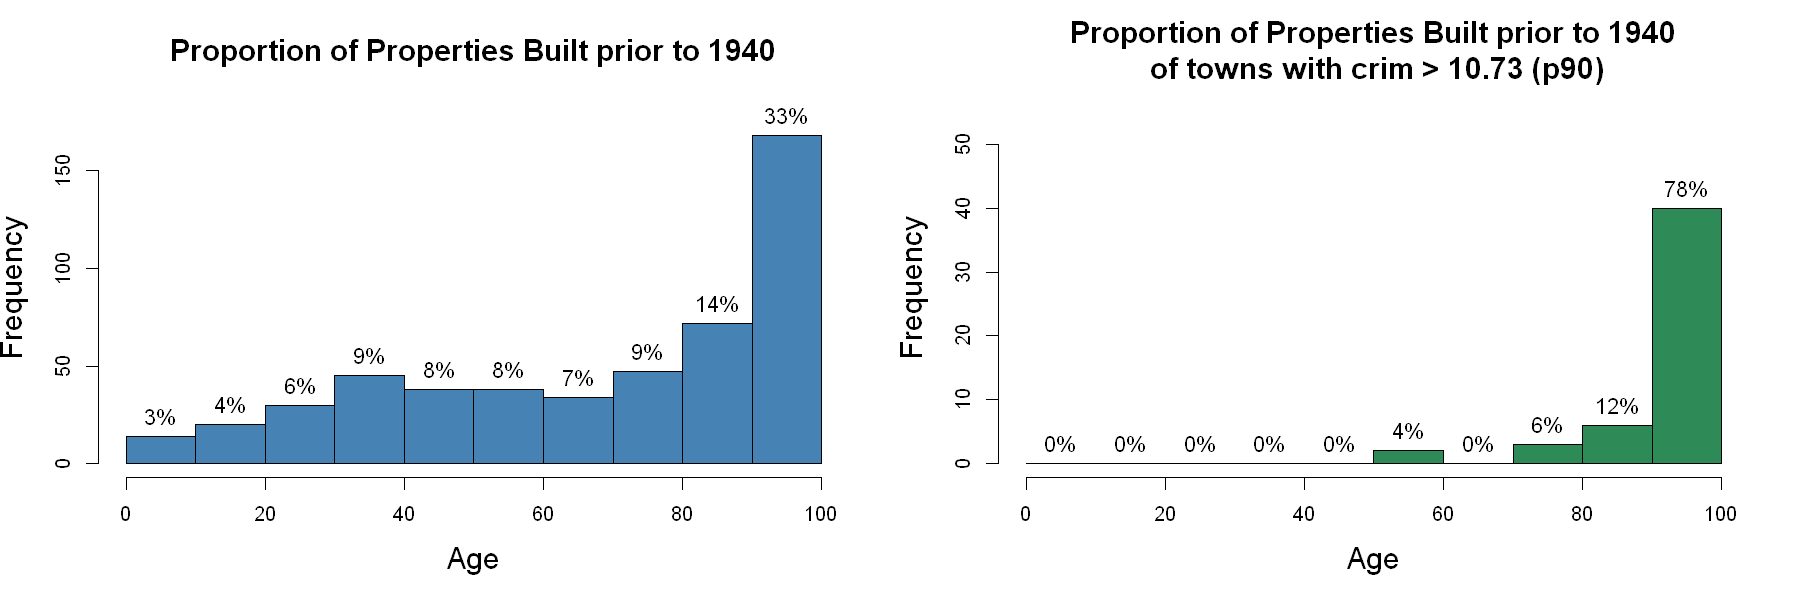

In [33]:
plot_pars(15,5)
par(mfrow=c(1,2))
a = hist(df$age, nclass='FD', labels=F, xlab='Age', cex.lab=1.5, col='steelblue',
     main='Proportion of Properties Built prior to 1940', cex.main=1.5, ylim=c(0,180))
text(x=a$mids, y=a$counts, labels=paste0(round(a$counts/sum(a$counts)*100),'%') , 
     cex=1.1, pos=3, col=1, font.axis=2)
b = hist(df$age[df$crim>10.73], breaks=a$breaks, labels=F, xlab='Age', cex.lab=1.5, col='seagreen4',
         main='Proportion of Properties Built prior to 1940\n of towns with crim > 10.73 (p90)', 
         cex.main=1.5, ylim=c(0,55))
text(x=b$mids, y=b$counts, labels=paste0(round(b$counts/sum(b$counts)*100),'%') , 
     cex=1.1, pos=3, col=1, font.axis=2)
options(defpar)

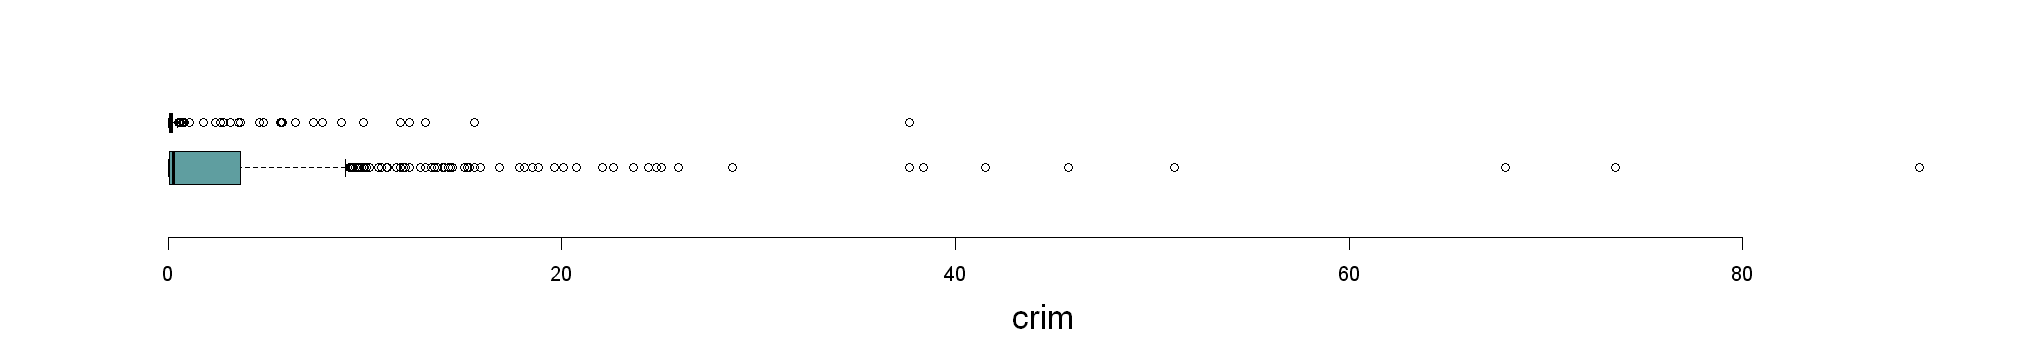

In [34]:
plot_pars(17,3)
boxplot(df$crim, horizontal=T, frame=F, boxwex=0.5, at=0, col='cadetblue', xlab='crim', cex.lab=1.7)
boxplot(df$crim[df$age<80], horizontal=T, frame=F, boxwex=0.3, at=0.35, col='thistle', add=T)
options(defpar)

###### dis

In [35]:
range(df$dis)

[1]  1.1296 12.1265

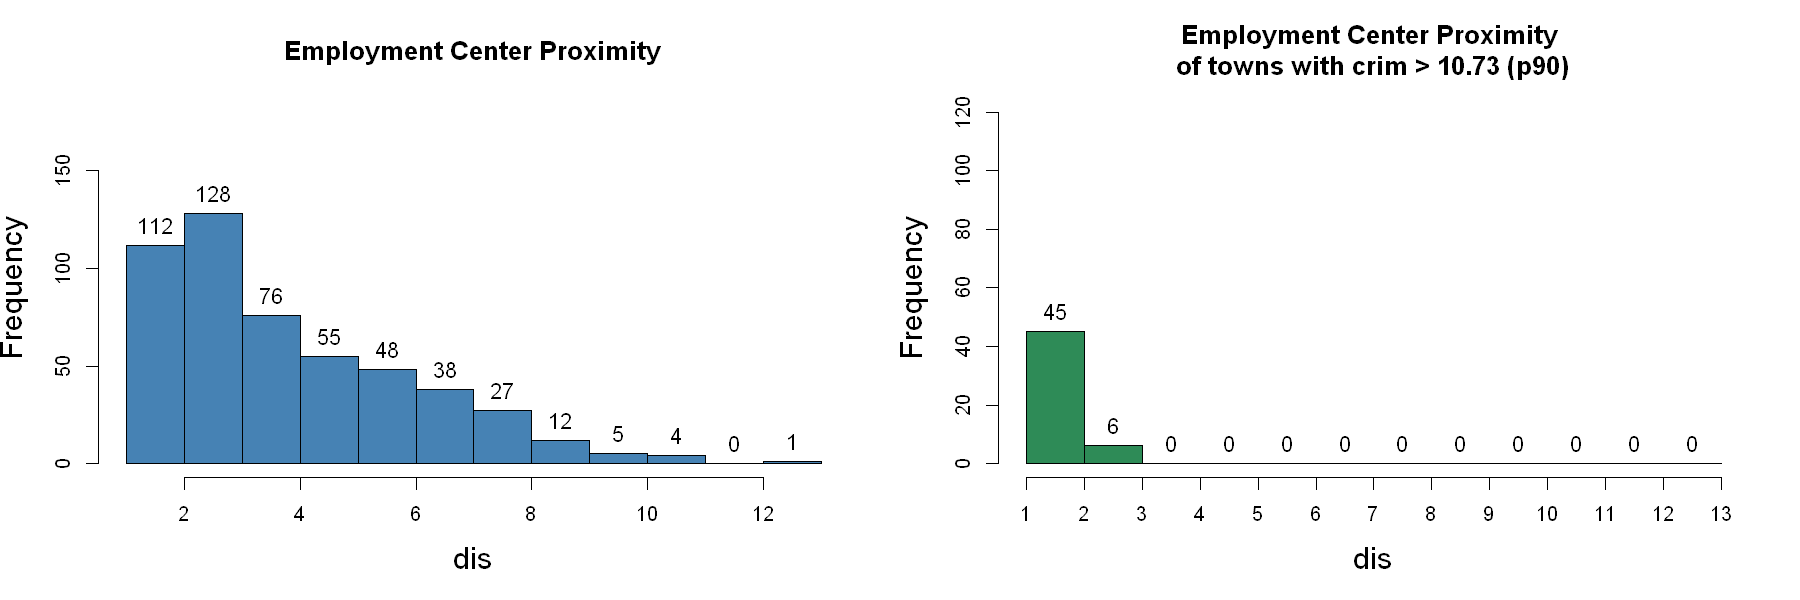

In [36]:
plot_pars(15,5)
par(mfrow=c(1,2))
a = hist(df$dis, nclass='FD', labels=F, xlab='dis', cex.lab=1.5, 
         col='steelblue', main='Employment Center Proximity', cex.main=1.3, ylim=c(0,180))
# text(x=a$mids, y=a$counts, labels=paste0(round(a$counts/sum(a$counts)*100),'%') , 
#      cex=1.1, pos=3, col=1, font.axis=2)
text(x=a$mids, y=a$counts, labels=a$counts, cex=1.1, pos=3, col=1, font.axis=2)
b = hist(df$dis[df$crim>10.73], breaks=a$breaks, labels=F, xaxt="n", xlab='dis', cex.lab=1.5, col='seagreen4',
     main='Employment Center Proximity \nof towns with crim > 10.73 (p90)', cex.main=1.3, ylim=c(0,120))
# text(x=b$mids, y=b$counts, labels=paste0(round(b$counts/sum(b$counts)*100),'%') , 
#      cex=1.1, pos=3, col=1, font.axis=2)
text(x=b$mids, y=b$counts, labels=b$counts, cex=1.1, pos=3, col=1, font.axis=2)
axis(side=1, at=b$breaks, labels=b$breaks)
options(defop)

In [37]:
sum(b$counts)

[1] 51

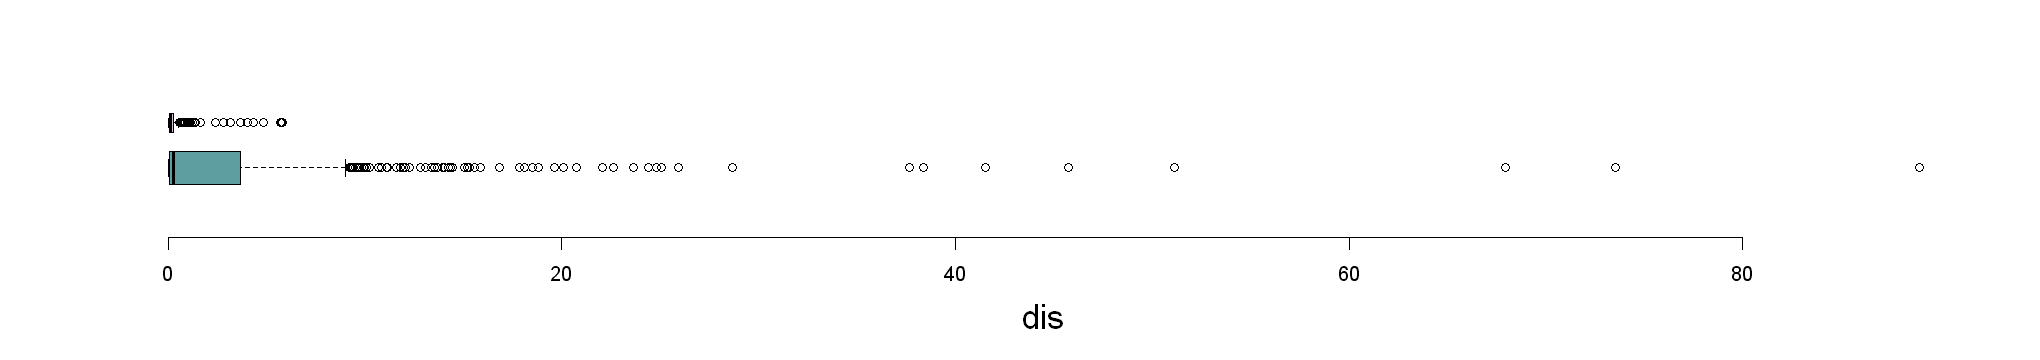

In [38]:
plot_pars(17,3)
boxplot(df$crim, horizontal=T, frame=F, boxwex=0.5, at=0, col='cadetblue', xlab='dis', cex.lab=1.7)
boxplot(df$crim[df$dis>3], horizontal=T, frame=F, boxwex=0.3, at=0.35, col='thistle', add=T)
options(defop)

###### rad

In [39]:
# Frequency table
fd = table(df$rad)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd

,1,2,3,4,5,6,7,8,24
Freq,20,24,38,110,115,26,17,24,132
%,4,5,8,22,23,5,3,5,26


In [40]:
# Max crim in towns with rad <> 24
a = max(df$crim[df$rad!=24])
a
ecdf(df$crim)(a)

[1] 4.0974

[1] 0.7648221

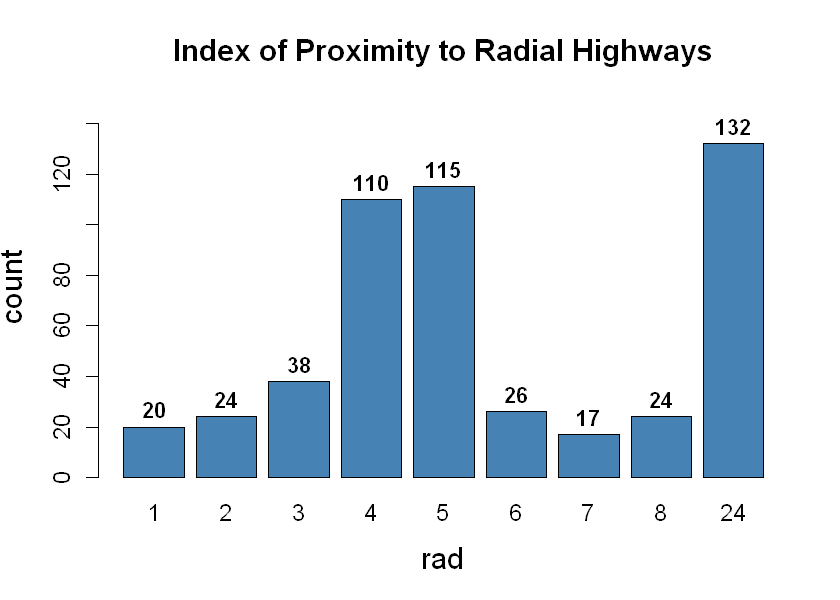

In [41]:
# Bar plot
plot_pars(7,5)
fig = barplot(fd['Freq',], col='steelblue', main='Index of Proximity to Radial Highways', 
            xlab='rad', ylab='count', cex.main=1.5, cex.axis=1.2, cex=1.2, cex.lab=1.5, ylim=c(0,150))
text(x=fig, y=fd['Freq',]+7, labels=fd['Freq',], cex=1.1, srt=0, xpd=TRUE, font=2)

###### tax

In [42]:
range(df$tax)

[1] 187 711

In [43]:
# Frequency distribution
fd = table(df$tax)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd = fd[, order(fd['Freq',], decreasing=T)]
fd

,666,307,403,437,304,264,398,277,384,224,...,241,244,255,256,280,285,313,351,422,469
Freq,132,40,30,15,14,12,12,11,11,10,...,1,1,1,1,1,1,1,1,1,1
%,26,8,6,3,3,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0


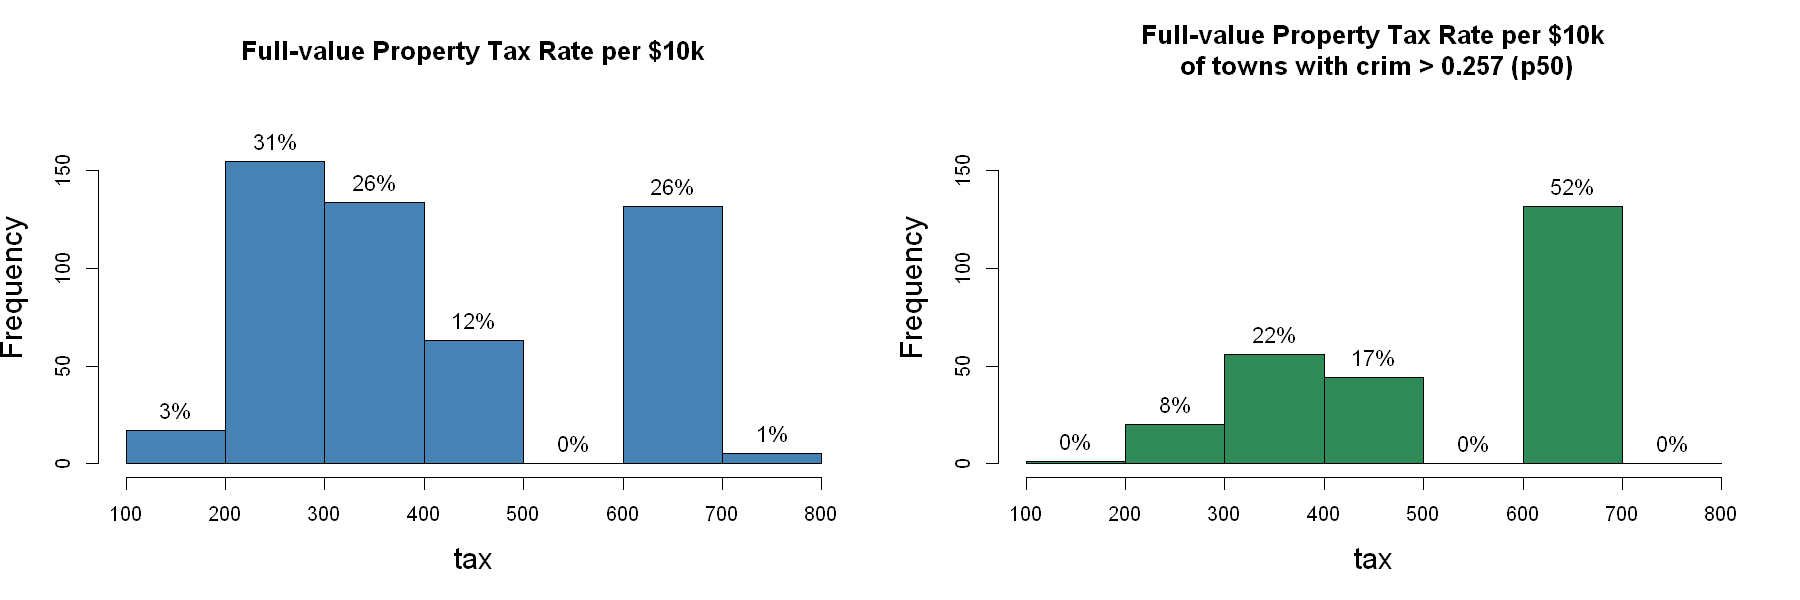

In [44]:
# Histogram
plot_pars(15,5)
par(mfrow=c(1,2))
a = hist(df$tax, nclass='FD', labels=F, xlab='tax', cex.lab=1.5, 
         col='steelblue', main='Full-value Property Tax Rate per $10k', cex.main=1.3, ylim=c(0,180))
text(x=a$mids, y=a$counts, labels=paste0(round(a$counts/sum(a$counts)*100),'%') , 
     cex=1.1, pos=3, col=1, font.axis=2)
b = hist(df$tax[df$crim>0.257], breaks=a$breaks, labels=F, xaxt="n", xlab='tax', cex.lab=1.5, col='seagreen4',
     main='Full-value Property Tax Rate per $10k\n of towns with crim > 0.257 (p50)', cex.main=1.3, ylim=c(0,180))
text(x=b$mids, y=b$counts, labels=paste0(round(b$counts/sum(b$counts)*100),'%') , 
     cex=1.1, pos=3, col=1, font.axis=2)
axis(side=1, at=b$breaks, labels=b$breaks)
options(defop)

In [45]:
# Max crim in towns with tax <> 666
a = max(df$crim[df$tax!=666])
a
ecdf(df$crim)(a)

[1] 4.0974

[1] 0.7648221

###### ptratio

In [46]:
range(df$ptratio)

[1] 12.6 22.0

In [47]:
# Frequency distribution
fd = table(df$ptratio)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd = fd[, order(fd['Freq',], decreasing=T)]
fd

,20.2,14.7,21,17.8,19.2,17.4,18.6,19.1,16.6,18.4,...,15.6,15.9,18.8,22,13.6,14.4,15.1,15.5,17.3,21.1
Freq,140,34,27,23,19,18,17,17,16,16,...,2,2,2,2,1,1,1,1,1,1
%,28,7,5,5,4,4,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Frequency table with class intervals
ci = cut(df$ptratio, breaks=seq(12, 22, 1))
fd = table(ci)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd

,"(12,13]","(13,14]","(14,15]","(15,16]","(16,17]","(17,18]","(18,19]","(19,20]","(20,21]","(21,22]"
Freq,15,1,42,27,40,65,63,52,183,18
%,3,0,8,5,8,13,12,10,36,4


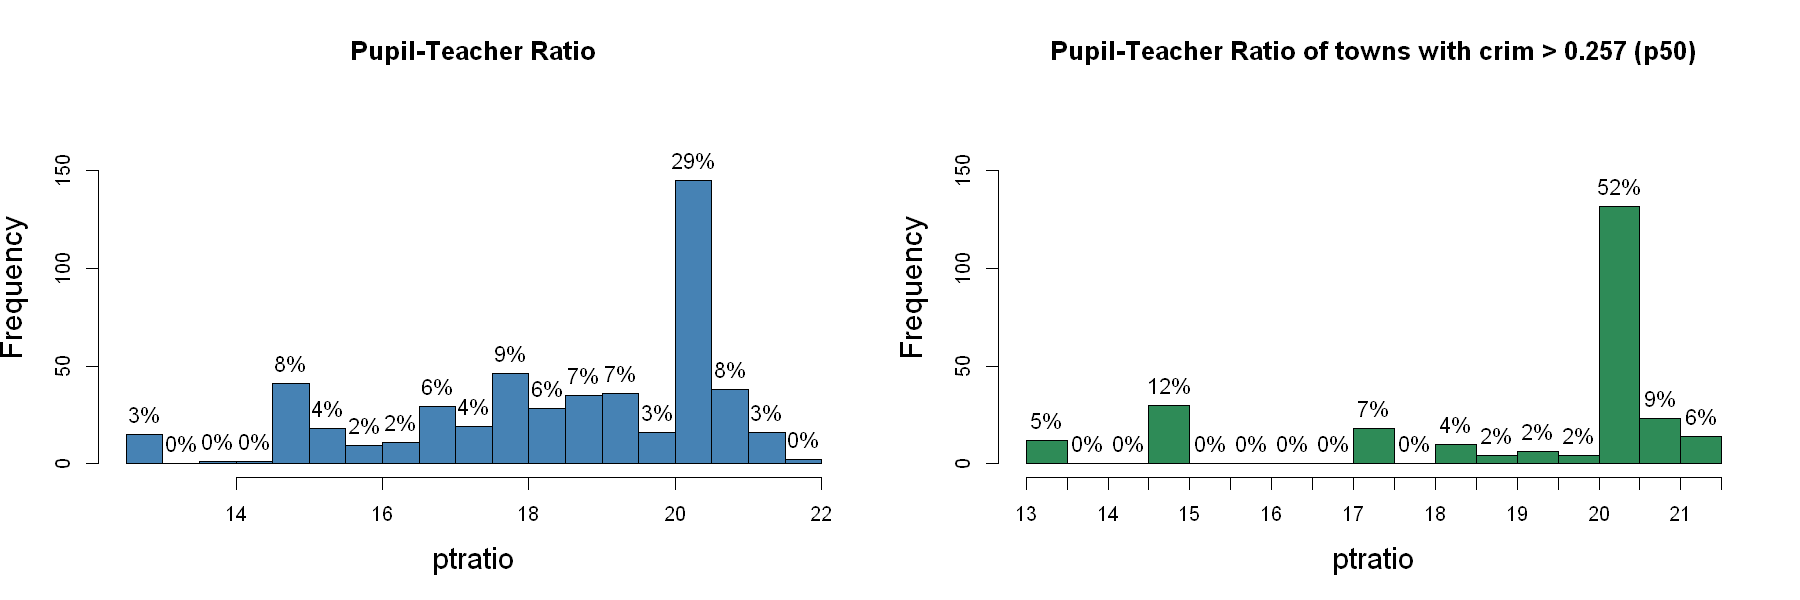

In [49]:
# Histogram
plot_pars(15,5)
par(mfrow=c(1,2))
a = hist(df$ptratio, nclass='FD', labels=F, xlab='ptratio', cex.lab=1.5, 
         col='steelblue', main='Pupil-Teacher Ratio', cex.main=1.3, ylim=c(0,180))
text(x=a$mids, y=a$counts, labels=paste0(round(a$counts/sum(a$counts)*100),'%') , 
     cex=1.1, pos=3, col=1, font.axis=2)
b = hist(df$ptratio[df$crim>0.257], nclass='FD', labels=F, xaxt="n", xlab='ptratio', cex.lab=1.5, col='seagreen4',
     main='Pupil-Teacher Ratio of towns with crim > 0.257 (p50)', cex.main=1.3, ylim=c(0,180))
text(x=b$mids, y=b$counts, labels=paste0(round(b$counts/sum(b$counts)*100),'%') , 
     cex=1.1, pos=3, col=1, font.axis=2)
axis(side=1, at=b$breaks, labels=b$breaks)
options(defop)

###### black

In [50]:
range(df$black)

[1]   0.32 396.90

In [51]:
# Frequency table
fd = table(df$black)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd = fd[, order(fd['Freq',], decreasing=T)]
fd

# Frequency table with class intervals
ci = cut(df$black, breaks=seq(0, 400, 50))
fd = table(ci)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd

,396.9,393.74,395.24,341.6,374.71,376.14,377.07,388.45,389.71,390.94,...,395.77,395.93,395.99,396.14,396.23,396.24,396.28,396.3,396.33,396.42
Freq,121,3,3,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
%,24,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,"(0,50]","(50,100]","(100,150]","(150,200]","(200,250]","(250,300]","(300,350]","(350,400]"
Freq,20,11,5,3,6,9,28,424
%,4,2,1,1,1,2,6,84


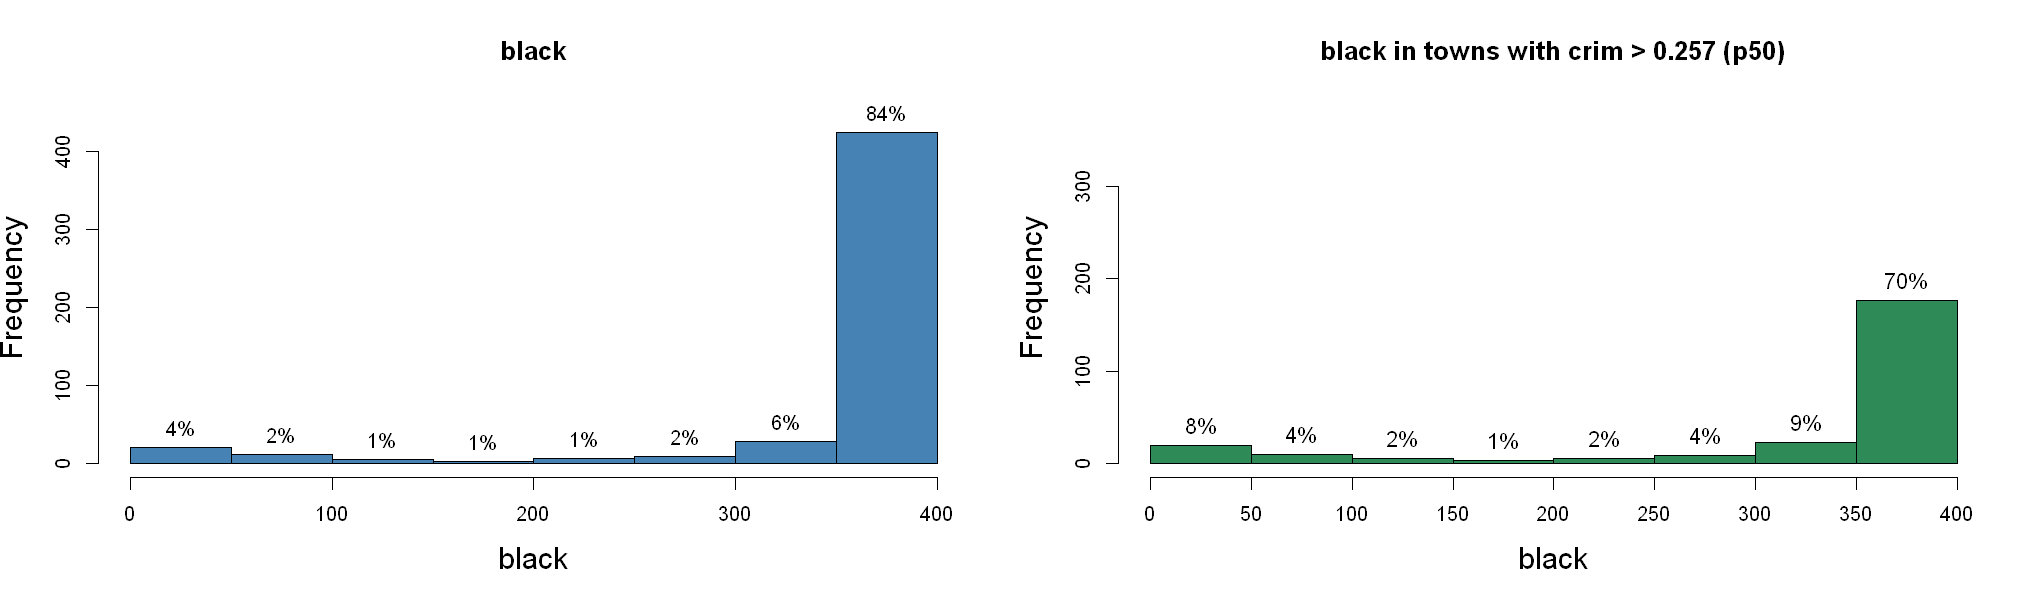

In [52]:
# Histogram
plot_pars(17,5)
par(mfrow=c(1,2))
a = hist(df$black, breaks=seq(0,400,50), labels=F, xlab='black', cex.lab=1.5, col='steelblue', 
         main='black', cex.main=1.3, ylim=c(0,450))
text(x=a$mids, y=a$counts, labels=paste0(round(a$counts/sum(a$counts)*100),'%') , 
     cex=1, pos=3, col=1, font.axis=2)
b = hist(df$black[df$crim>0.257], breaks=a$breaks, labels=F, xaxt="n", xlab='black', cex.lab=1.5, col='seagreen4',
     main="black in towns with crim > 0.257 (p50)", cex.main=1.3, ylim=c(0,380))
text(x=b$mids, y=b$counts, labels=paste0(round(b$counts/sum(b$counts)*100),'%'), 
     cex=1.1, pos=3, col=1, font.axis=2)
axis(side=1, at=b$breaks, labels=b$breaks)
options(defop)

###### lstat

In [53]:
range(df$lstat)

[1]  1.73 37.97

In [54]:
# Frequency table
fd = table(df$lstat)
fd = rbind('Freq'=fd, '%'=round(prop.table(fd)*100))
fd = fd[, order(fd['Freq',], decreasing=T)]
fd

# Frequency table with class intervals
ci = cut(df$lstat, breaks=seq(0,40,5))
fd = as.data.frame(table(ci))
fd['prop'] = round(fd['Freq']/506*100,1)

# crim > 0.257
ci2 = cut(df$lstat[df$crim>0.257], breaks=seq(0,40,5))
fd2 = as.data.frame(table(ci2))
fd2['prop2'] = round(fd2['Freq']/sum(fd2['Freq'])*100,1)
# fd2
cbind(fd, fd2[,2:3])

,6.36,7.79,8.05,14.1,18.13,3.11,3.16,3.53,3.76,3.95,...,30.59,30.62,30.63,31.99,34.02,34.37,34.41,34.77,36.98,37.97
Freq,3,3,3,3,3,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
%,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


ci,Freq,prop,Freq,prop2
<fct>,<int>,<dbl>,<int>,<dbl>
"(0,5]",62,12.3,19,7.5
"(5,10]",157,31.0,37,14.6
"(10,15]",125,24.7,66,26.1
"(15,20]",88,17.4,64,25.3
"(20,25]",40,7.9,37,14.6
"(25,30]",22,4.3,19,7.5
"(30,35]",10,2.0,9,3.6
"(35,40]",2,0.4,2,0.8


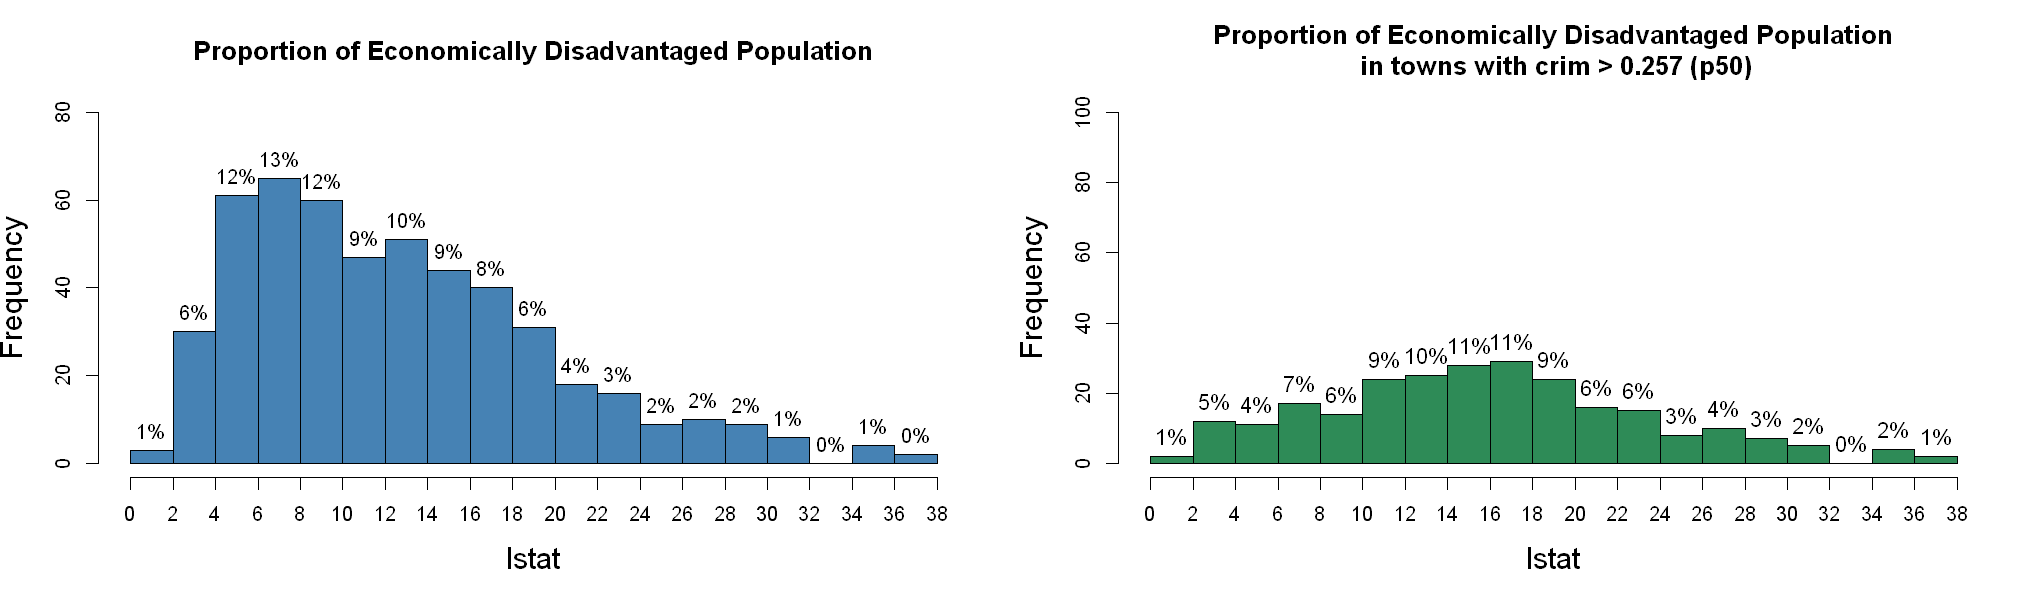

In [55]:
# Histogram
plot_pars(17,5)
par(mfrow=c(1,2))
a = hist(df$lstat, nclass='FD', labels=F, xaxt=NULL, xlab='lstat', cex.lab=1.5, col='steelblue', 
         main='Proportion of Economically Disadvantaged Population', cex.main=1.3, ylim=c(0,80))
text(x=a$mids, y=a$counts, labels=paste0(round(a$counts/sum(a$counts)*100),'%') , 
     cex=1, pos=3, col=1, font.axis=2)
axis(side=1, at=a$breaks, labels=a$breaks)
b = hist(df$lstat[df$crim>0.257], breaks=a$breaks, labels=F, xaxt=NULL, xlab='lstat', cex.lab=1.5, col='seagreen4',
     main="Proportion of Economically Disadvantaged Population\n in towns with crim > 0.257 (p50)", cex.main=1.3, ylim=c(0,100))
text(x=b$mids, y=b$counts, labels=paste0(round(b$counts/sum(b$counts)*100),'%'), 
     cex=1.1, pos=3, col=1, font.axis=2)
axis(side=1, at=b$breaks, labels=b$breaks)
options(defop)

###### medv

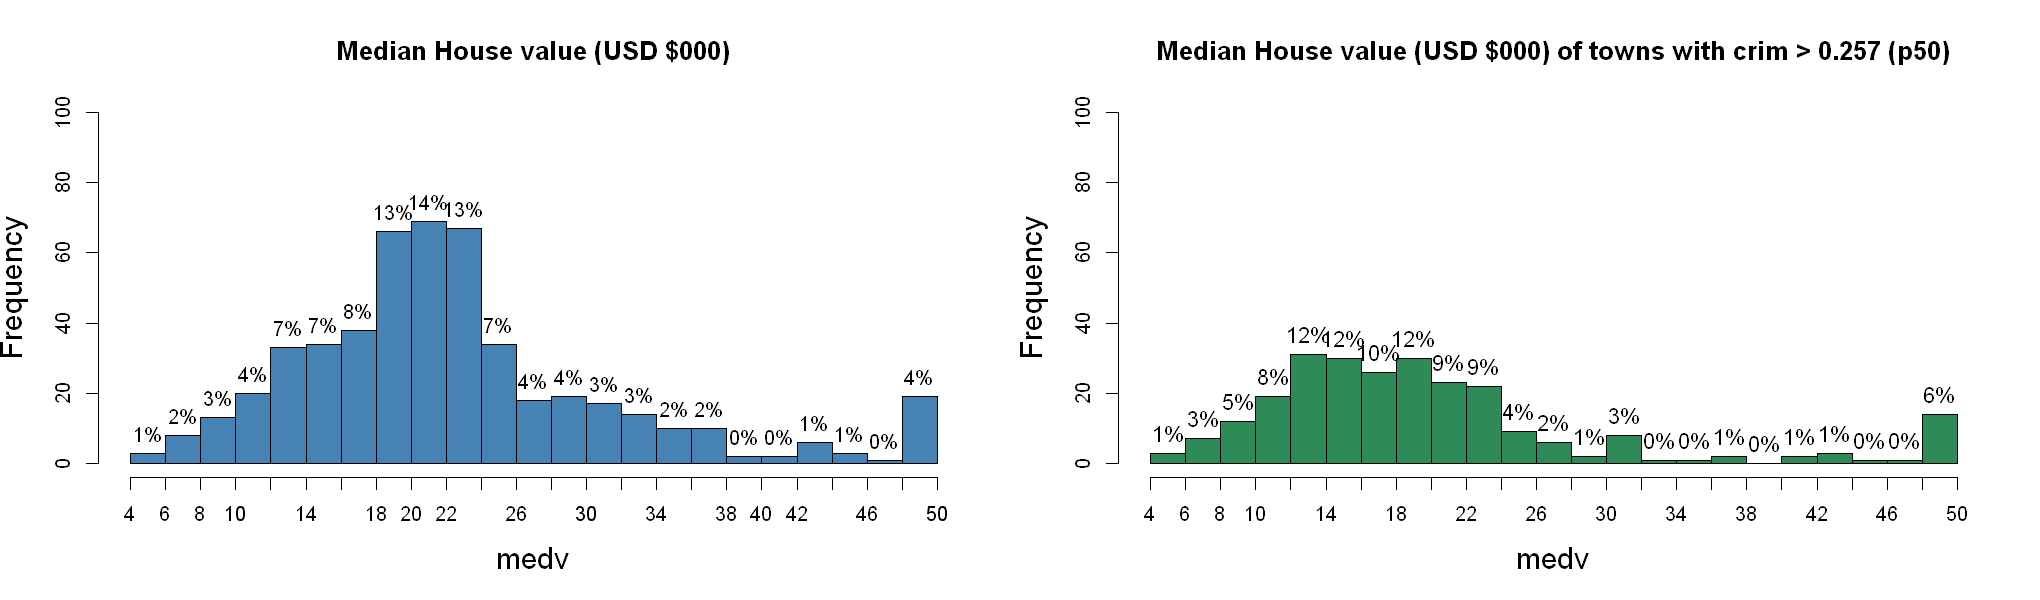

In [56]:
# Histogram
plot_pars(17,5)
par(mfrow=c(1,2))
a = hist(df$medv, nclass='FD', labels=F, xlab='medv', cex.lab=1.5, 
         col='steelblue', main='Median House value (USD $000)', cex.main=1.3, ylim=c(0,100))
text(x=a$mids, y=a$counts, labels=paste0(round(a$counts/sum(a$counts)*100),'%') , 
     cex=1, pos=3, col=1, font.axis=2)
axis(side=1, at=a$breaks, labels=a$breaks)
b = hist(df$medv[df$crim>0.257], breaks=a$breaks, labels=F, xaxt="n", xlab='medv', cex.lab=1.5, col='seagreen4',
     main="Median House value (USD $000) of towns with crim > 0.257 (p50)", cex.main=1.3, ylim=c(0,100))
text(x=b$mids, y=b$counts, labels=paste0(round(b$counts/sum(b$counts)*100),'%'), 
     cex=1.1, pos=3, col=1, font.axis=2)
axis(side=1, at=b$breaks, labels=b$breaks)
options(defop)

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Defined functions

##### Fuction to plot a variable against all others with medv hue (red - blue : low - high)

In [57]:
# Fuction to plot a variable against all others with medv hue (red - low medv, blue - high medv)
multiplot = function(data, yvar, numcols, huedata='black', plot_dim=NULL) {
    vars = setdiff(names(data), c(yvar))
    xlabels = vars
    
    rows = ifelse(length(vars)%%numcols==0, length(vars)%%numcols, (length(vars)%/%numcols)+1)
    par(mfrow=c(ifelse(length(vars)%%numcols==0, length(vars)%%numcols, (length(vars)%/%numcols)+1), numcols))
    par(mar=c(5.1, 4.1, 4.1+2, 2.1))
    
    if (is.null(plot_dim)) {plot_pars(17,rows*4)} else {plot_pars(plot_dim[1], plot_dim[2])}
    for (i in seq(length(vars))) {
        var = vars[i]
        plot(x=data[,var], y=data[,yvar], pch=21, bg=huedata, col=alpha('black',0.3),
             main=paste(var), xlab='', ylab=yvar,
             cex=1.7, cex.main=2.5, cex.lab=2, cex.axis=1.7)
    }
}

##### Function to create comparitive histograms of a variable from df and subset-df

In [58]:
# Function to create comparitive histograms of a variable from df and subset-df
multihist = function(df, subdf, xvar, nclass=NULL, yrange1=NULL, yrange2=NULL, 
                     perc=F, title=NULL, subtitle=NULL, axis=F, plot_dim=NULL, quants=NULL) {
    if (is.null(plot_dim)) {plot_pars(17,5)} else {plot_pars(plot_dim[1],plot_dim[2])}
    par(mfrow=c(1,2))
    a = hist(df[,xvar], nclass=nclass, labels=!perc, xlab=xvar, col='steelblue', 
             main=title, cex.main=1.5, cex.lab=1.5, ylim=yrange1)
    if (!is.null(quants)) {for (q in quantile(df[,xvar], quants)) {abline(v=q,lty=2,lwd=1,col='grey')}}
    if (axis==T) {axis(side=1, at=a$breaks, label=a$breaks)}
    if (perc==T) {text(a$mids, a$counts, labels=paste0(round(a$counts/sum(a$counts)*100),'%'), 
                  cex=1.1, pos=3, col=1, font.axis=2)}
    b = hist(subdf[,xvar], breaks=a$breaks, labels=!perc, xlab=xvar, col='seagreen4',
             main=paste0(title, '\n', subtitle), cex.main=1.5, cex.lab=1.5, ylim=yrange2)
    if (!is.null(quants)) {for (q in quantile(subdf[,xvar], quants)) {abline(v=q,lty=2,lwd=1,col='grey')}}
    if (axis==T) {axis(side=1, at=b$breaks, label=b$breaks)}
    if (perc==T) {text(b$mids, b$counts, labels=paste0(round(b$counts/sum(b$counts)*100),'%'), 
                  cex=1.1, pos=3, col=1, font.axis=2)}
}

##### Function to get proportions and percentile of a class in 2 dataframes

In [59]:
# Function to get proportions and percentile of a class in 2 dataframes
var_prop = function(df1, df2, var, criteria, roff=3) {
    res = matrix(nrow=1, ncol=5, dimnames=list(NULL, 
                            c('count_df1','prop_df1', 'count_df2','prop_df2', 'ratio')))
    res[,1] = length(df1[,var][df1[,var]==criteria])
    res[,2] = round(res[,1]/nrow(df1), roff)
    res[,3] = length(df2[,var][df2[,var]==criteria])
    res[,4] = round(res[,3]/nrow(df2), roff)
    res[,5] = round(res[,4]/res[,2], roff)
    return(res)
}

In [60]:
# Function to get proportions and percentile of a class in 2 dataframes
var_prop = function(df1, df2, var, criteria, roff=3) {
    n = length(criteria)
    res = matrix(nrow=n, ncol=5, dimnames=list(seq(n), 
                            c('count_df1','prop_df1', 'count_df2','prop_df2', 'ratio')))
    for (i in seq(n)) {
        crit = criteria[i]
        res[i,1] = length(df1[,var][df1[,var]==crit])
        res[i,2] = round(res[i,1]/nrow(df1), roff)
        res[i,3] = length(df2[,var][df2[,var]==crit])
        res[i,4] = round(res[i,3]/nrow(df2), roff)
        res[i,5] = round(res[i,4]/res[i,2], roff)
    }
    if (n > 1){
        res = rbind(res, 'total'=colSums(res))
        res[n+1,5] = round(res[n+1,4]/res[n+1,2], roff)
        rownames(res) = c(criteria, 'total')
    }
    return(res)
}

##### Function to show customized percentiles

In [61]:
# Function to show customized percentiles
custom_summary = function(df, r=NULL, p_reqd_n=NULL, p_lev_n=NULL) {   
    p_reqd=c(0, 0.10, 0.25, 0.50, 0.75, 0.90, 1)
    p_lev=c('0%','10%','25%','50%','75%','90%', '100%')   
    ndf = Filter(is.numeric, df)
    ndf_vars = colnames(ndf)
    p_reqd = c(p_reqd, p_reqd_n)
    p_reqdm = sort(p_reqd)
    p_lev = c(p_lev, p_lev_n)
    p_levm = p_lev[order(p_reqd)]
    p_levm = append(p_levm, 'Mean', which(p_levm == '50%'))
    res = data.frame(row.names=p_levm)
    for (var in ndf_vars) {
        x = ndf[,var]
        sm = data.frame("dStats" = quantile(x, p_reqdm))
        res = cbind(res, i=sm[match(rownames(res),rownames(sm)), ])
        names(res)[length(names(res))] = var
        res['Mean', var] = mean(x)
    }
    rownames(res)[which(rownames(res) == '0%')] = 'Min'
    rownames(res)[which(rownames(res) == '100%')] = 'Max'
    
    if (missing(r)) fres=res else fres=round(res,r)
    return(fres)
}

[go to toc](#toc)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### d) Range of predictors
Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

#### <i>1) Suburbs with High Crime Rate</i>
Let's define high crime rate threshold to be p95 (95th percentile)

In [62]:
# High crime rate
quantile(df$crim, 0.95)

# Towns with High crime rate
hcr = df[df$crim > quantile(df$crim, 0.95), ]
cat(dim(hcr))
head(hcr)

95% 
15.78915

26 14

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
375,18.4982,0,18.1,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
376,19.6091,0,18.1,0,0.671,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
379,23.6482,0,18.1,0,0.671,6.380,96.2,1.3861,24,666,20.2,396.90,23.69,13.1
380,17.8667,0,18.1,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
381,88.9762,0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
382,15.8744,0,18.1,0,0.671,6.545,99.1,1.5192,24,666,20.2,396.90,21.08,10.9


##### Scatterplot

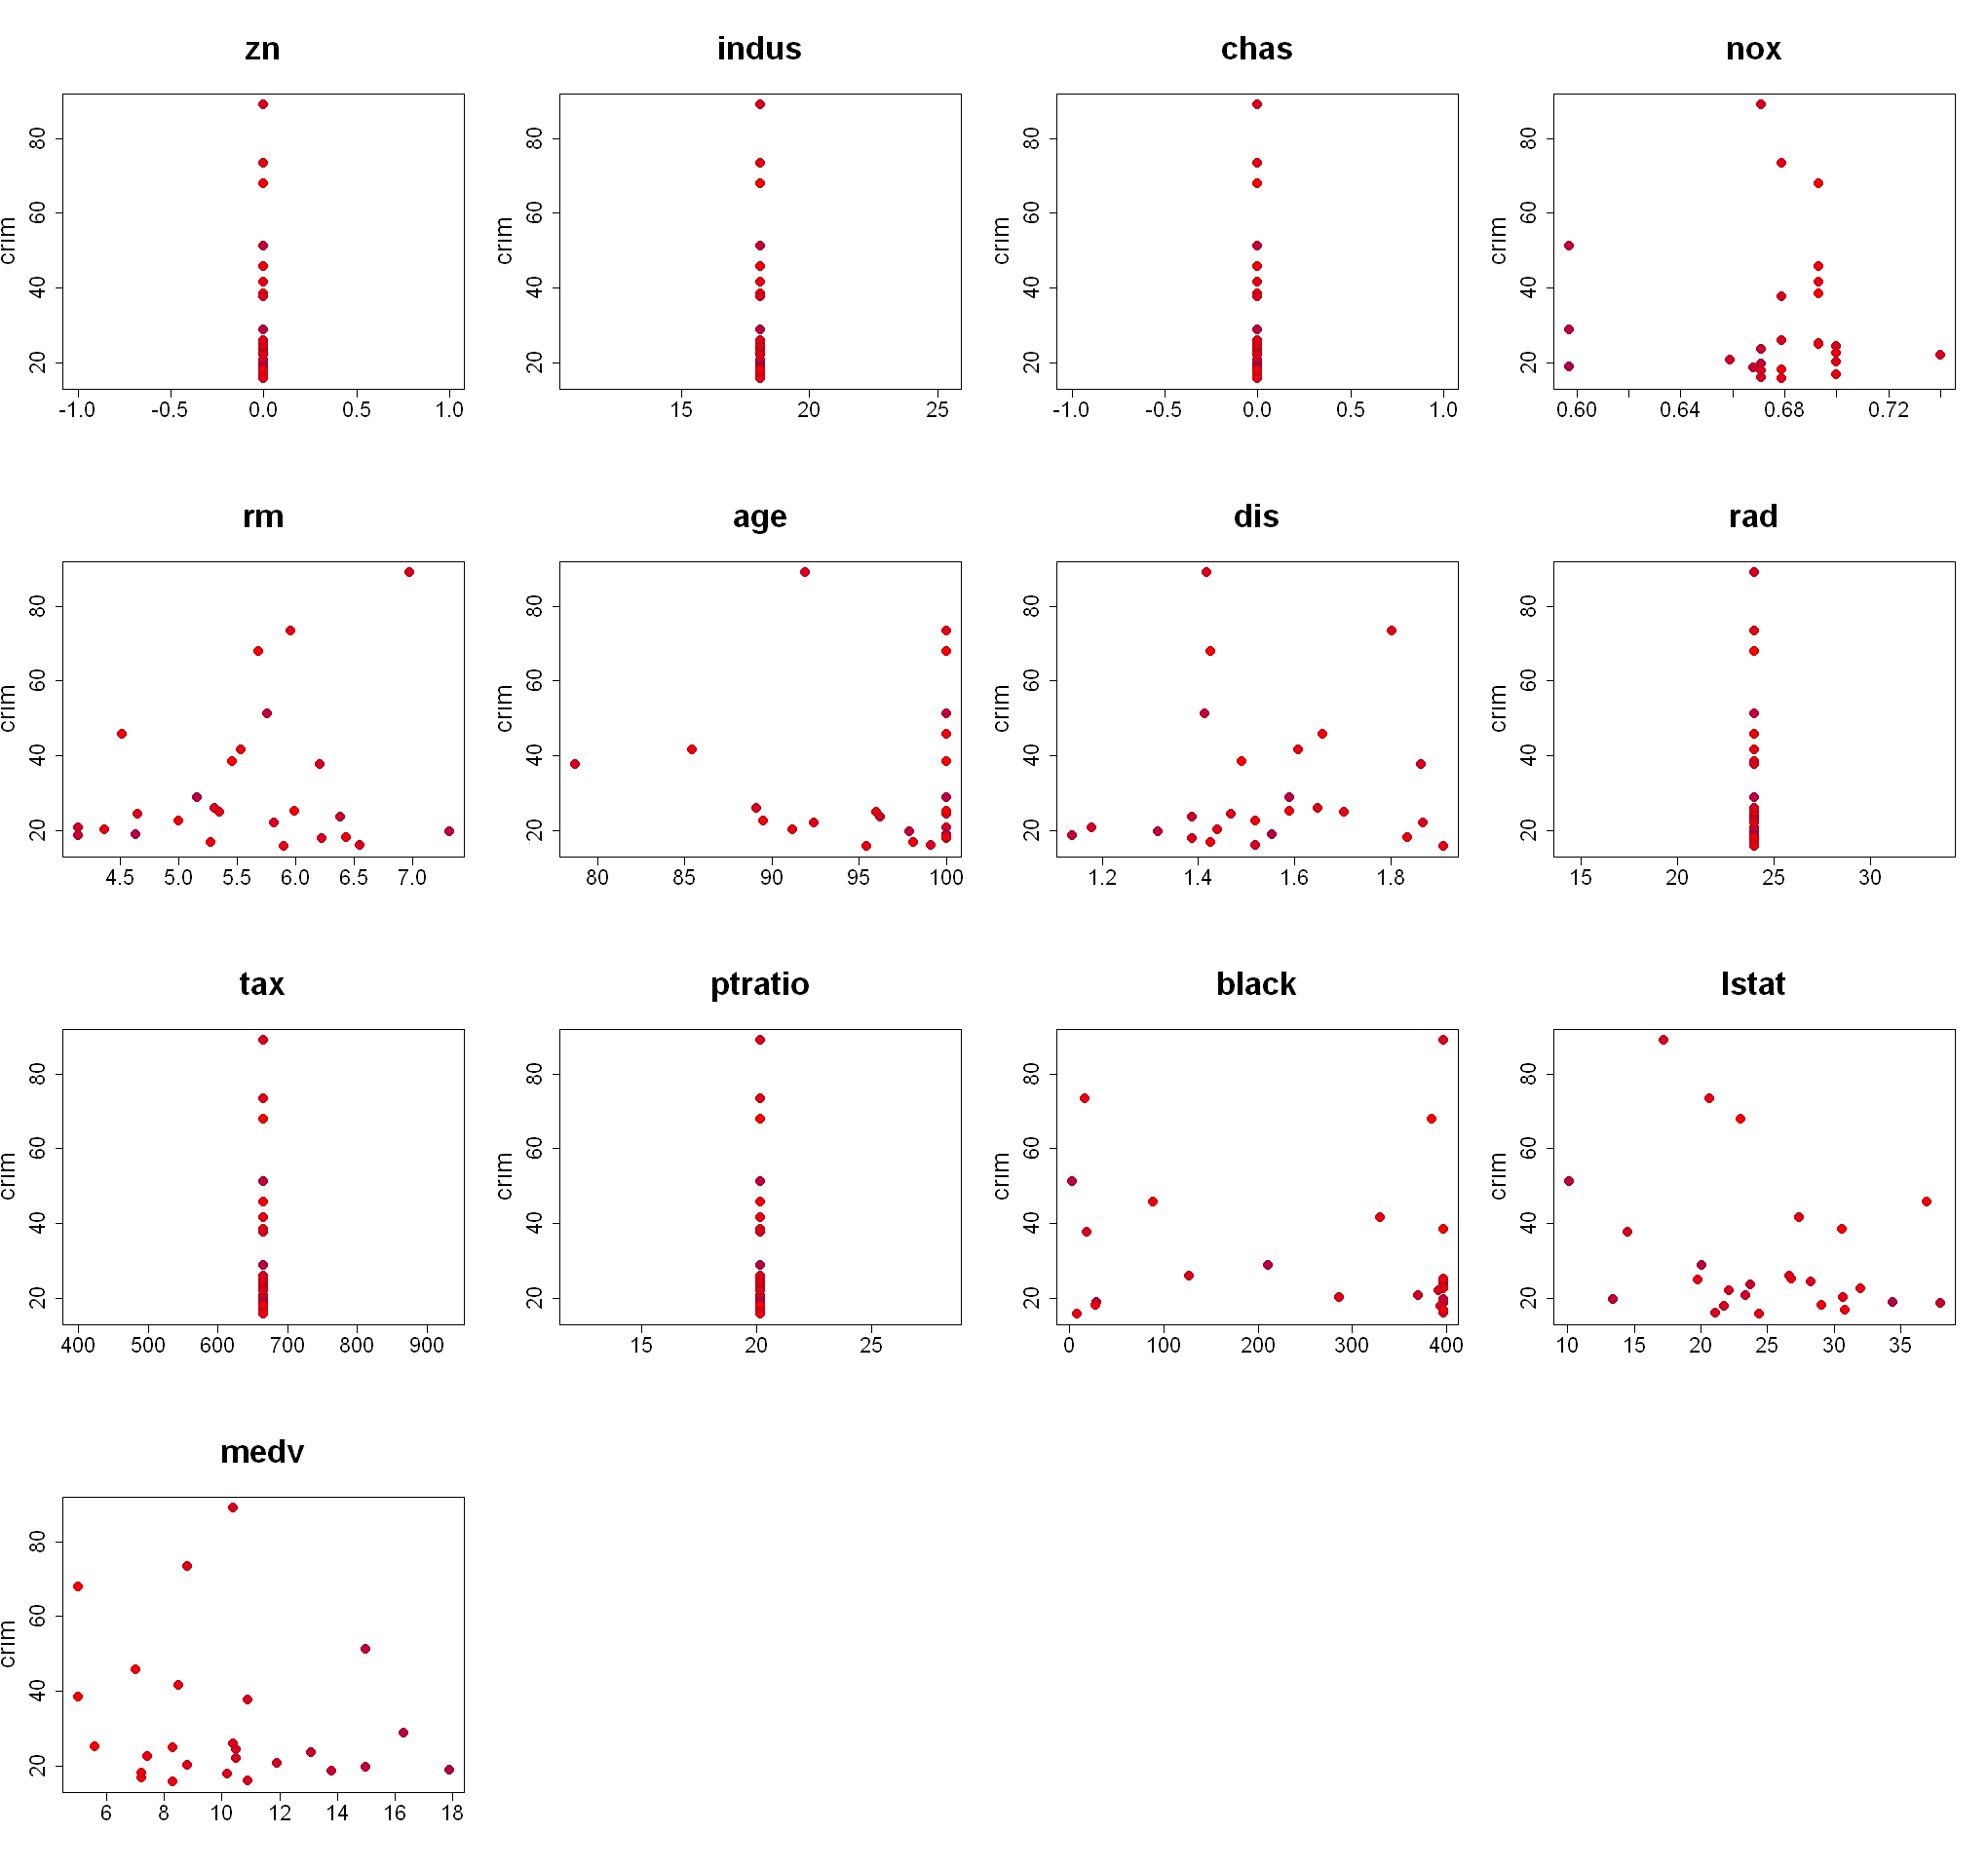

In [63]:
multiplot(data=hcr, yvar='crim', numcols=4, huedata=cols[as.numeric(rownames(hcr))])

<div class="alert alert-block alert-info">
<h5>Observations</h5><br>
<a id='obs-hcr'></a>
<b>Features of high crime towns :</b><br>
    • <b>zn</b> = 0 &rarr; no large residential land tracts (> 25000 sq ft)<br>
    • <b>indus</b> = 18.1 &rarr; high proportion of industrial area<br>
    • <b>chas</b> = 0 &rarr; do not have a riverfront<br>
    • <b>nox</b> &rarr; have high concentration of nitrogen oxide<br>
    • <b>age</b> &rarr; high proportion of units built prior to 1940 <br>
    • <b>dis</b> &rarr; nearby to business centers<br>
    • <b>rad</b> = 24 &rarr; closer to radial highways<br>
    • <b>tax</b> = 666 &rarr; high property tax rates<br>
    • <b>ptratio</b> = 20.2 &rarr; high pupil-teacher ratio<br>
    • <b>lstat</b> &rarr; slightly higher concentration than overall<br>
    • <b>medv</b> &rarr; low median house value<br>

*Working notes under point (c)*
</div>

##### Range

In [64]:
# Range
hcr_rng = sapply(hcr, range)
df_rng = sapply(df, range)
res = rbind(hcr_rng, df_rng)
rownames(res) = c('hcr_min','hcr_max','min','max')
res = rbind(res, 'p5'=sapply(df, quantile, probs=0.05), 'p10'=sapply(df, quantile, probs=0.1),
            'p25'=sapply(df, quantile, probs=0.25), 'p50'=sapply(df, median), 
            'p75'=sapply(df, quantile, probs=0.75), 'p90'=sapply(df, quantile, probs=0.9),
            'p95'=sapply(df, quantile, probs=0.95))
round(t(res),2)

,hcr_min,hcr_max,min,max,p5,p10,p25,p50,p75,p90,p95
crim,15.86,88.98,0.01,88.98,0.03,0.04,0.08,0.26,3.68,10.75,15.79
zn,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,12.50,42.50,80.00
indus,18.10,18.10,0.46,27.74,2.18,2.91,5.19,9.69,18.10,19.58,21.89
chas,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
nox,0.60,0.74,0.38,0.87,0.41,0.43,0.45,0.54,0.62,0.71,0.74
rm,4.14,7.31,3.56,8.78,5.31,5.59,5.89,6.21,6.62,7.15,7.59
age,78.70,100.00,2.90,100.00,17.72,26.95,45.02,77.50,94.07,98.80,100.00
dis,1.14,1.91,1.13,12.13,1.46,1.63,2.10,3.21,5.19,6.82,7.83
rad,24.00,24.00,1.00,24.00,2.00,3.00,4.00,5.00,24.00,24.00,24.00
tax,666.00,666.00,187.00,711.00,222.00,233.00,279.00,330.00,666.00,666.00,666.00


[go to toc](#toc)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### <i>2) Suburbs with high tax rate</i>

In [65]:
round(quantile(df$tax, c(0.25,0.5,0.73,0.74,0.75,0.9,0.95)))

25% 50% 73% 74% 75% 90% 95% 
279 330 597 666 666 666 666

666 is the value at several percentile levels. Lowest being 74 and highest being 99.

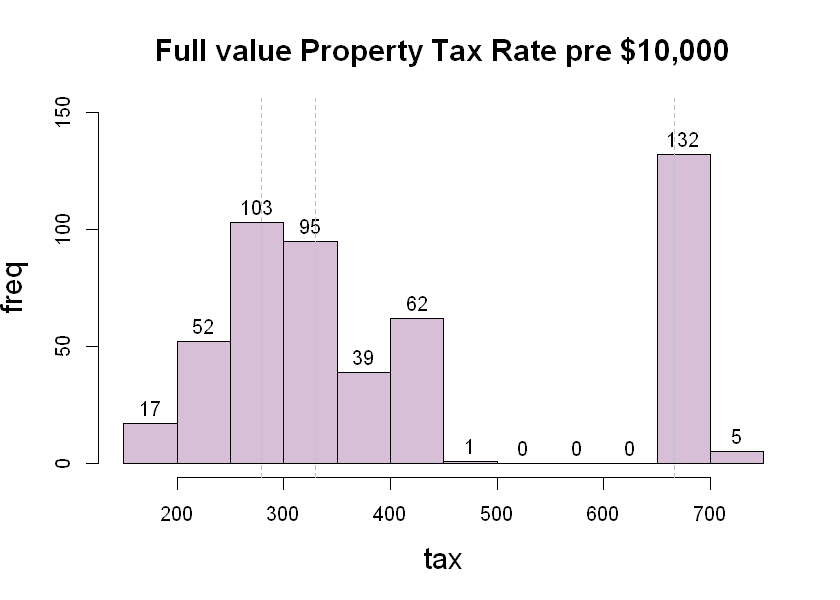

In [66]:
plot_pars(7,5)
hist(df$tax, nclass=, main='Full value Property Tax Rate pre $10,000', xlab='tax', ylab='freq', 
     col='thistle', cex.main=1.5, cex.lab=1.5, label=T, ylim=c(0,150))
for (q in quantile(df$tax, c(0.25,0.5,0.75,0.9,0.95))) {abline(v=q, lty=2, lwd=0.5, col='grey')}

In [67]:
# High tax rate
quantile(df$tax, 0.95)
ecdf(df$tax)(666)

# Towns with High Tax rate
htr = df[df$tax >= quantile(df$tax, 0.95), ]
cat(dim(htr))
head(htr)

95% 
666

[1] 0.9901186

137 14

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
357,8.98296,0,18.1,1,0.77,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8
358,3.84970,0,18.1,1,0.77,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7
359,5.20177,0,18.1,1,0.77,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7
360,4.26131,0,18.1,0,0.77,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6
361,4.54192,0,18.1,0,0.77,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0
362,3.83684,0,18.1,0,0.77,6.251,91.1,2.2955,24,666,20.2,350.65,14.19,19.9


##### Scatterplot

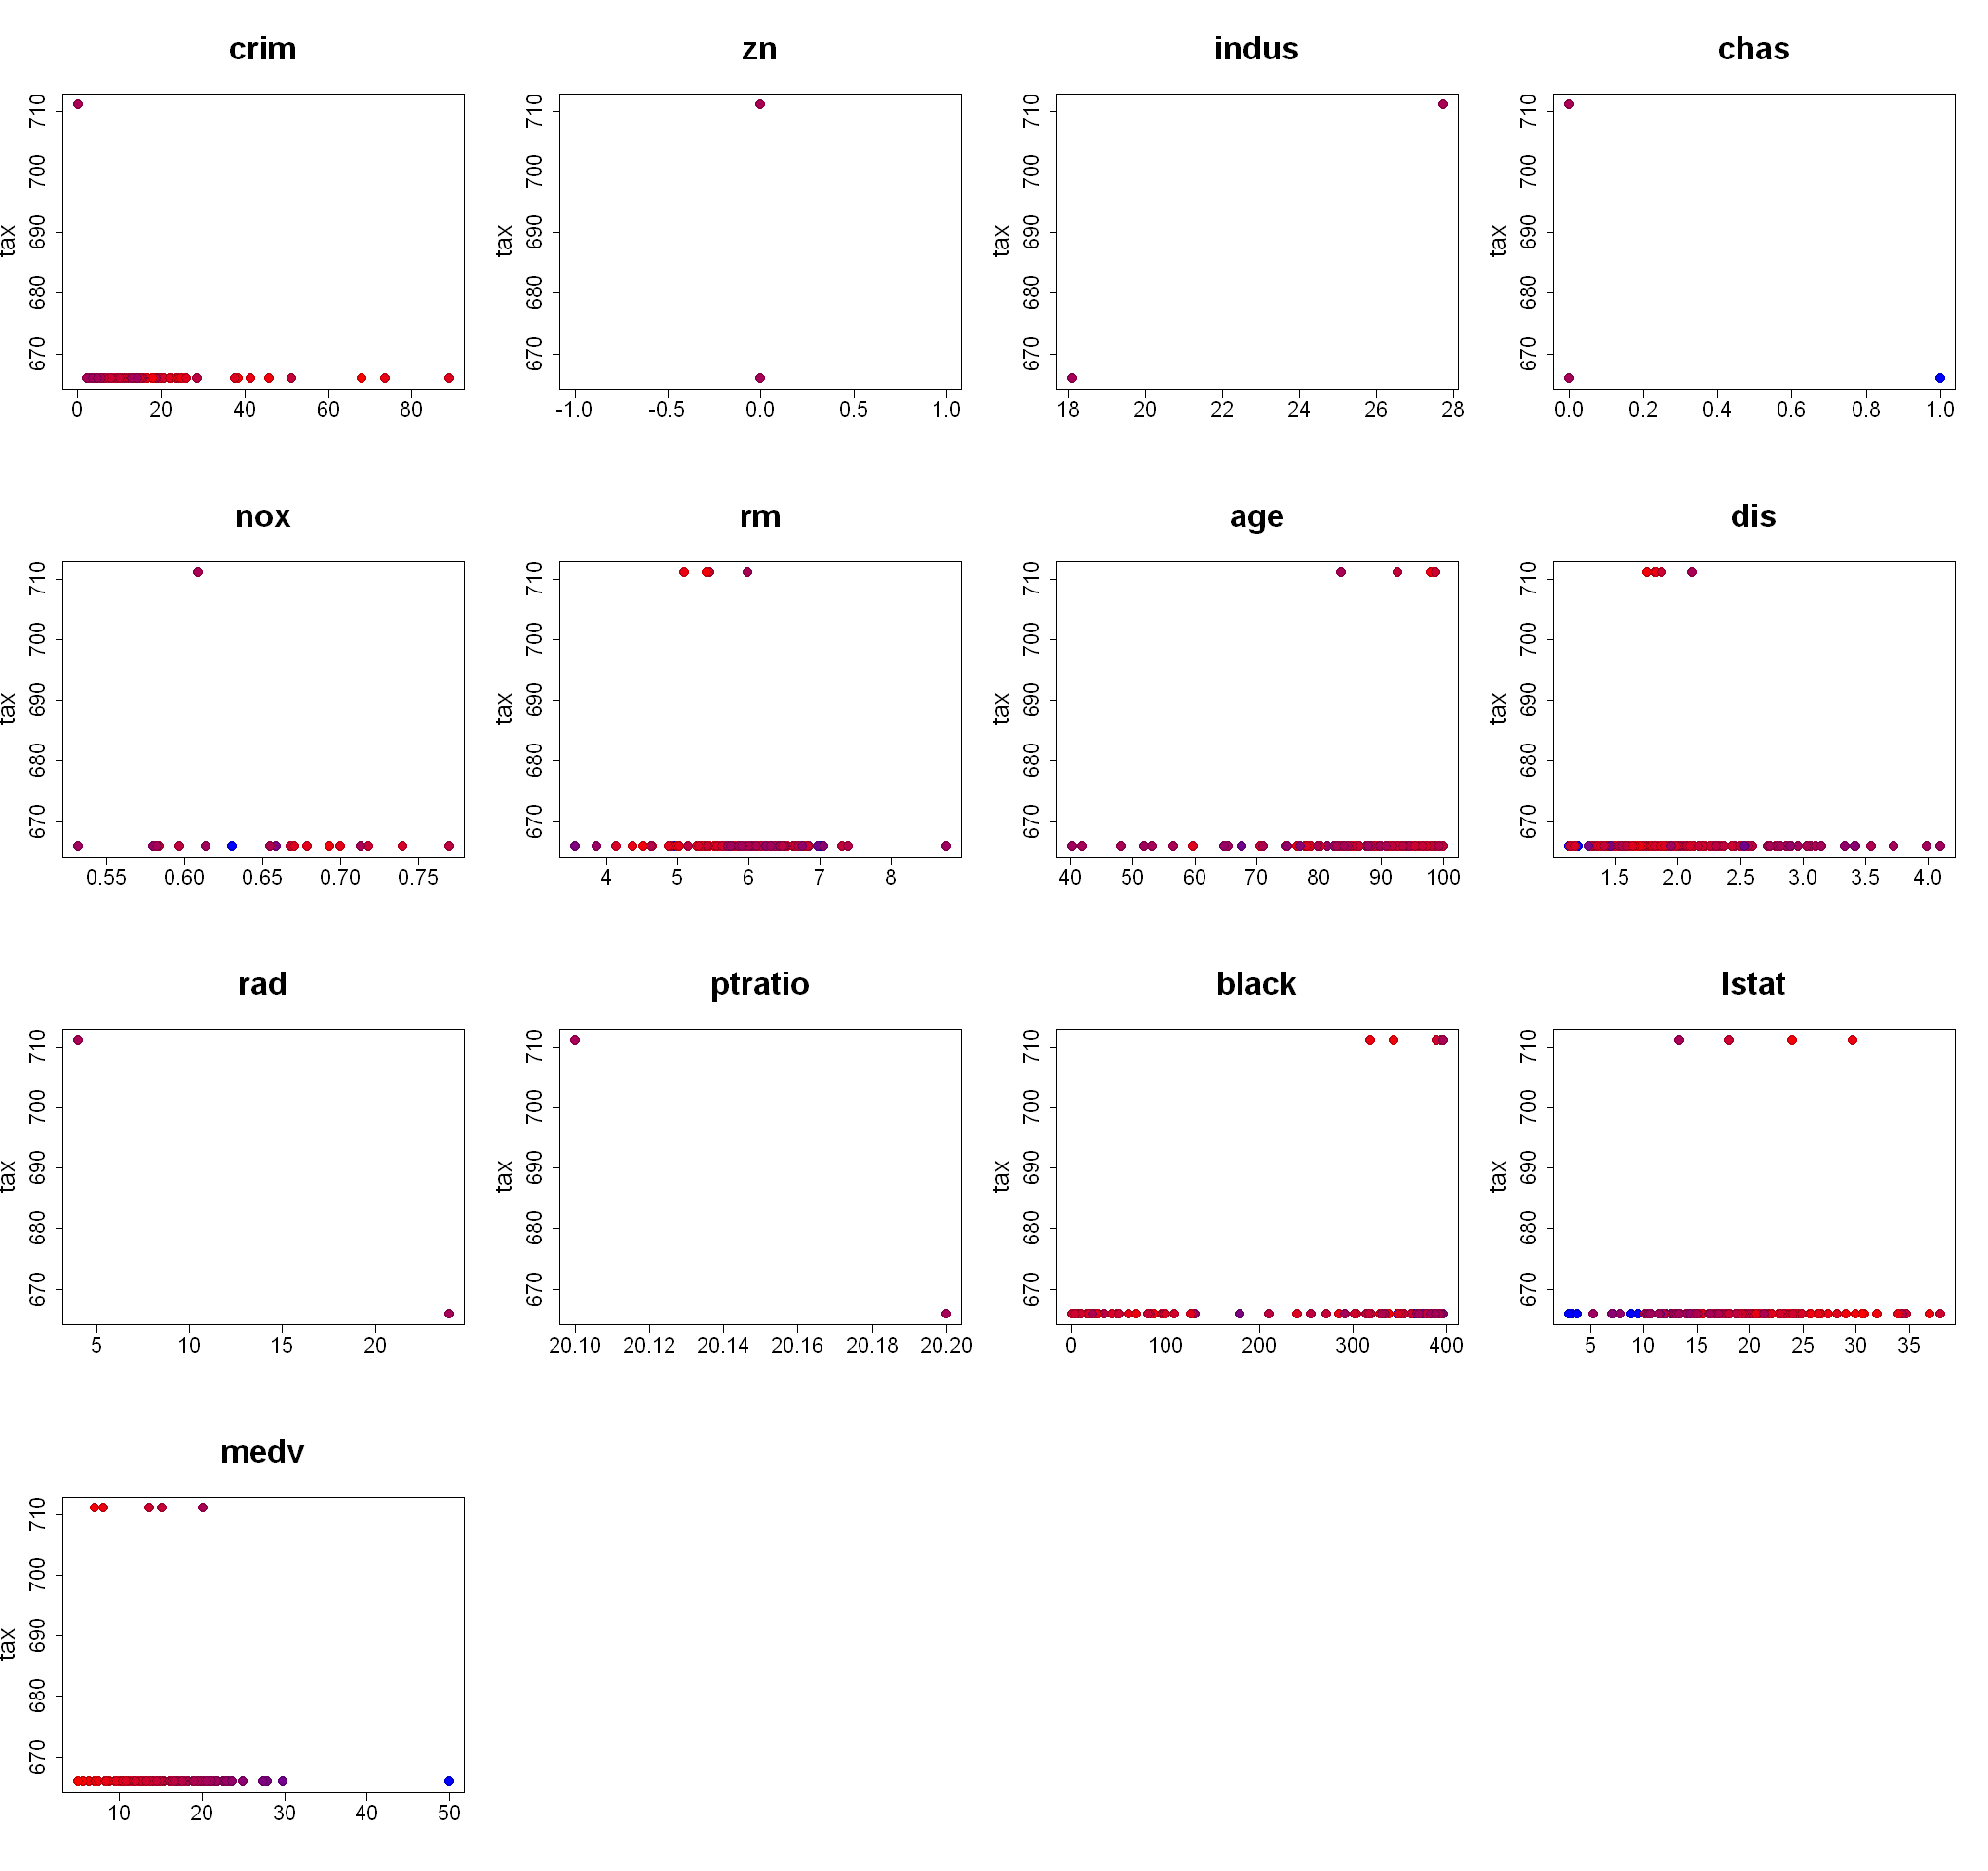

In [68]:
multiplot(htr, 'tax', 4, cols[as.numeric(rownames(htr))])

<div class="alert alert-block alert-info">
<h5>Observations</h5><br>
<a id='obs-htr'></a>
<b>Features of high tax-rate towns :</b><br>
    • <b>crim</b> &rarr; high crim<br>
    • <b>zn</b> = 0 &rarr; no large residential land tracts (> 25000 sq ft)<br>
    • <b>indus</b> = 18.1, 27.74 &rarr; high proportion of industrial area<br>
    • <b>nox</b> &rarr; amongst the towns with high concentration of nitrogen oxide<br>
    • <b>age</b> &rarr; high proportion of units built prior to 1940 <br>
    • <b>dis</b> &rarr; nearby to business centers<br>
    • <b>rad</b> = 24 &rarr; closer to radial highways<br>
    • <b>ptratio</b> = 20.2, 20.1 &rarr; high pupil-teacher ratio<br>
    • <b>lstat</b> &rarr; slightly higher concentration than overall<br>
    • <b>medv</b> &rarr; low median house value<br>

*Working notes below*
</div>

##### Range

In [69]:
# Range
htr_rng = sapply(htr, range)
df_rng = sapply(df, range)
res = rbind(htr_rng, df_rng)
rownames(res) = c('htr_min','htr_max','min','max')
res = rbind(res, 'p5'=sapply(df, quantile, probs=0.05), 'p10'=sapply(df, quantile, probs=0.1),
            'p25'=sapply(df, quantile, probs=0.25), 'p50'=sapply(df, median), 
            'p75'=sapply(df, quantile, probs=0.75), 'p90'=sapply(df, quantile, probs=0.9),
            'p95'=sapply(df, quantile, probs=0.95))
round(t(res),2)

,htr_min,htr_max,min,max,p5,p10,p25,p50,p75,p90,p95
crim,0.11,88.98,0.01,88.98,0.03,0.04,0.08,0.26,3.68,10.75,15.79
zn,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,12.50,42.50,80.00
indus,18.10,27.74,0.46,27.74,2.18,2.91,5.19,9.69,18.10,19.58,21.89
chas,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
nox,0.53,0.77,0.38,0.87,0.41,0.43,0.45,0.54,0.62,0.71,0.74
rm,3.56,8.78,3.56,8.78,5.31,5.59,5.89,6.21,6.62,7.15,7.59
age,40.30,100.00,2.90,100.00,17.72,26.95,45.02,77.50,94.07,98.80,100.00
dis,1.13,4.10,1.13,12.13,1.46,1.63,2.10,3.21,5.19,6.82,7.83
rad,4.00,24.00,1.00,24.00,2.00,3.00,4.00,5.00,24.00,24.00,24.00
tax,666.00,711.00,187.00,711.00,222.00,233.00,279.00,330.00,666.00,666.00,666.00


[go to toc](#toc2)

##### --&nbsp; Workings &nbsp; --------------------------------------------------------------

###### crim

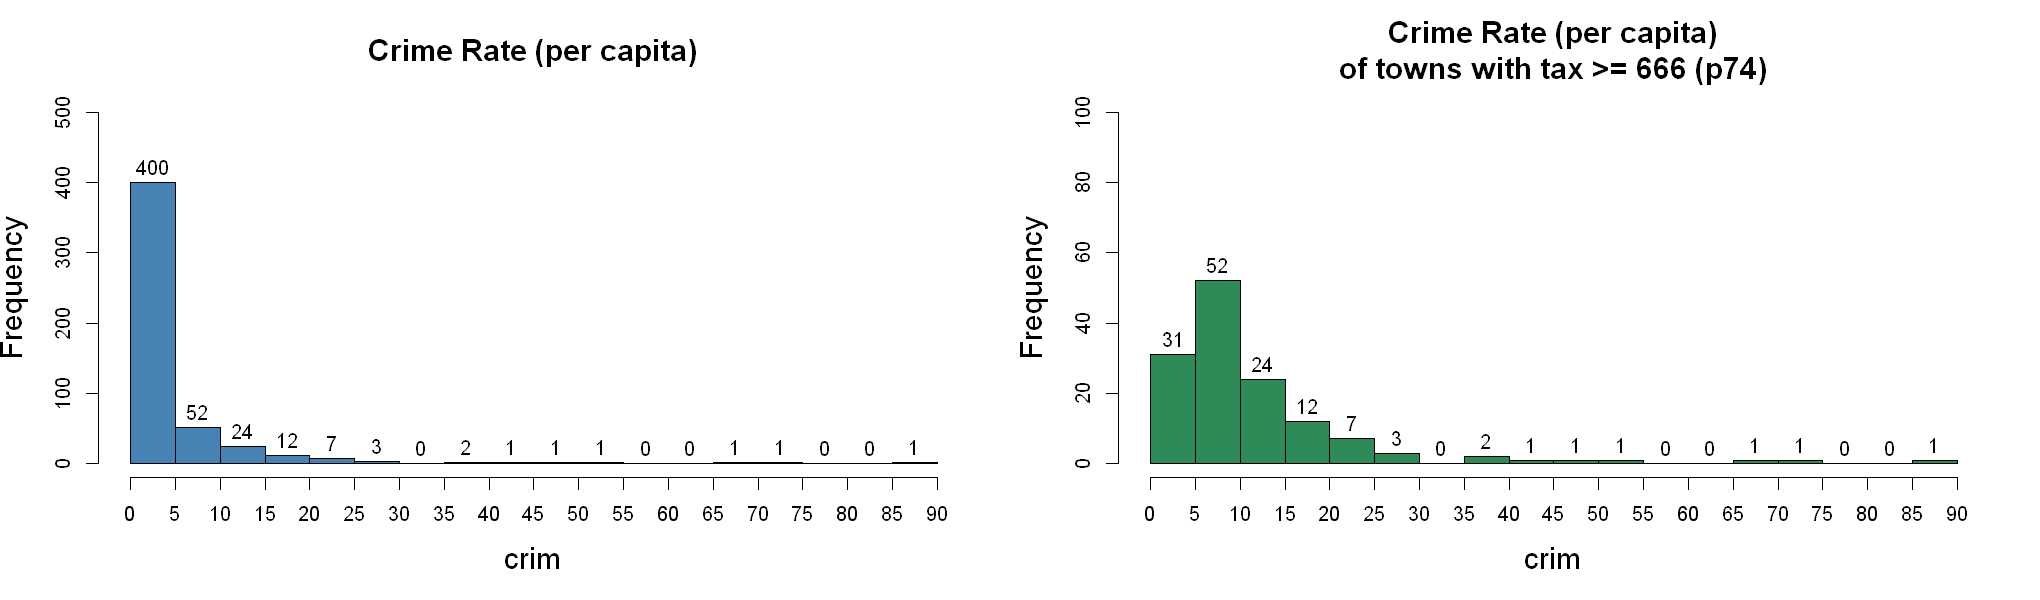

In [70]:
multihist(df, htr, 'crim', axis=T, nclass=20, yrange1=c(0,500), yrange2=c(0,100),
          title='Crime Rate (per capita)', subtitle='of towns with tax >= 666 (p74)')

All the towns with crim > 5 have tax >= 666.

###### zn

In [71]:
var_prop(df, htr, 'zn', 0)

,count_df1,prop_df1,count_df2,prop_df2,ratio
1,372,0.735,137,1,1.361


###### indus

In [72]:
var_prop(df, htr, 'indus', c(18.1,27.74))

,count_df1,prop_df1,count_df2,prop_df2,ratio
18.1,132,0.261,132,0.964,3.693
27.74,5,0.010,5,0.036,3.600
total,137,0.271,137,1.000,3.690


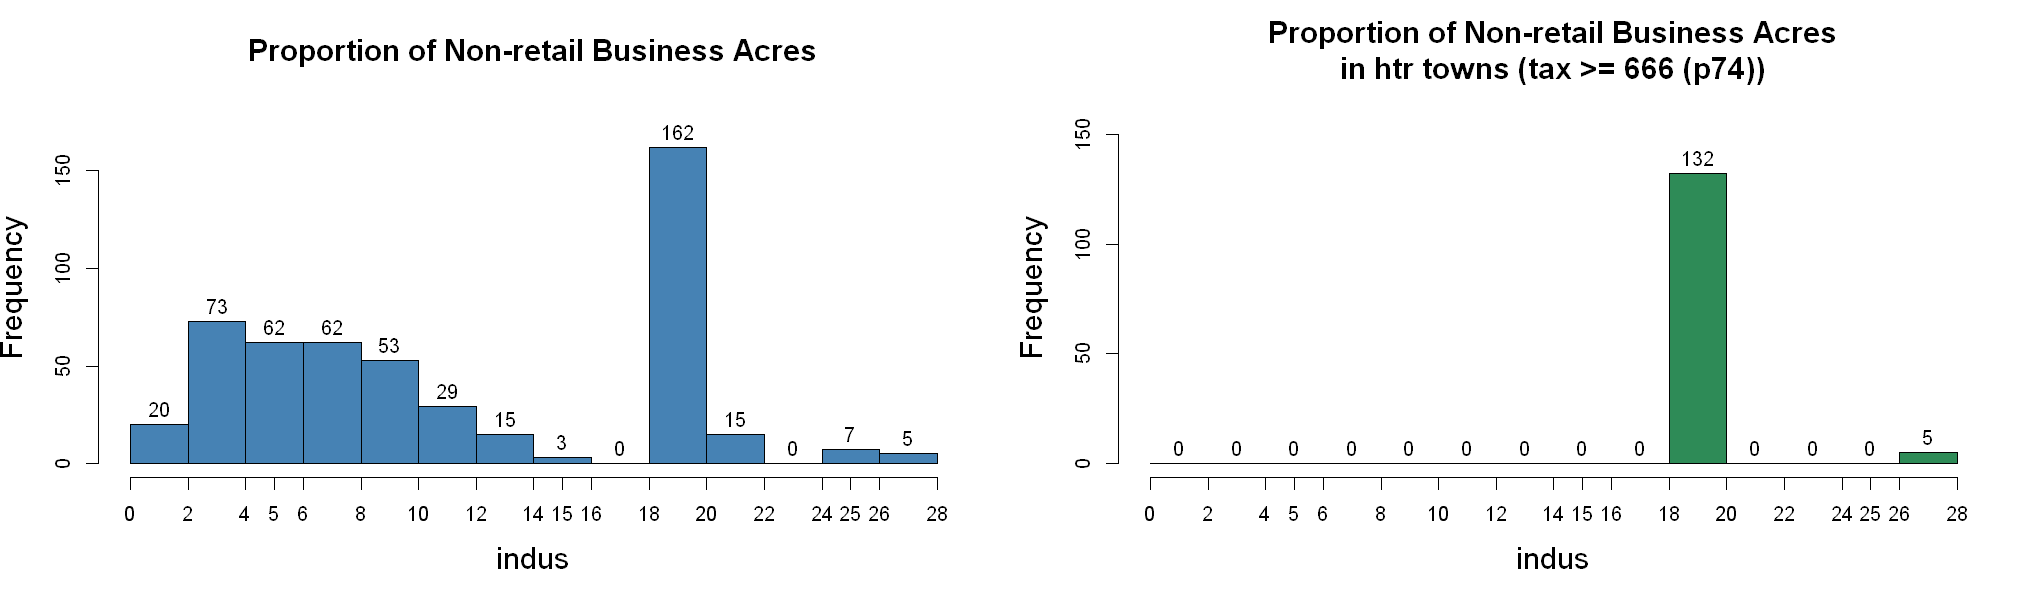

In [73]:
multihist(df, htr, 'indus', axis=T, yrange1=c(0,180), yrange2=c(0,160),
          title='Proportion of Non-retail Business Acres', subtitle='in htr towns (tax >= 666 (p74))')

###### chas

In [74]:
var_prop(df, htr, 'chas', c(0,1))

,count_df1,prop_df1,count_df2,prop_df2,ratio
0,471,0.931,129,0.942,1.012
1,35,0.069,8,0.058,0.841
total,506,1.000,137,1.000,1.000


###### nox

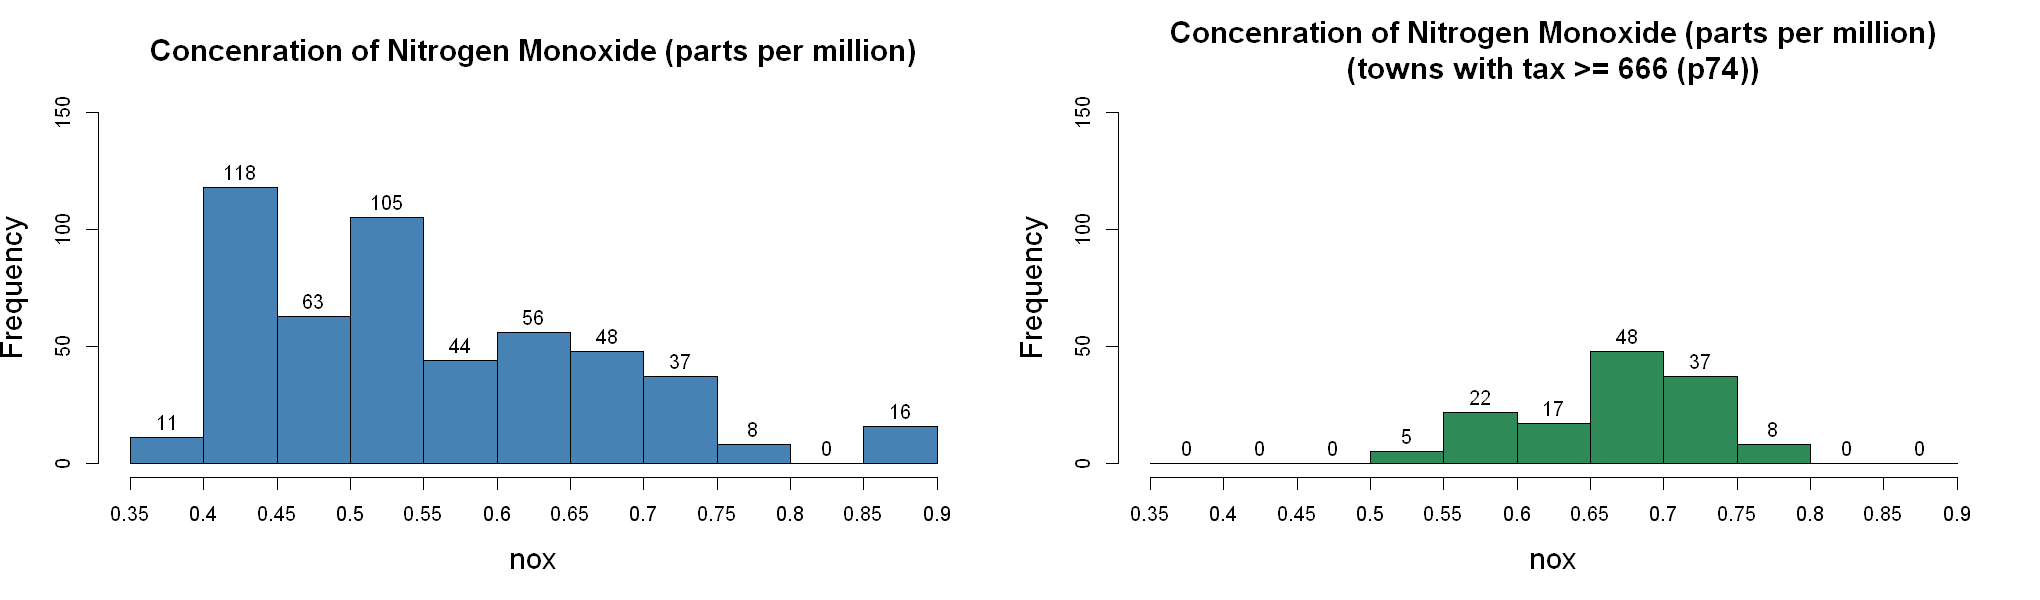

In [75]:
multihist(df, htr, 'nox', axis=T, yrange1=c(0,150), yrange2=c(0,150),
          title='Concenration of Nitrogen Monoxide (parts per million)', 
          subtitle='(towns with tax >= 666 (p74))')

###### rm

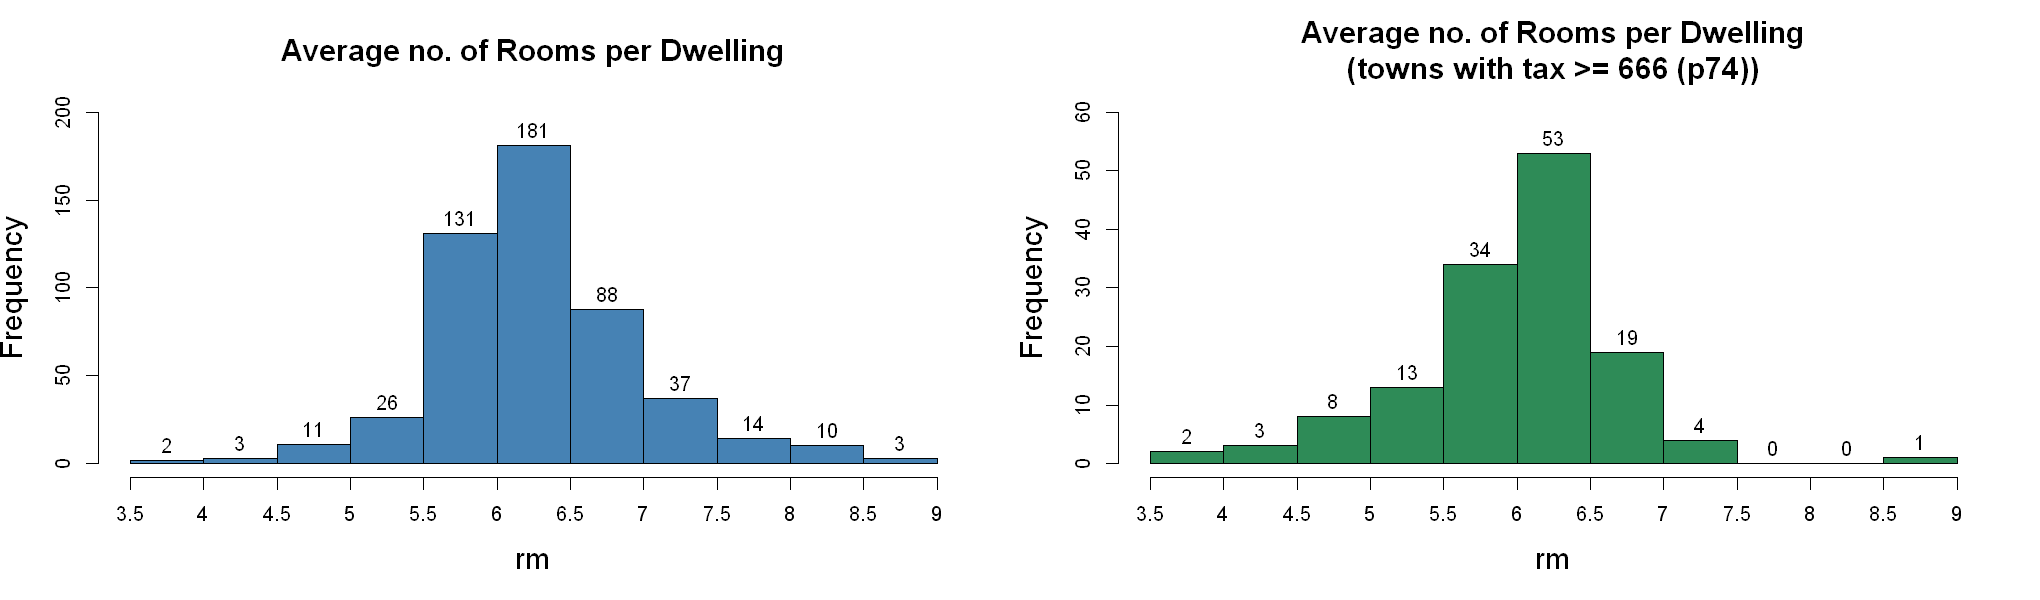

In [76]:
multihist(df, htr, 'rm', axis=T, yrange1=c(0,200), yrange2=c(0,60),
          title='Average no. of Rooms per Dwelling', subtitle='(towns with tax >= 666 (p74))')

###### age

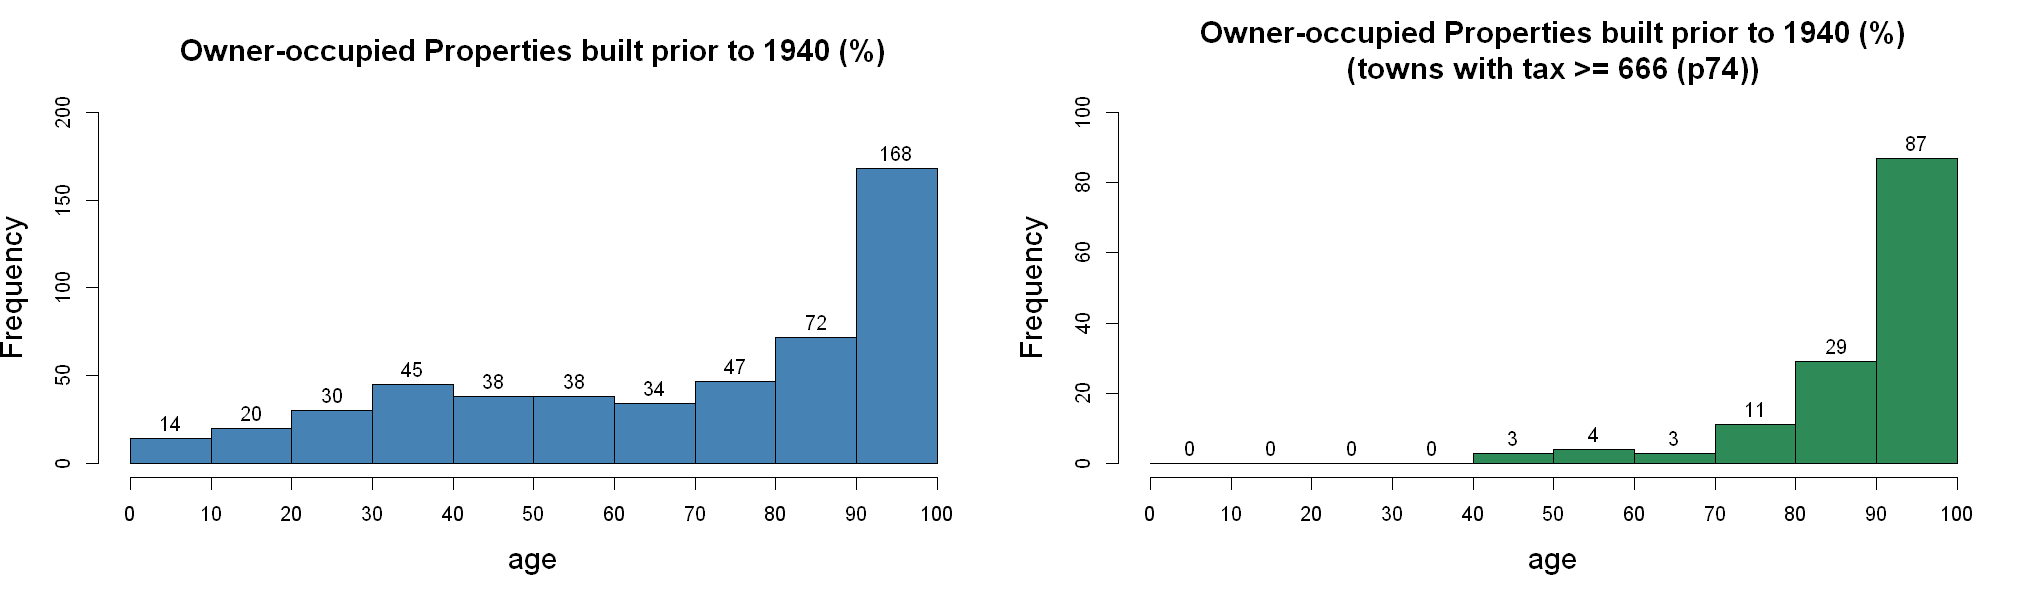

In [77]:
multihist(df, htr, 'age', axis=T, yrange1=c(0,200), yrange2=c(0,100),
          title='Owner-occupied Properties built prior to 1940 (%)', 
          subtitle='(towns with tax >= 666 (p74))')

###### dis

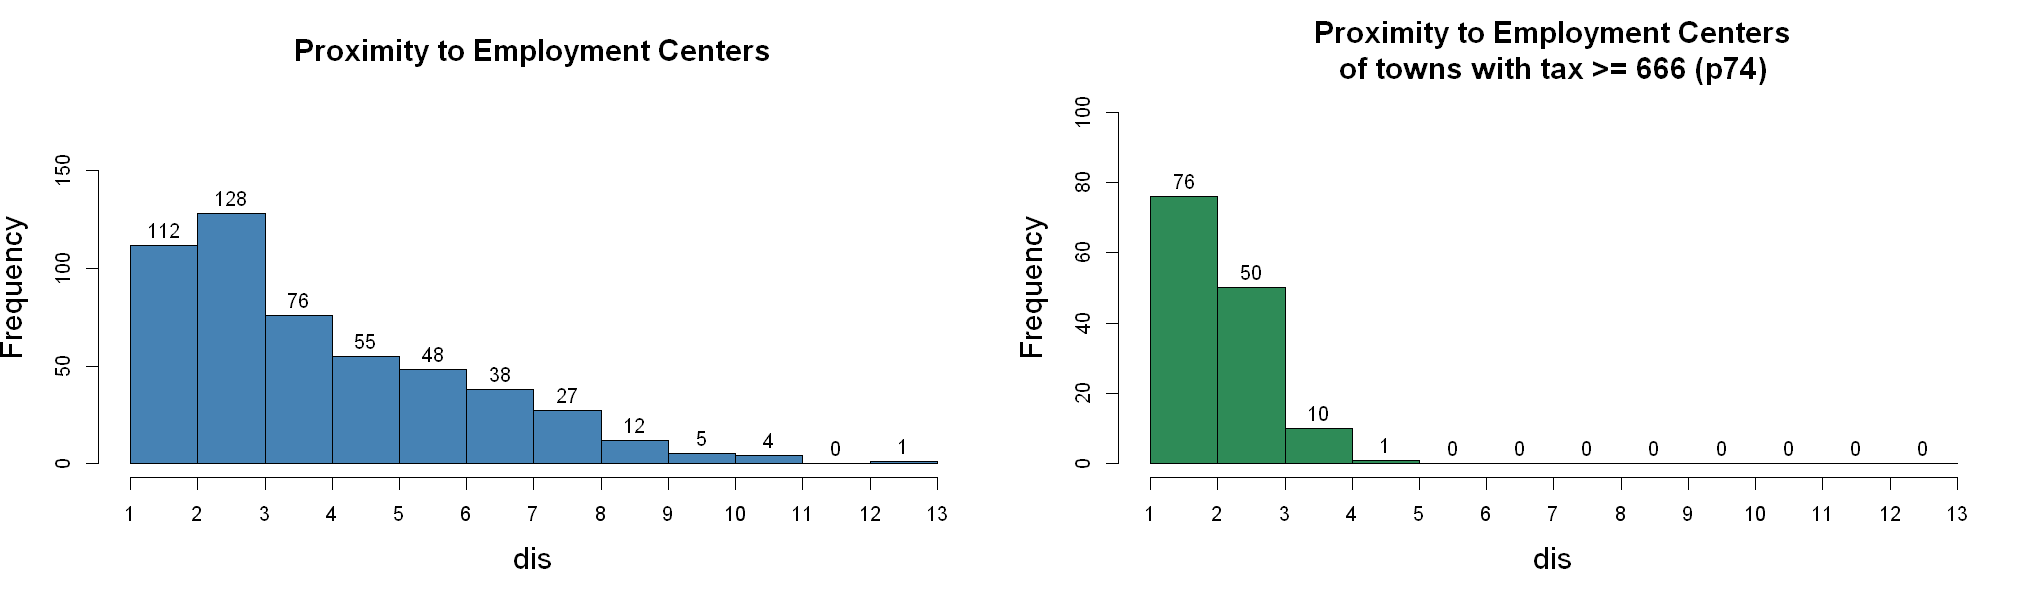

In [78]:
multihist(df, htr, 'dis', axis=T, yrange1=c(0,180), yrange2=c(0,100),
          title='Proximity to Employment Centers', subtitle='of towns with tax >= 666 (p74)')

###### rad

In [79]:
var_prop(df, htr, 'rad', c(4,24))

,count_df1,prop_df1,count_df2,prop_df2,ratio
4,110,0.217,5,0.036,0.166
24,132,0.261,132,0.964,3.693
total,242,0.478,137,1.000,2.092


###### ptratio

In [80]:
var_prop(df, htr, 'ptratio', c(20.1,20.2))

,count_df1,prop_df1,count_df2,prop_df2,ratio
20.1,5,0.010,5,0.036,3.600
20.2,140,0.277,132,0.964,3.480
total,145,0.287,137,1.000,3.484


###### black

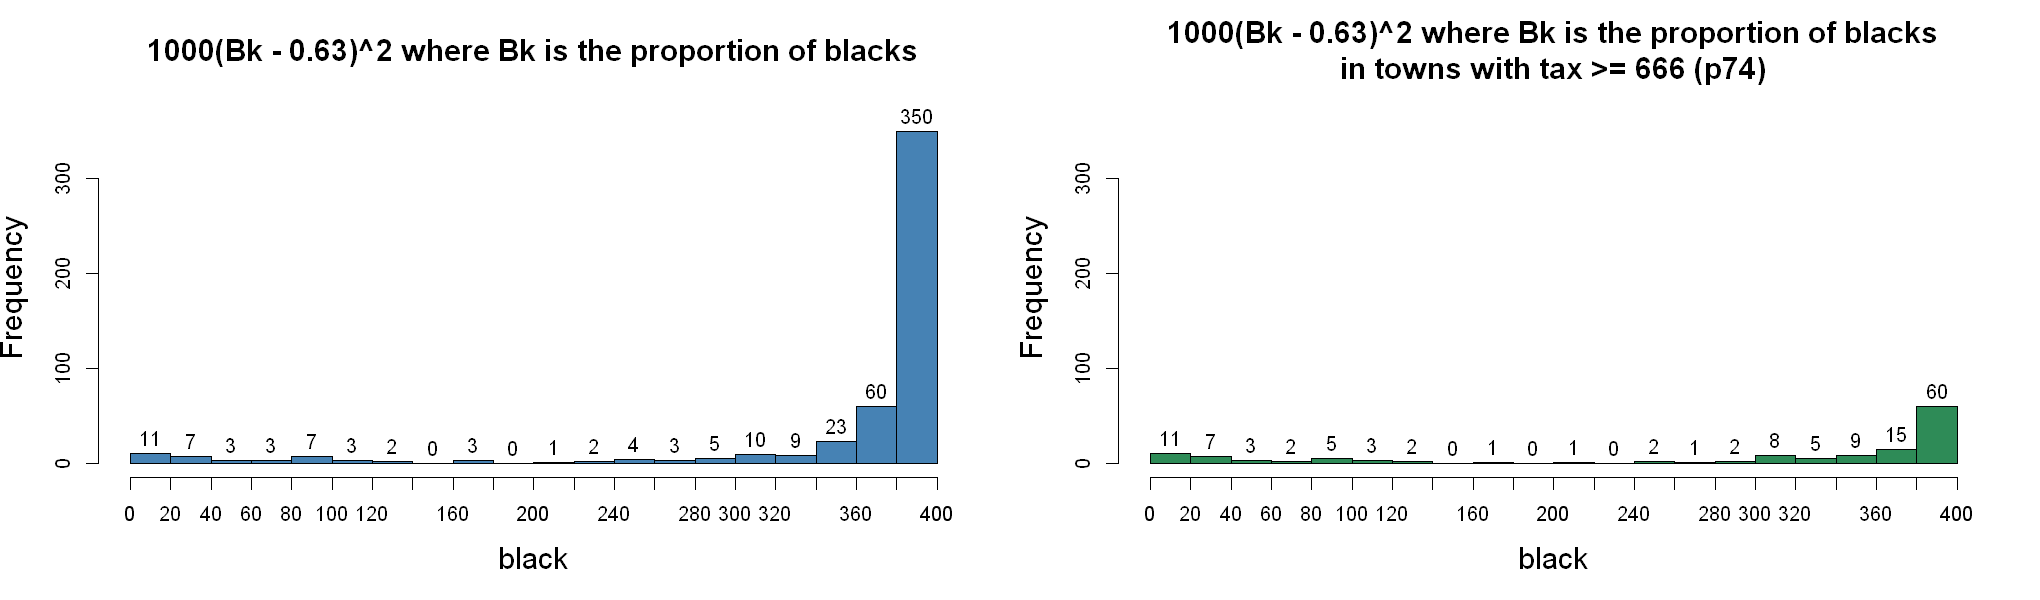

In [81]:
multihist(df, df[df$tax>=666,], 'black', nclass=15, axis=T, yrange1=c(0,370), yrange2=c(0,370),
          title='1000(Bk - 0.63)^2 where Bk is the proportion of blacks', 
          subtitle='in towns with tax >= 666 (p74)', perc=F)

###### lstat

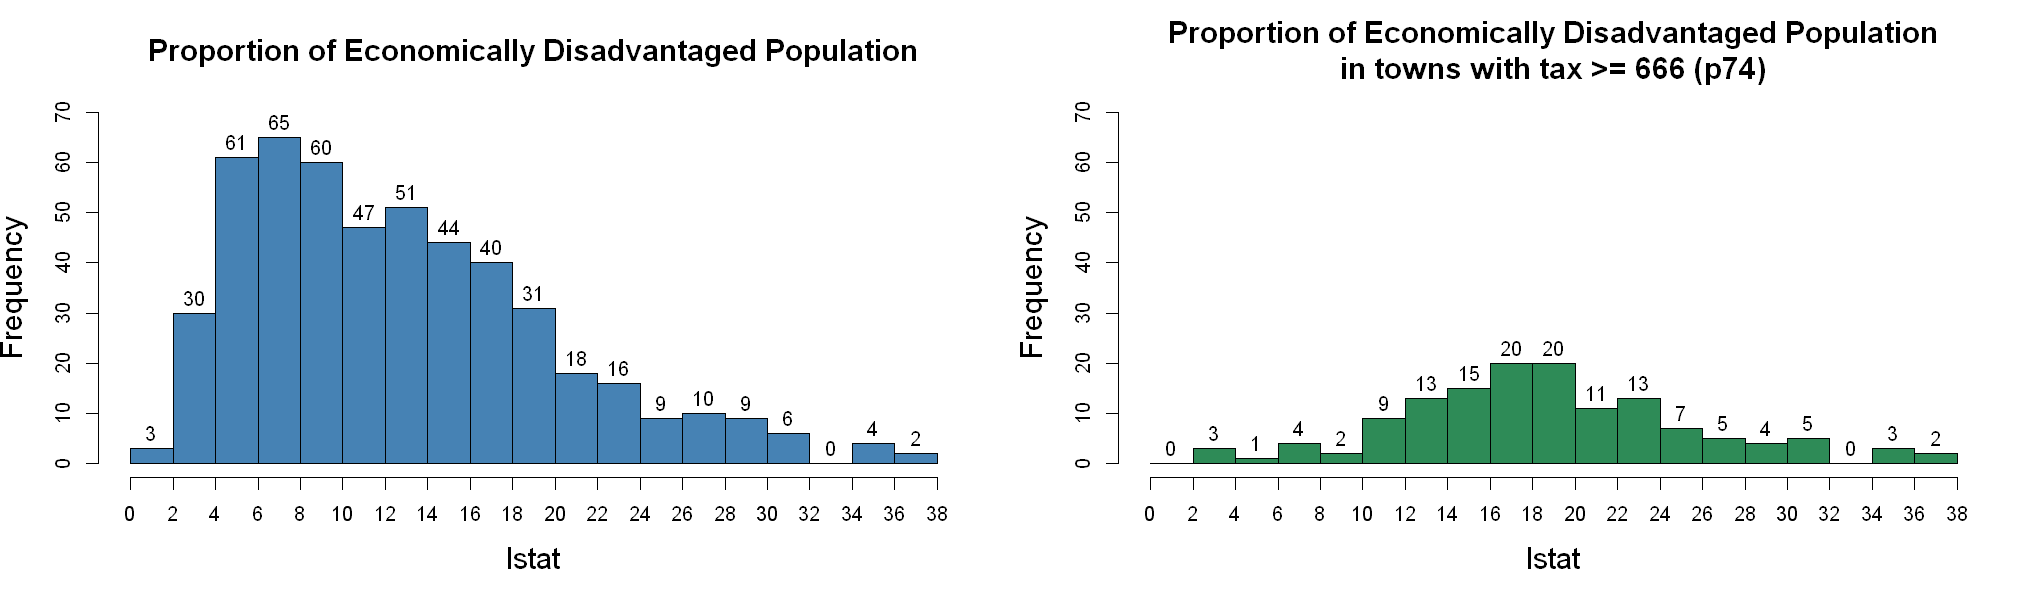

In [82]:
multihist(df, df[df$tax>=666,], 'lstat', nclass='FD', axis=T, yrange1=c(0,70), yrange2=c(0,70),
          title='Proportion of Economically Disadvantaged Population', 
          subtitle='in towns with tax >= 666 (p74)')

###### medv

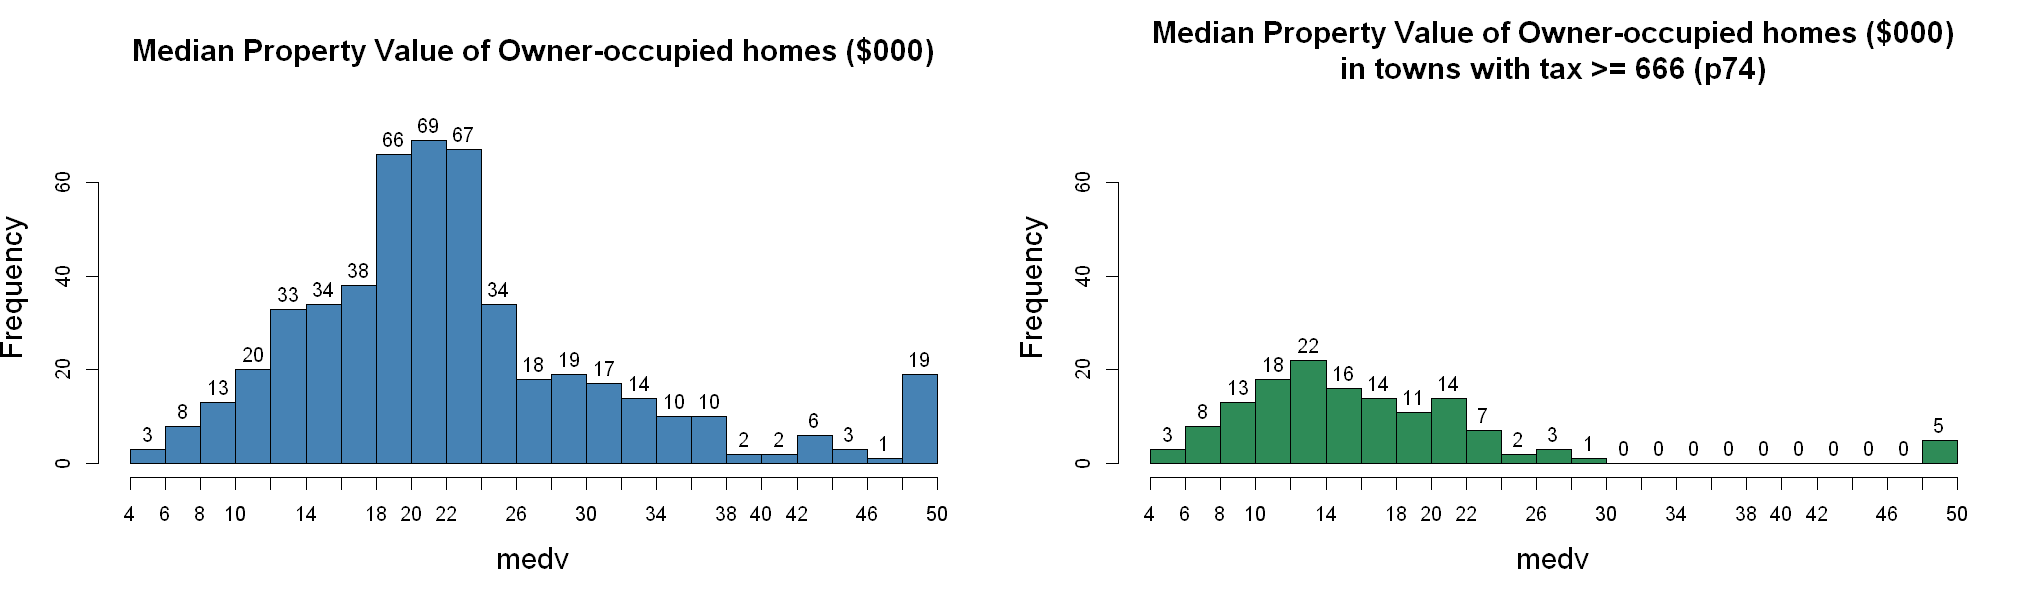

In [83]:
multihist(df, df[df$tax>=666,], 'medv', nclass='FD', axis=T, yrange1=c(0,75), yrange2=c(0,75),
          title=paste("Median Property Value of Owner-occupied homes ($000)"), 
          subtitle='in towns with tax >= 666 (p74)')

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[go to toc](#toc2)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

#### <i>3) Suburbs with high pupil-teacher ratio</i>

In [84]:
quantile(df$ptratio, c(0.25,0.5,0.75,0.9,0.95))

25%   50%   75%   90%   95% 
17.40 19.05 20.20 20.90 21.00

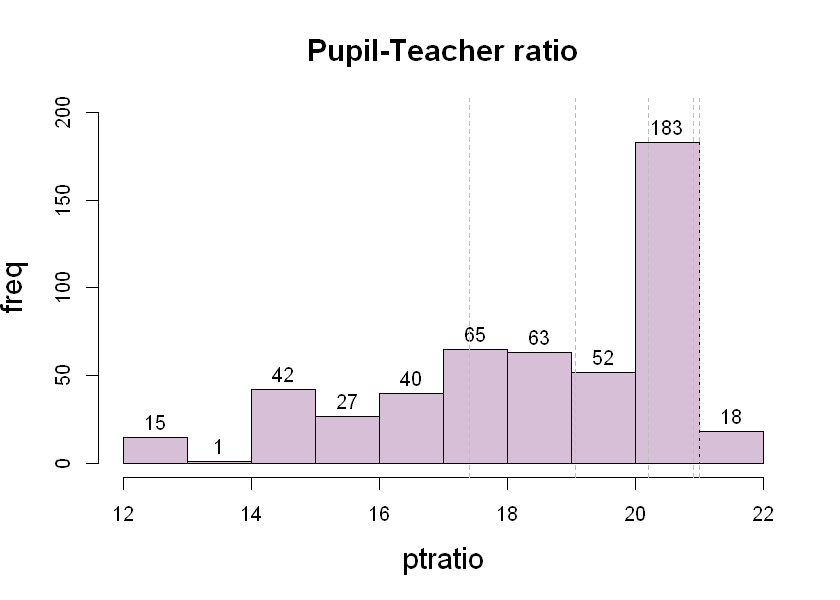

In [85]:
# Distribution
plot_pars(7,5)
hist(df$ptratio, nclass=, main='Pupil-Teacher ratio', xlab='ptratio', ylab='freq', 
     col='thistle', cex.main=1.5, cex.lab=1.5, label=T, ylim=c(0,200))
for (q in quantile(df$ptratio, c(0.25,0.5,0.75,0.9,0.95))) {abline(v=q, lty=2, lwd=0.5, col='grey')}

In [86]:
# High ptratio
quantile(df$ptratio, 0.95)

# Towns with High pupil-teacher ratio
hptr = df[df$ptratio >= quantile(df$ptratio, 0.95), ]
cat(dim(hptr))
head(hptr)

95% 
 21

45 14

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,0.62976,0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21,396.90,8.26,20.4
15,0.63796,0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21,380.02,10.26,18.2
16,0.62739,0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21,395.62,8.47,19.9
17,1.05393,0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21,386.85,6.58,23.1
18,0.78420,0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21,386.75,14.67,17.5
19,0.80271,0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21,288.99,11.69,20.2


##### Scatterplot

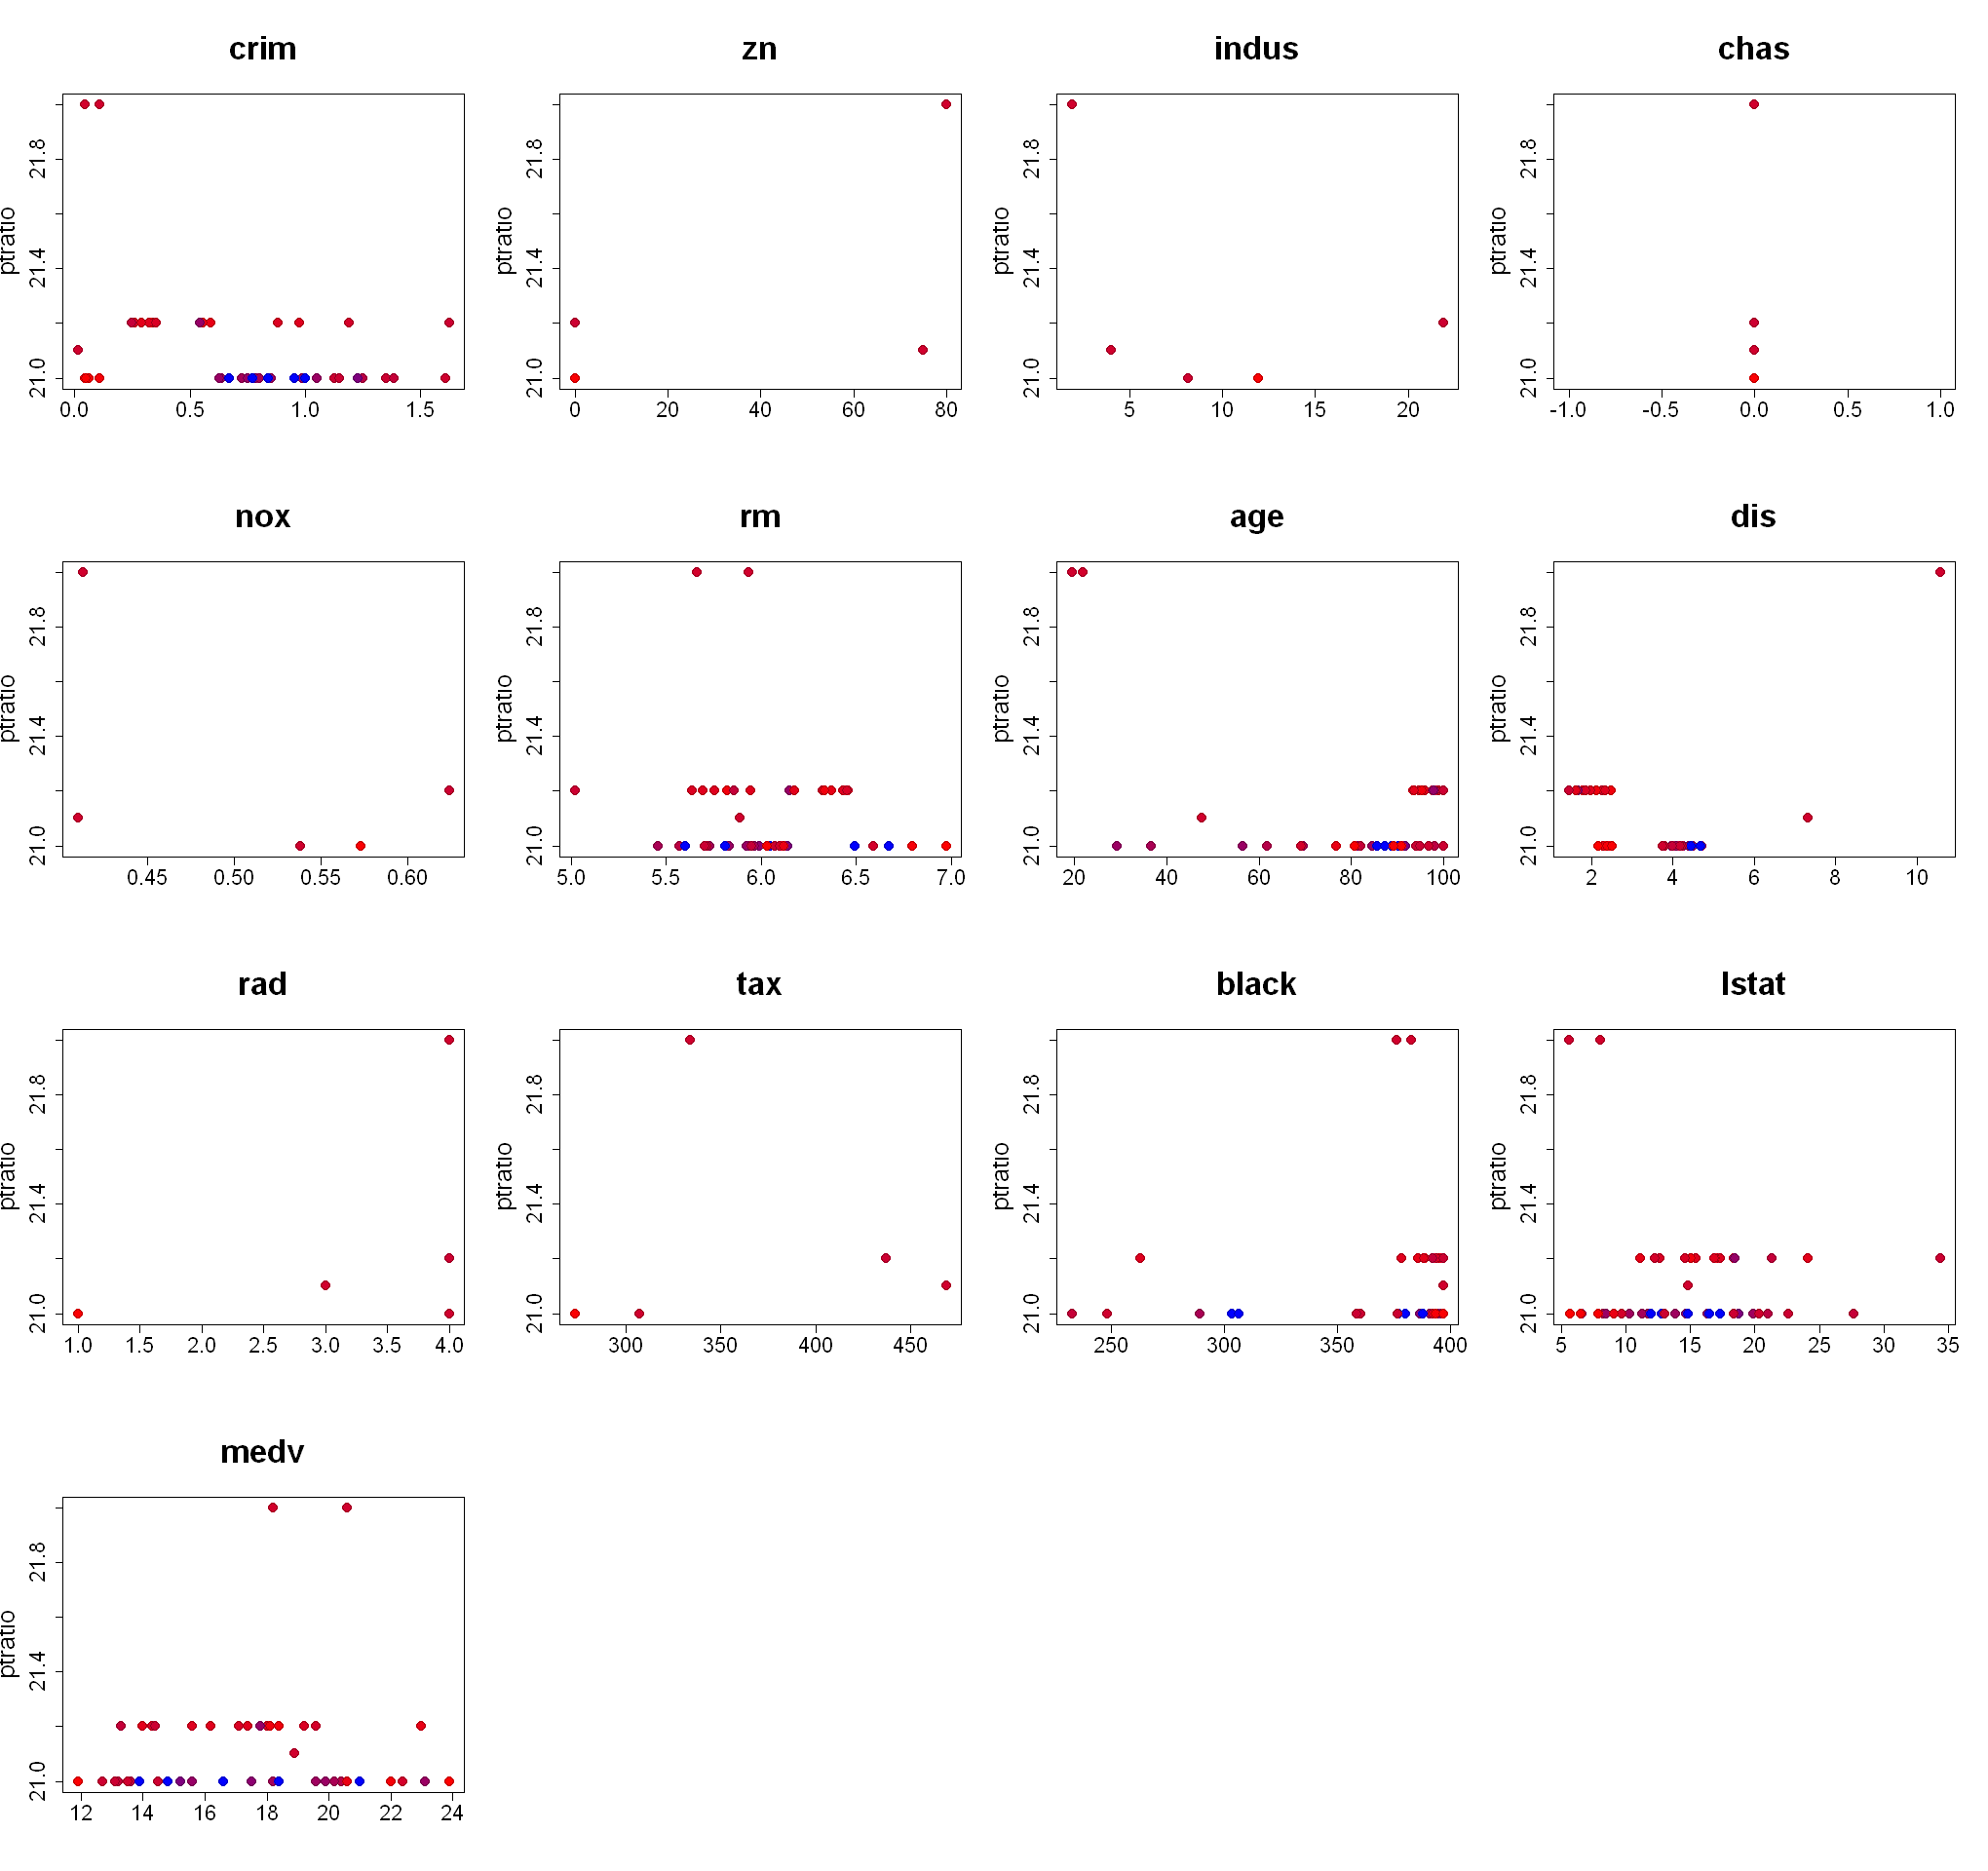

In [87]:
multiplot(hptr, 'ptratio', 4, cols[as.numeric(rownames(htr))])

<a id='obs-hptr'></a>
<div class="alert alert-block alert-info">
<h5>Observations</h5><br>
<b>Features of towns with extremely high pupil-teacher ratio (ptratio >= 21 (p95)):</b><br>
    n = 45<br>
    • <b>crim</b> &rarr; low crim (0-5)<br>
    • <b>zn</b> &rarr; mostly zn=0 i.e no large residential land tracts (> 25000 sq ft), but there are 3 towns with very high proportion (75,80) of large tracts<br>
    • <b>chas</b> &rarr; none of the towns has Charles River running through it<br>
    • <b>age</b> &rarr; most towns have high proportion of units built prior to 1940 <br>
    • <b>dis</b> &rarr; distance from business centers ranges from 1 to 5 in almost all cases<br>
    • <b>rad</b> &rarr; the towns rank low on the accessibility index<br>
    • <b>tax</b> &rarr; medium property tax rate levels<br>
    • <b>medv</b> &rarr; medium levels of median house value<br>

*Working notes below*
</div>

##### Range

In [88]:
# Range
hptr_rng = sapply(hptr, range)
df_rng = sapply(df, range)
res = rbind(hptr_rng, df_rng)
rownames(res) = c('hptr_min','hptr_max','min','max')
res = rbind(res, 'p5'=sapply(df, quantile, probs=0.05), 'p10'=sapply(df, quantile, probs=0.1),
            'p25'=sapply(df, quantile, probs=0.25), 'p50'=sapply(df, median), 
            'p75'=sapply(df, quantile, probs=0.75), 'p90'=sapply(df, quantile, probs=0.9),
            'p95'=sapply(df, quantile, probs=0.95))
round(t(res),2)

,hptr_min,hptr_max,min,max,p5,p10,p25,p50,p75,p90,p95
crim,0.01,1.63,0.01,88.98,0.03,0.04,0.08,0.26,3.68,10.75,15.79
zn,0.00,80.00,0.00,100.00,0.00,0.00,0.00,0.00,12.50,42.50,80.00
indus,1.91,21.89,0.46,27.74,2.18,2.91,5.19,9.69,18.10,19.58,21.89
chas,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
nox,0.41,0.62,0.38,0.87,0.41,0.43,0.45,0.54,0.62,0.71,0.74
rm,5.02,6.98,3.56,8.78,5.31,5.59,5.89,6.21,6.62,7.15,7.59
age,19.50,100.00,2.90,100.00,17.72,26.95,45.02,77.50,94.07,98.80,100.00
dis,1.44,10.59,1.13,12.13,1.46,1.63,2.10,3.21,5.19,6.82,7.83
rad,1.00,4.00,1.00,24.00,2.00,3.00,4.00,5.00,24.00,24.00,24.00
tax,273.00,469.00,187.00,711.00,222.00,233.00,279.00,330.00,666.00,666.00,666.00


[go to toc](#toc)

##### --&nbsp; Workings &nbsp; --------------------------------------------------------------

###### crim

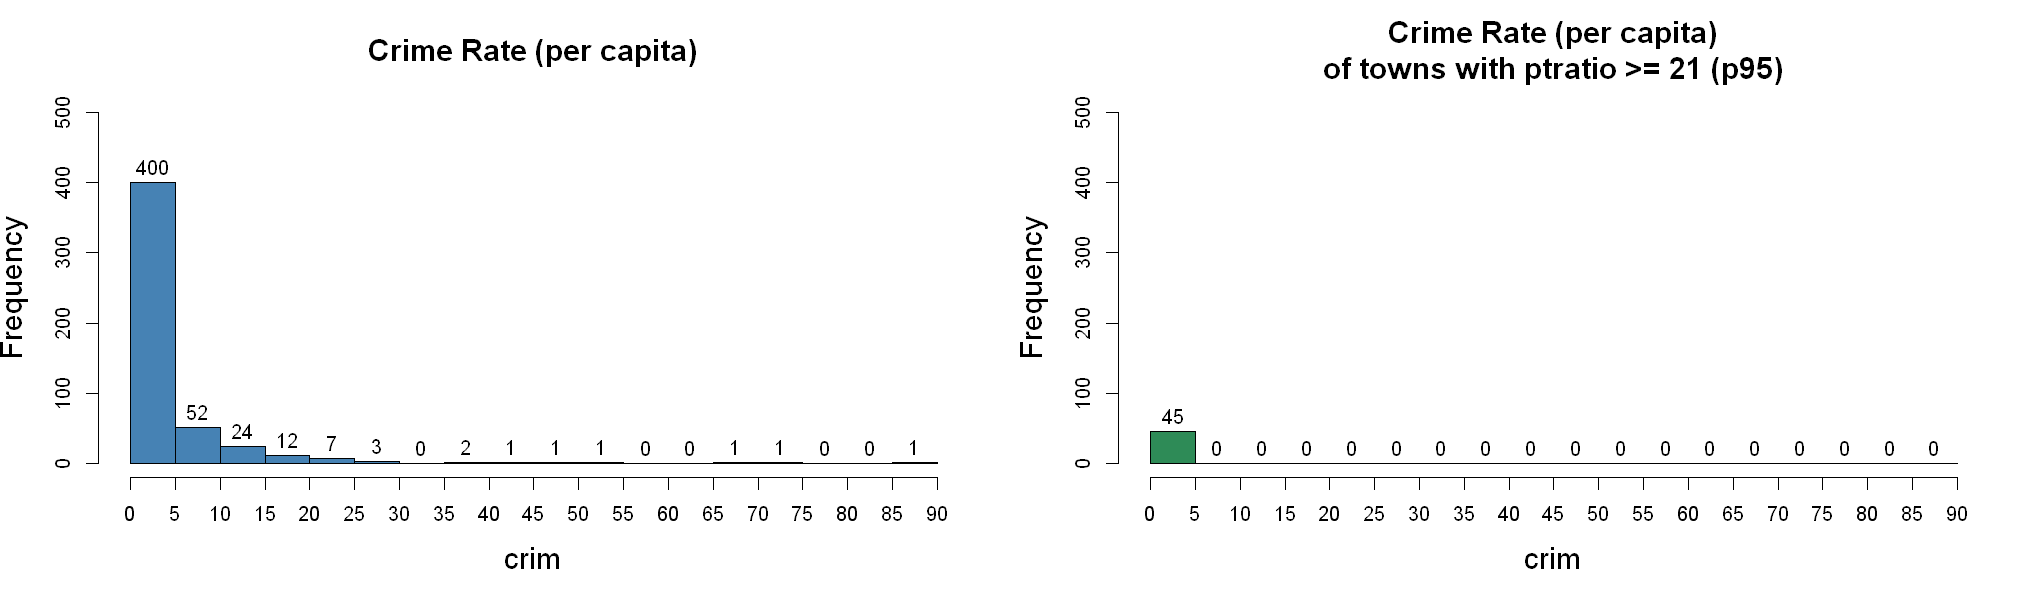

In [89]:
multihist(df, hptr, 'crim', axis=T, nclass=20, yrange1=c(0,500), yrange2=c(0,500),
          title='Crime Rate (per capita)', subtitle='of towns with ptratio >= 21 (p95)')

###### zn

,count_df1,prop_df1,count_df2,prop_df2,ratio
0,372,0.735,42,0.933,1.269
75,3,0.006,1,0.022,3.667
80,15,0.030,2,0.044,1.467
total,390,0.771,45,0.999,1.296


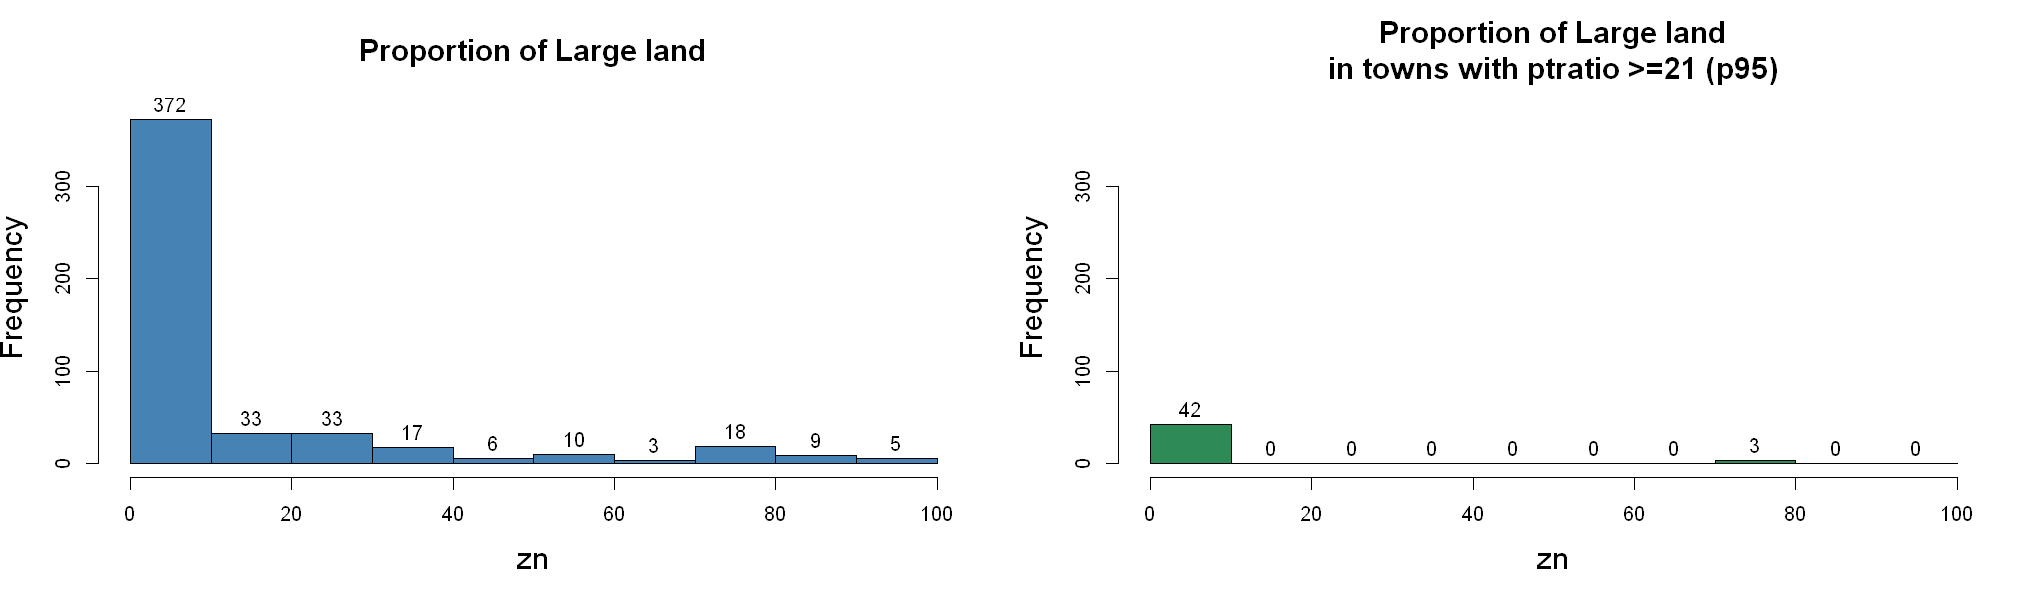

In [90]:
var_prop(df, hptr, 'zn', c(0,75,80))

multihist(df, hptr, 'zn', nclass=, yrange1=c(0,380), yrange2=c(0,380), 
          title='Proportion of Large land', subtitle='in towns with ptratio >=21 (p95)')

###### indus

,count_df1,prop_df1,count_df2,prop_df2,ratio
1.91,2,0.004,2,0.044,11.000
4,1,0.002,1,0.022,11.000
8.14,22,0.043,22,0.489,11.372
11.93,5,0.010,5,0.111,11.100
21.89,15,0.030,15,0.333,11.100
total,45,0.089,45,0.999,11.225


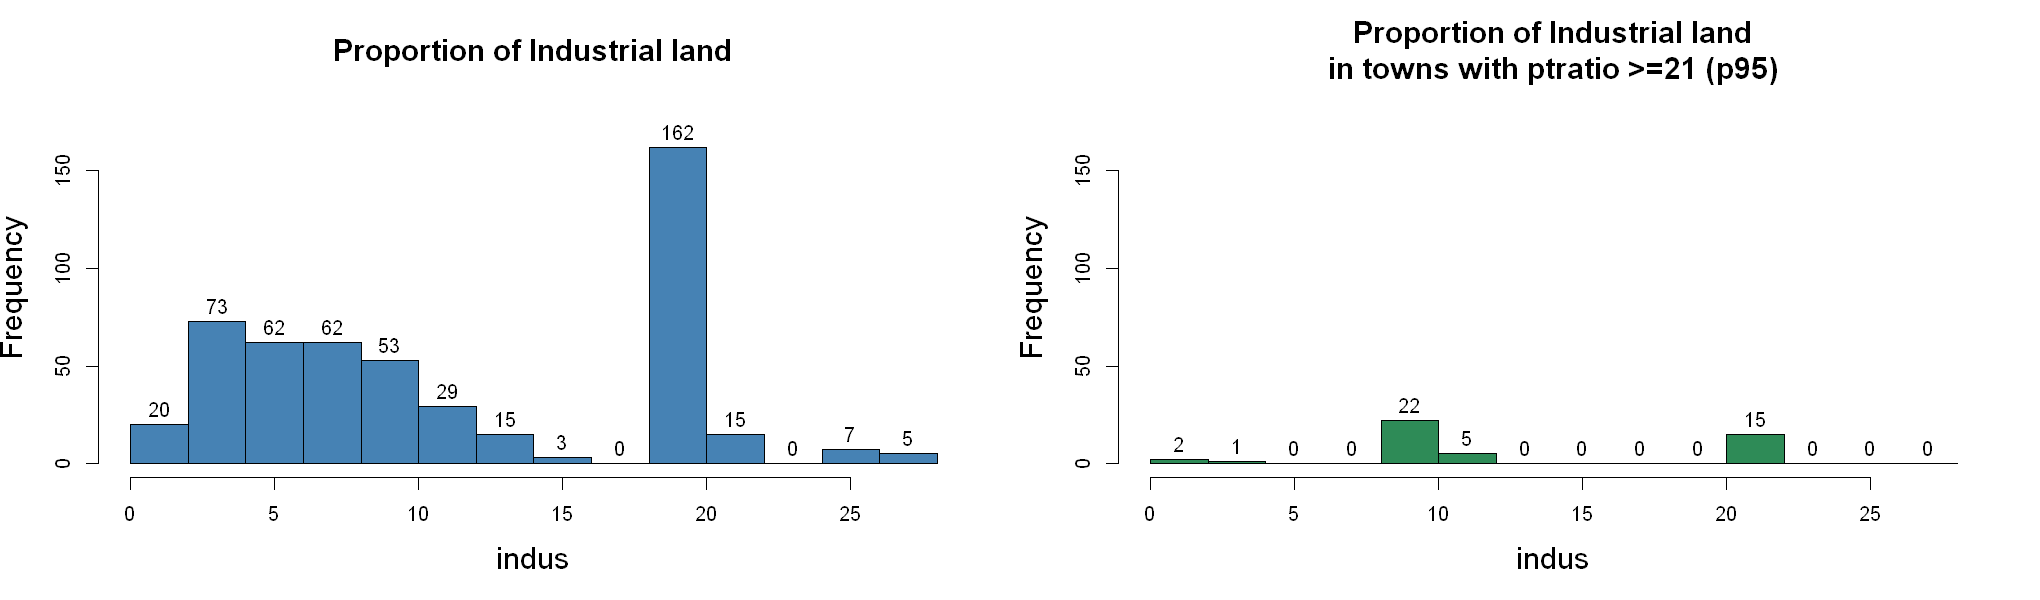

In [91]:
var_prop(df, hptr, 'indus', sort(unique(hptr$indus)))
multihist(df, hptr, 'indus', nclass=, yrange1=c(0,180), yrange2=c(0,180), 
          title='Proportion of Industrial land', subtitle='in towns with ptratio >=21 (p95)')

###### chas

In [92]:
var_prop(df, hptr, 'chas', c(0,1))

,count_df1,prop_df1,count_df2,prop_df2,ratio
0,471,0.931,45,1,1.074
1,35,0.069,0,0,0.000
total,506,1.000,45,1,1.000


###### nox

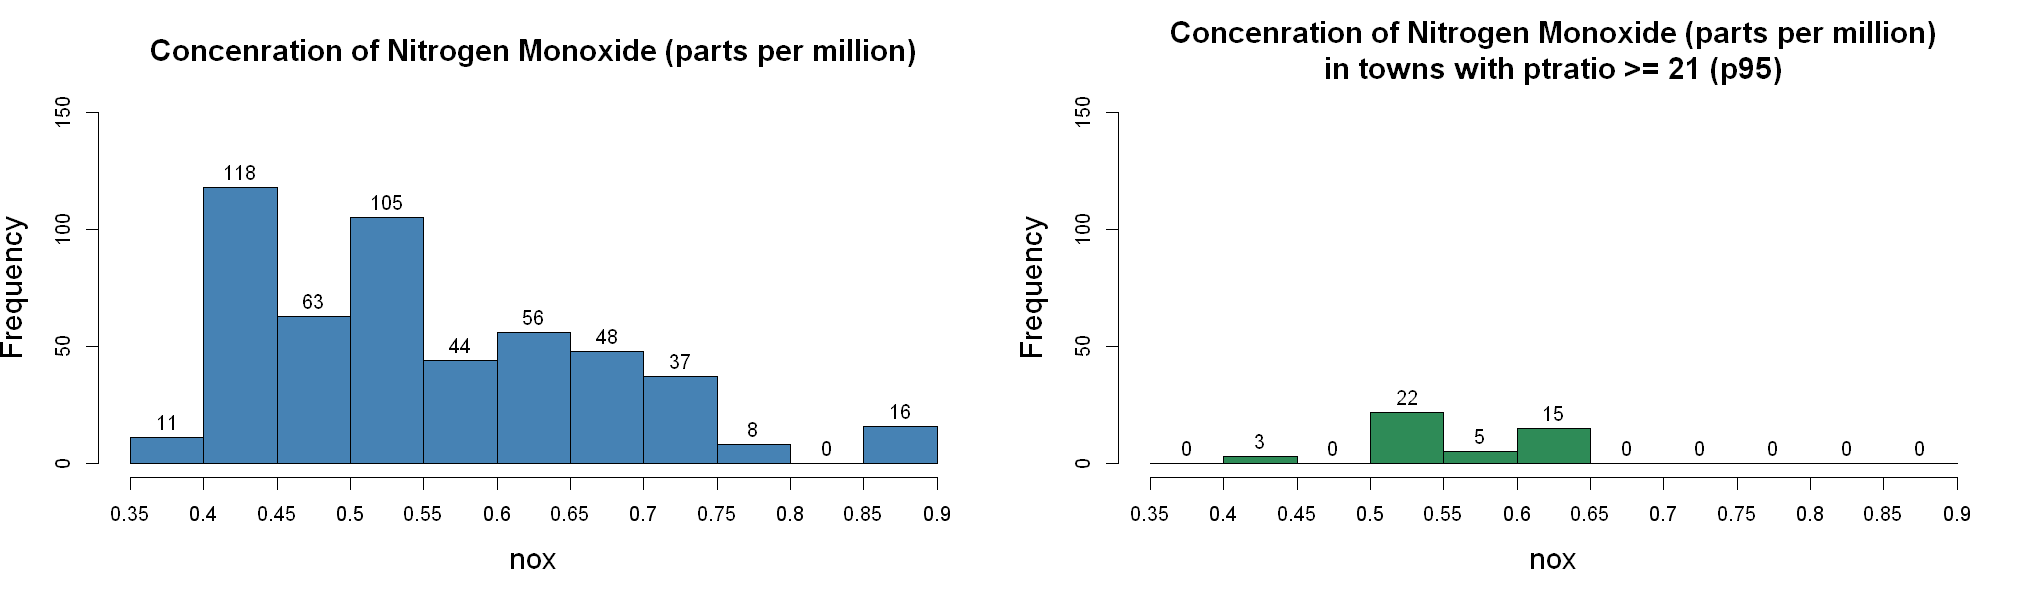

In [93]:
multihist(df, hptr, 'nox', axis=T, yrange1=c(0,150), yrange2=c(0,150),
          title='Concenration of Nitrogen Monoxide (parts per million)', 
          subtitle='in towns with ptratio >= 21 (p95)')

###### rm

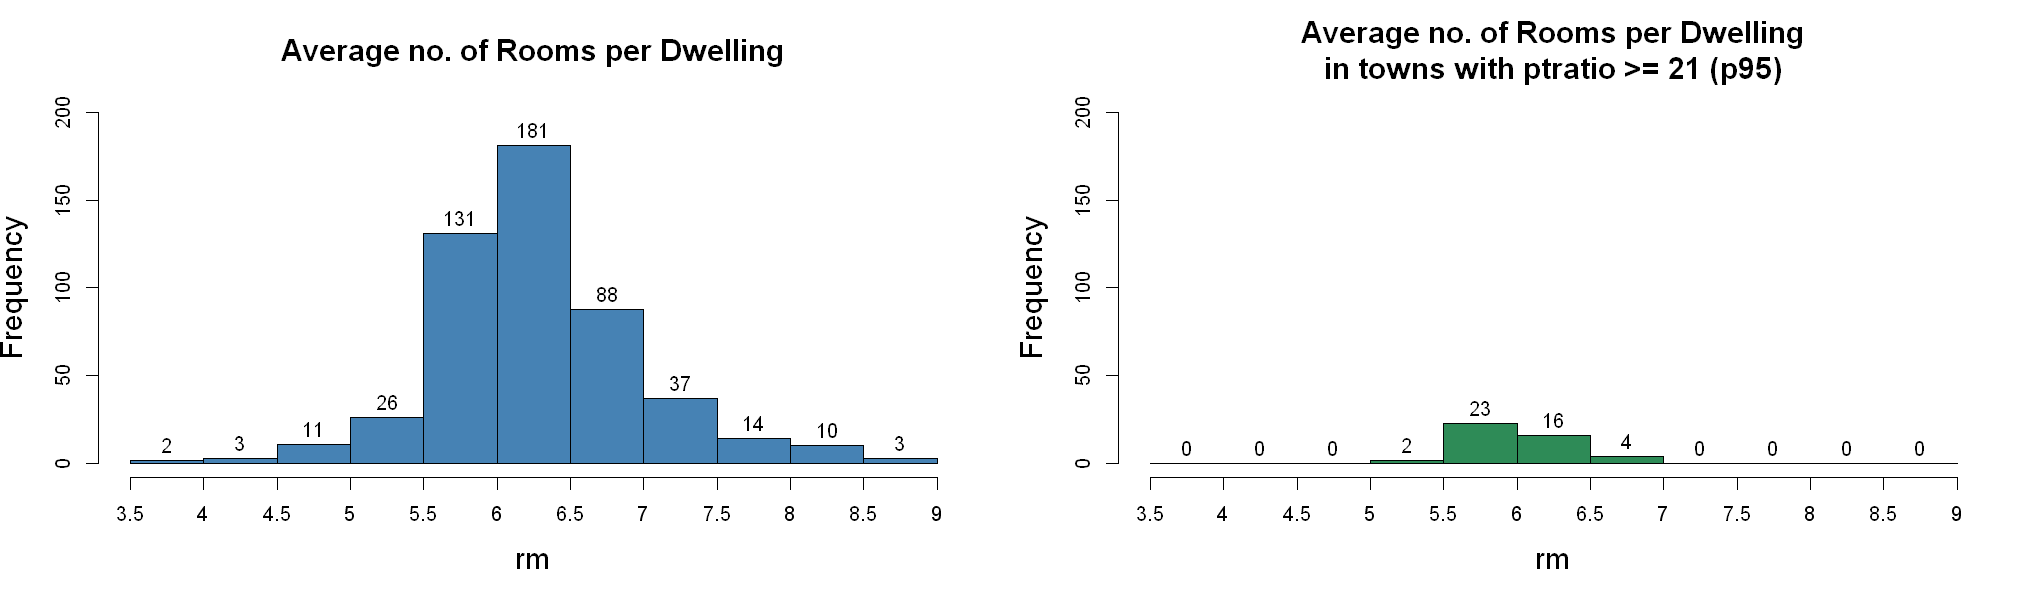

In [94]:
multihist(df, hptr, 'rm', axis=T, yrange1=c(0,200), yrange2=c(0,200),
          title='Average no. of Rooms per Dwelling', 
          subtitle='in towns with ptratio >= 21 (p95)')

###### age

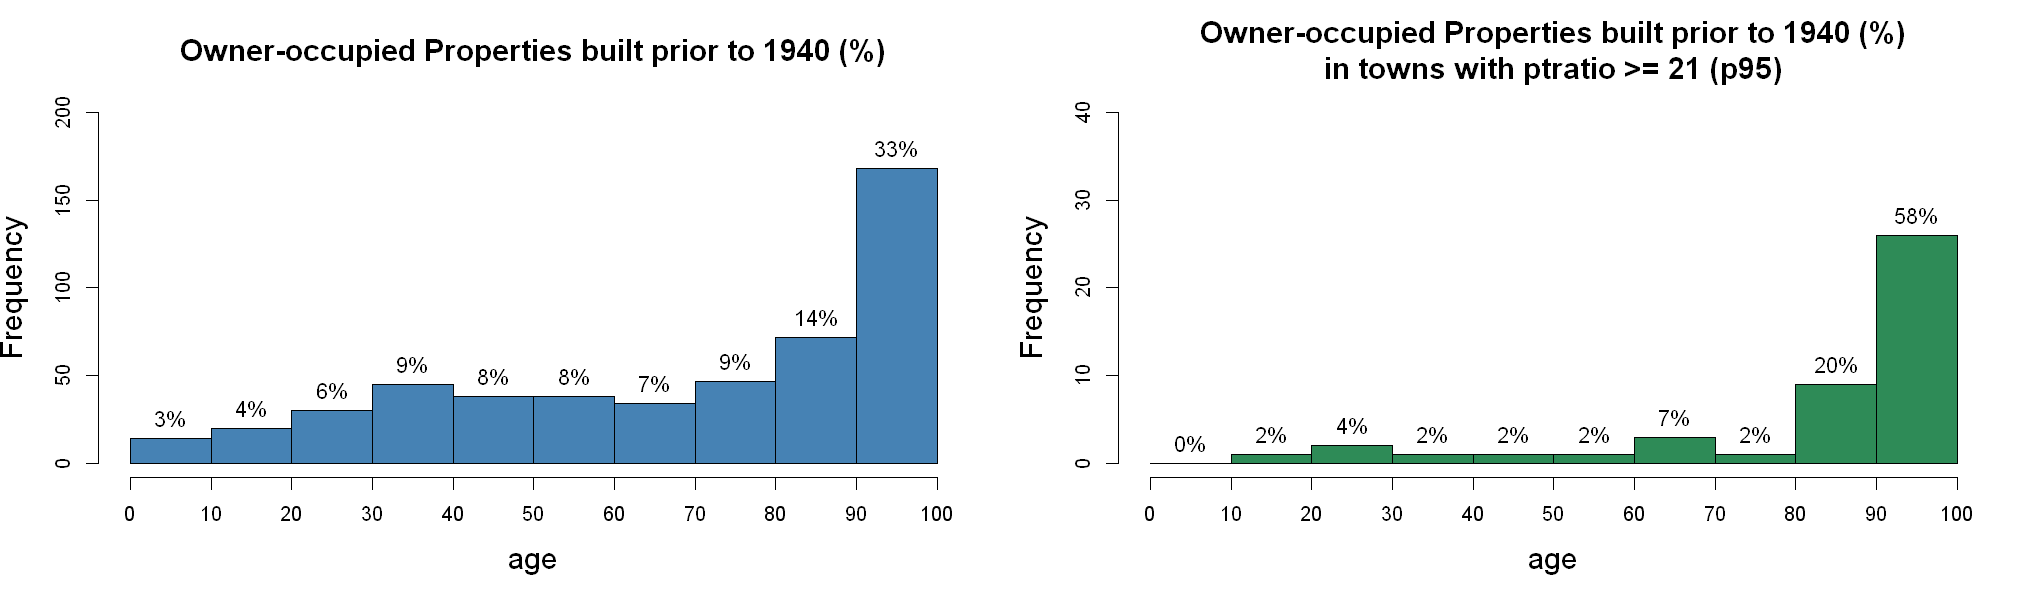

In [95]:
multihist(df, hptr, 'age', axis=T, yrange1=c(0,200), yrange2=c(0,40), perc=T,
          title='Owner-occupied Properties built prior to 1940 (%)', 
          subtitle='in towns with ptratio >= 21 (p95)')

###### dis

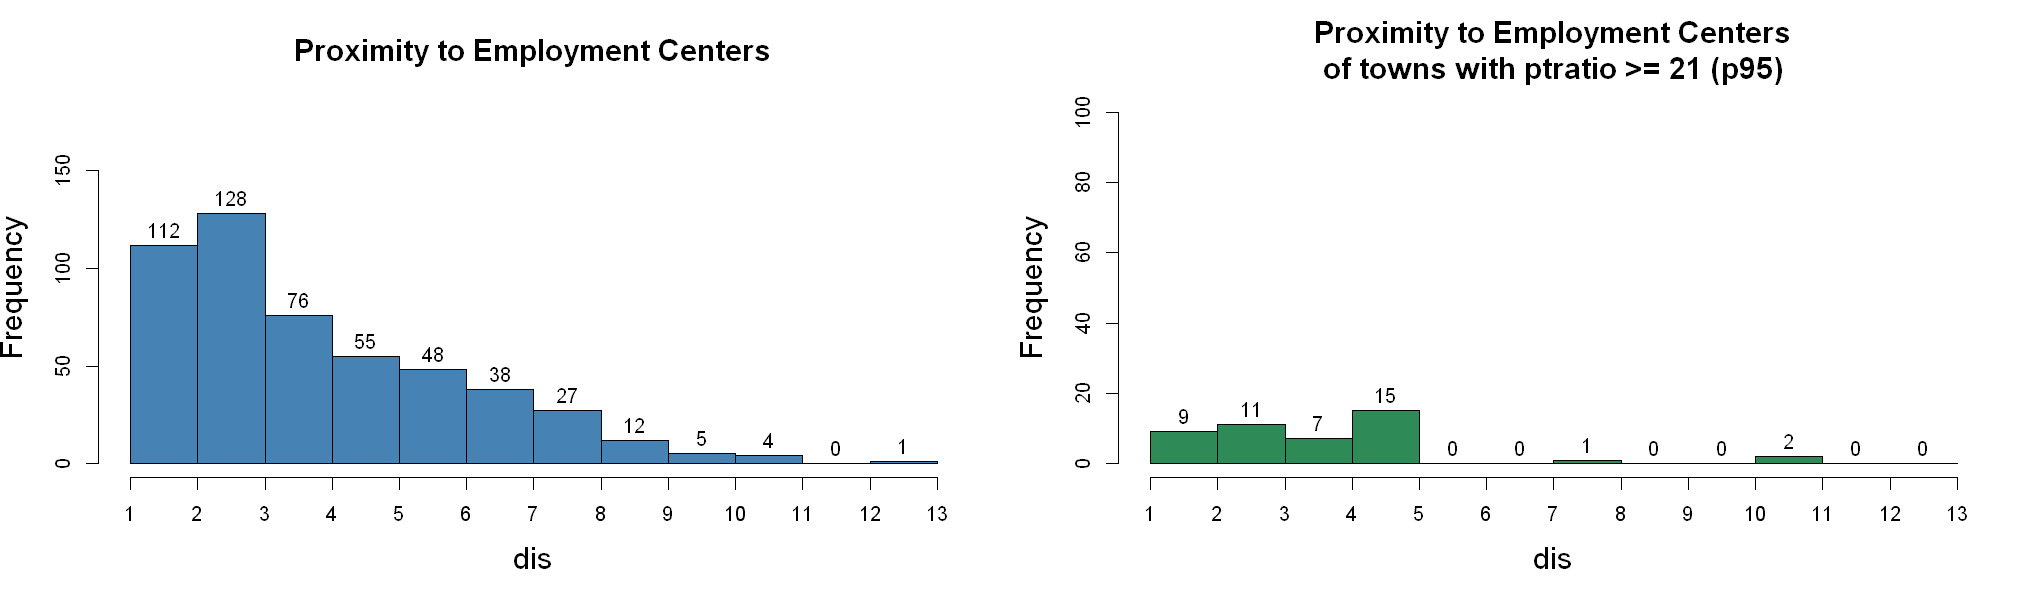

In [96]:
multihist(df, hptr, 'dis', axis=T, yrange1=c(0,180), yrange2=c(0,100),
          title='Proximity to Employment Centers', subtitle='of towns with ptratio >= 21 (p95)')

###### rad

,count_df1,prop_df1,count_df2,prop_df2,ratio
1,20,0.040,5,0.111,2.775
3,38,0.075,1,0.022,0.293
4,110,0.217,39,0.867,3.995
total,168,0.332,45,1.000,3.012


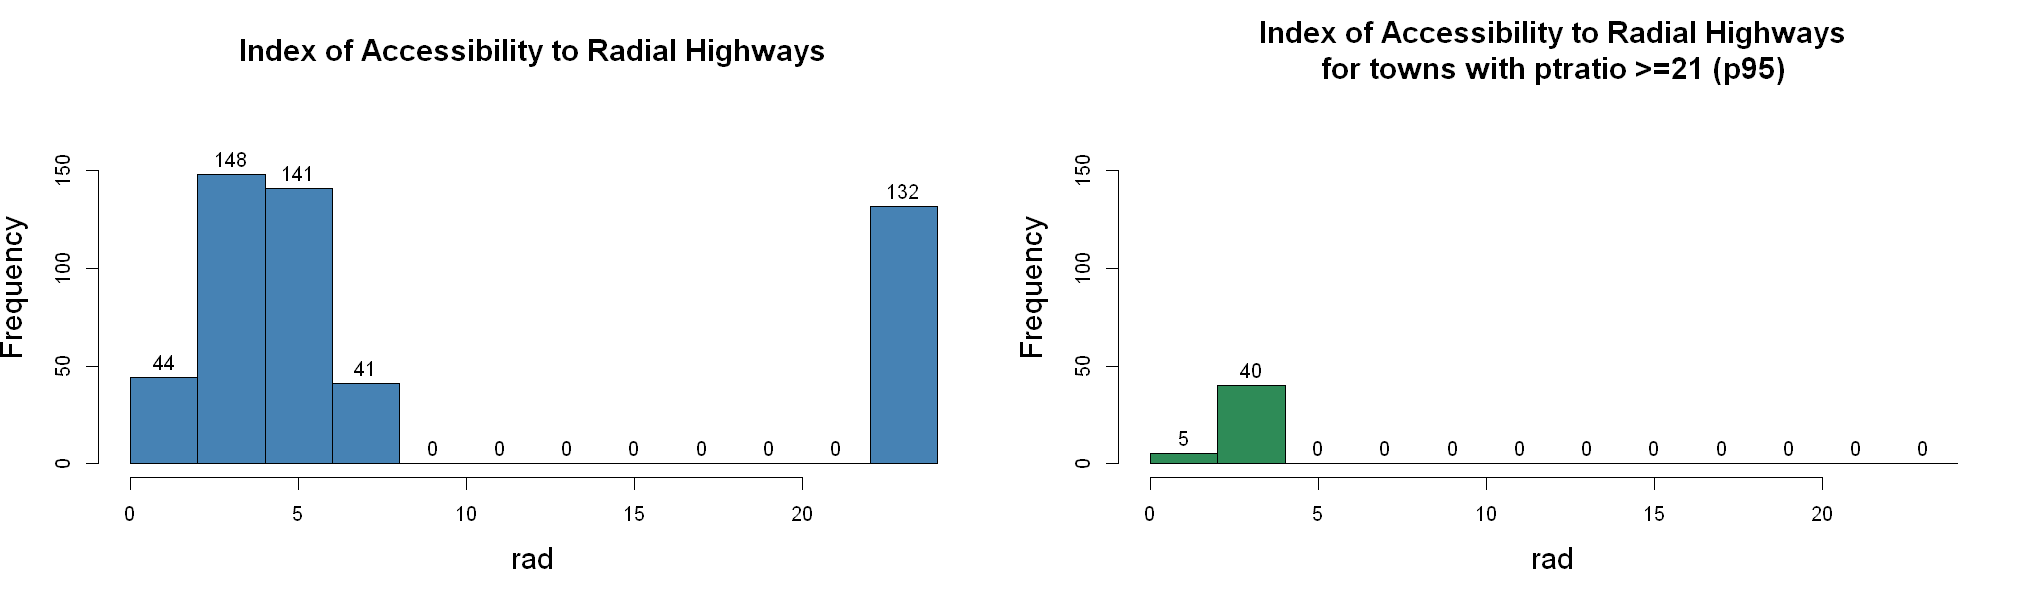

In [97]:
var_prop(df, hptr, 'rad', sort(unique(hptr$rad)))
multihist(df, hptr, 'rad', yrange1=c(0,180), yrange2=c(0,180), 
          title='Index of Accessibility to Radial Highways', 
          subtitle='for towns with ptratio >=21 (p95)')

###### tax

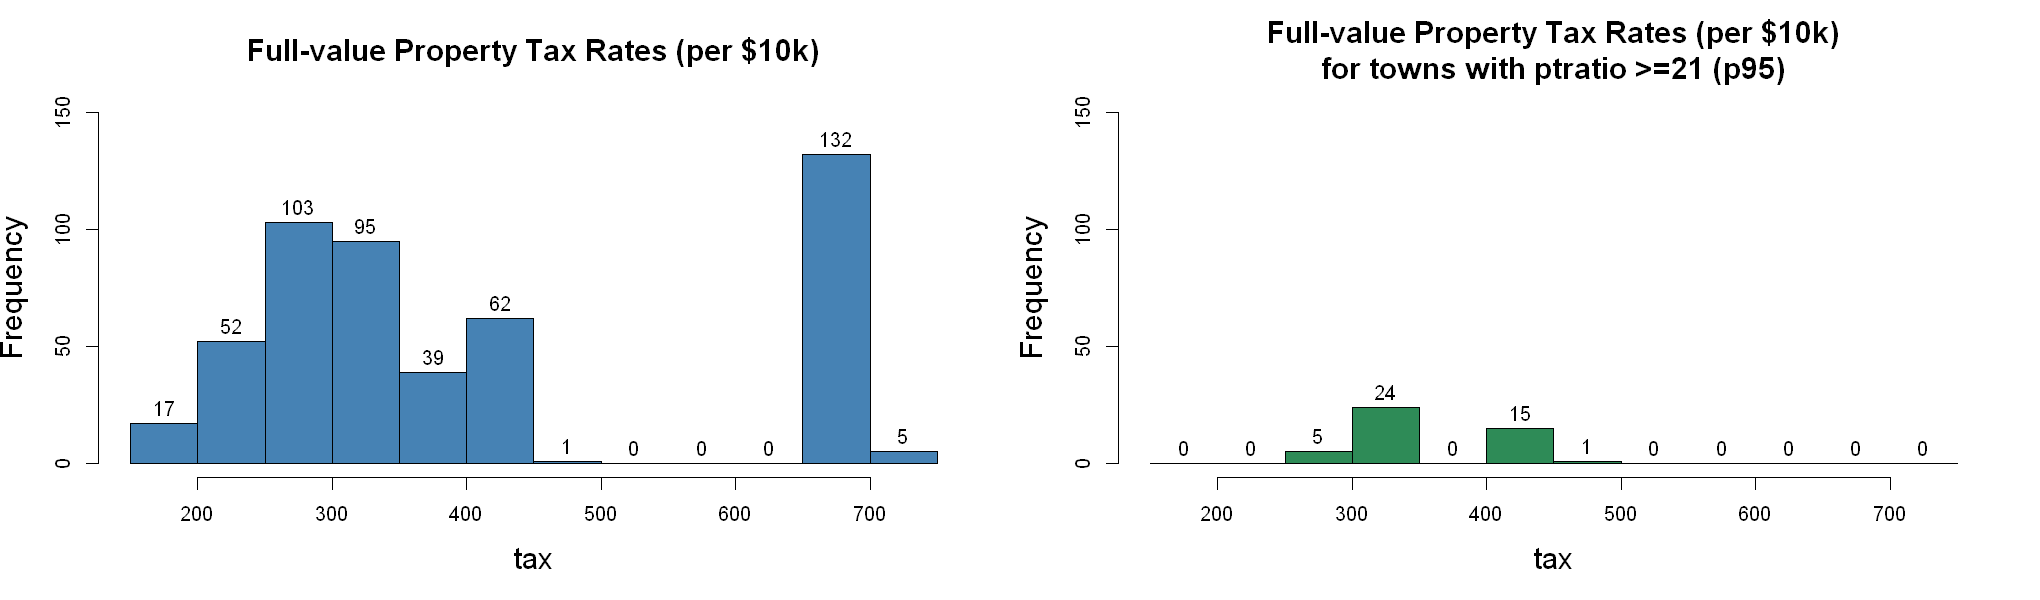

In [98]:
multihist(df, hptr, 'tax', yrange1=c(0,150), yrange2=c(0,150), 
          title=paste('Full-value Property Tax Rates (per $10k)'), 
          subtitle='for towns with ptratio >=21 (p95)')

###### black

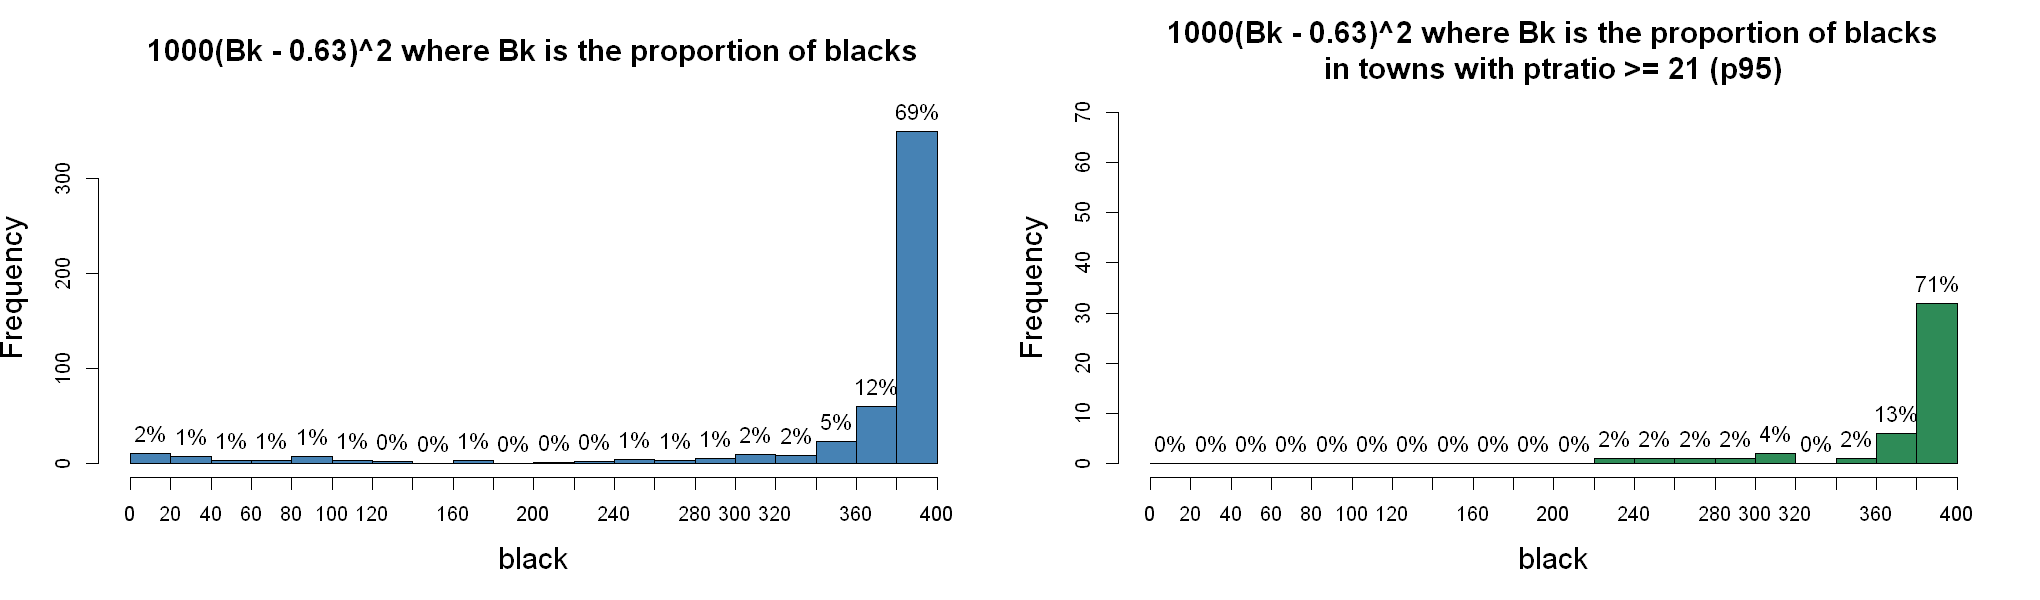

In [99]:
multihist(df, hptr, 'black', nclass=15, axis=T, yrange1=c(0,370), yrange2=c(0,70),
          title='1000(Bk - 0.63)^2 where Bk is the proportion of blacks', 
          subtitle='in towns with ptratio >= 21 (p95)', perc=T)

###### lstat

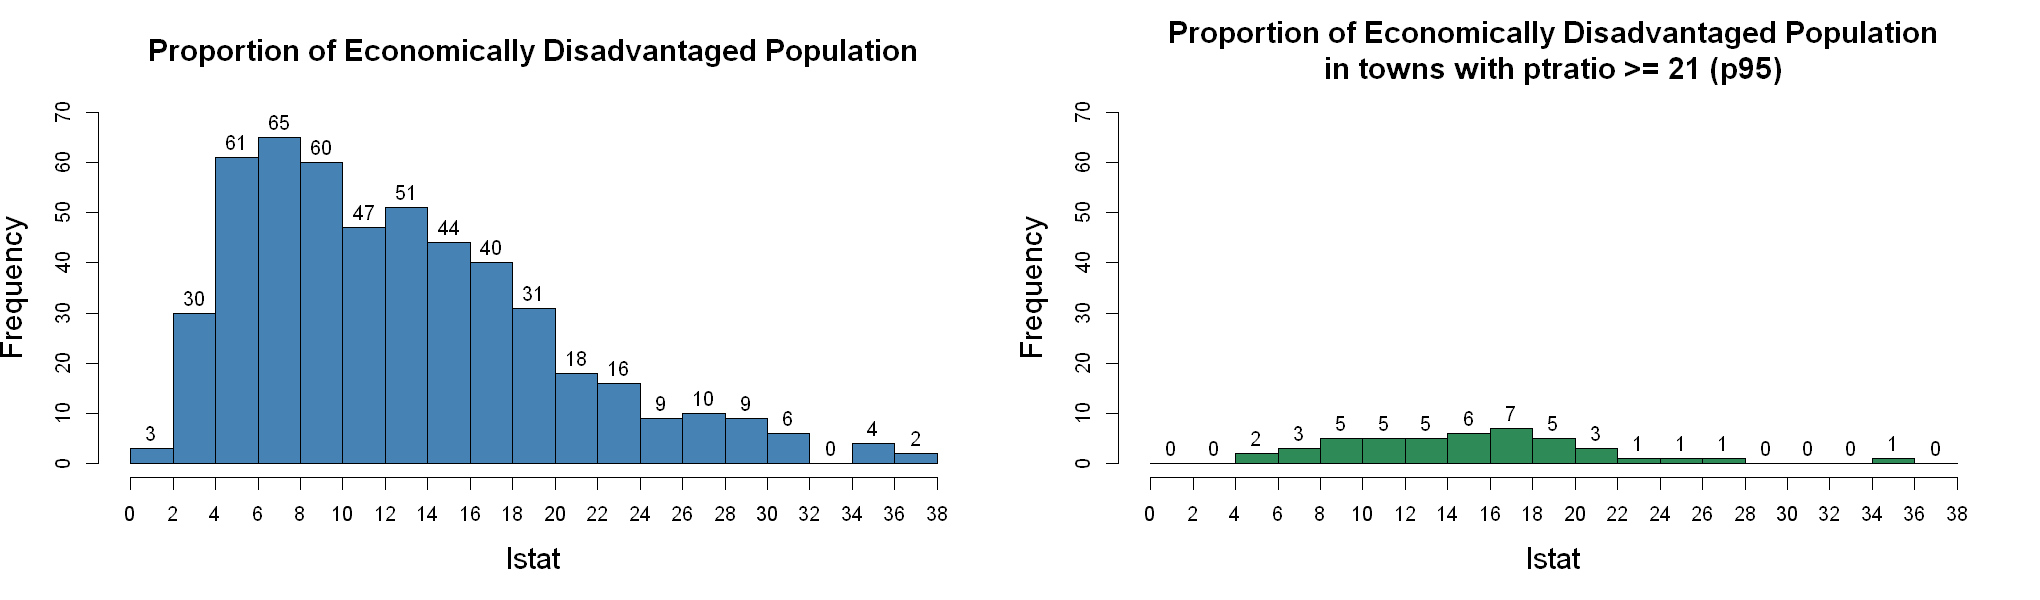

In [100]:
multihist(df, hptr, 'lstat', nclass='FD', axis=T, yrange1=c(0,70), yrange2=c(0,70), perc=F,
          title='Proportion of Economically Disadvantaged Population', 
          subtitle='in towns with ptratio >= 21 (p95)')

###### medv

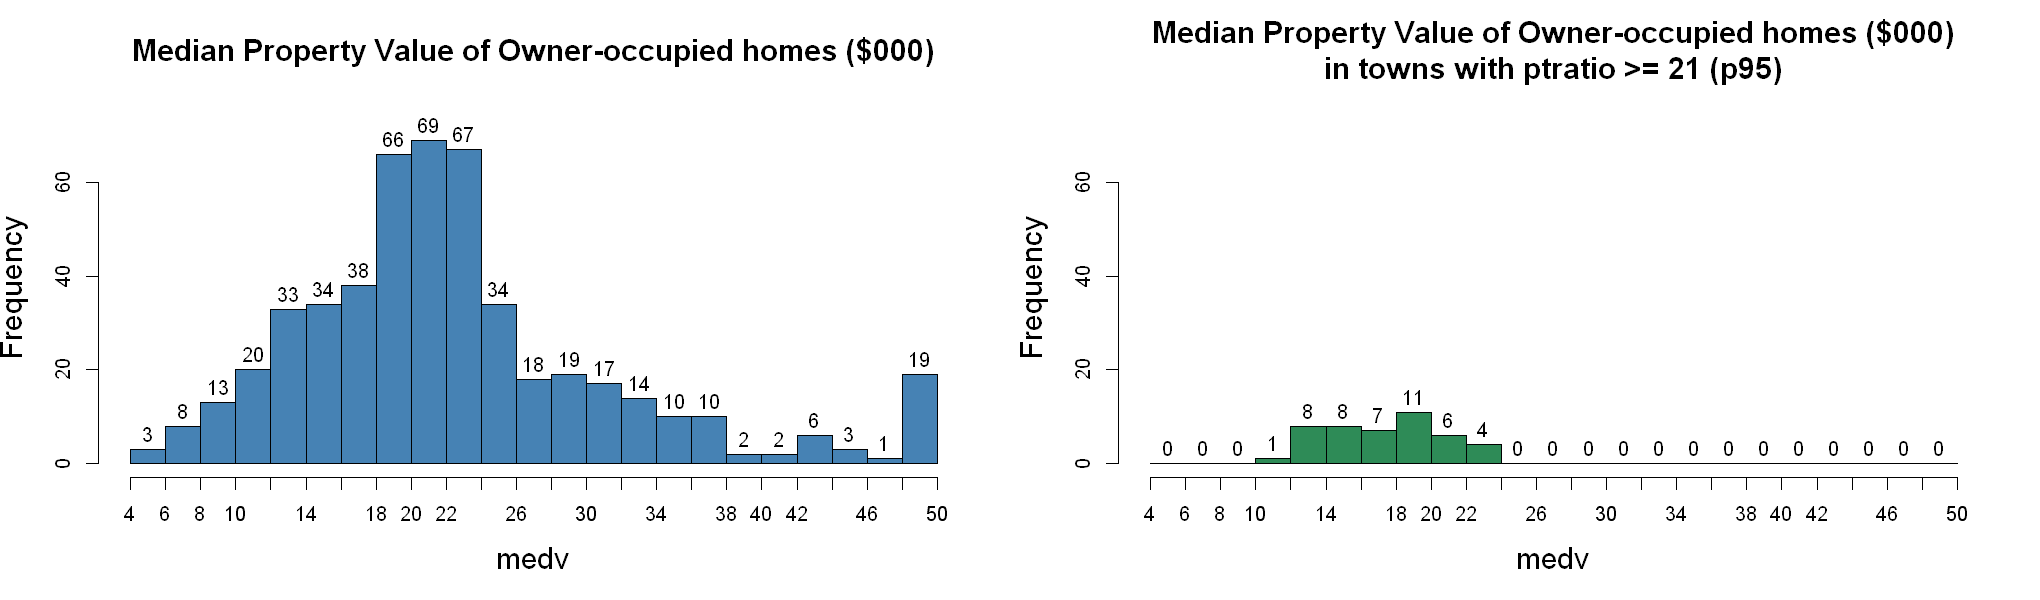

In [101]:
multihist(df, hptr, 'medv', nclass='FD', axis=T, yrange1=c(0,75), yrange2=c(0,75),
          title=paste("Median Property Value of Owner-occupied homes ($000)"), 
          subtitle='in towns with ptratio >= 21 (p95)')

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### e) Suburbs bounding Charles River
How many of the suburbs in this data set bound the Charles river?

In [102]:
sum(df$chas[df$chas==1])

[1] 35

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### f) Median pupil-teacher ratio
What is the median pupil-teacher ratio among the towns in this data set?

In [103]:
median(df$ptratio)

[1] 19.05

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### g) Lowest medv Suburb
Which suburb of Boston has lowest median value of owner-occupied homes? 
What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? 
Comment on your findings.

In [104]:
# Suburb(s) with lowest median home value
low_medv = df[df$medv == min(df$medv),]
low_medv

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
406,67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5


In [105]:
# Percentiles for low_medv
perc = data.frame(mapply(function(x, y) round(ecdf(x)(y), 3), df, low_medv), 
                         row.names=paste0(rownames(low_medv),'_P'))

# Values and ranks
low_medv = rbind(low_medv, perc)[c(1,3,2,4),]
low_medv

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
399,38.3518,0.000,18.100,0.000,0.693,5.453,100,1.4896,24,666.00,20.200,396.90,30.590,5.000
399_P,0.9880,0.735,0.887,0.931,0.858,0.077,1,0.0570,1,0.99,0.889,1.00,0.978,0.004
406,67.9208,0.000,18.100,0.000,0.693,5.683,100,1.4254,24,666.00,20.200,384.97,22.980,5.000
406_P,0.9960,0.735,0.887,0.931,0.858,0.136,1,0.0420,1,0.99,0.889,0.35,0.899,0.004


Note: results of `ecdf(x)(y)` are equivalant to `rank(x, ties.method='max')/length(x)`

In [106]:
# Summary of full dataset
summ = rbind('mean'=sapply(df, mean), 
             sapply(df, quantile, probs=c(0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.99)))

# Table
t(round(rbind(low_medv, summ), 3))

,399,399_P,406,406_P,mean,5%,10%,25%,50%,75%,90%,95%,99%
crim,38.352,0.988,67.921,0.996,3.614,0.028,0.038,0.082,0.257,3.677,10.753,15.789,41.370
zn,0.000,0.735,0.000,0.735,11.364,0.000,0.000,0.000,0.000,12.500,42.500,80.000,90.000
indus,18.100,0.887,18.100,0.887,11.137,2.180,2.910,5.190,9.690,18.100,19.580,21.890,25.650
chas,0.000,0.931,0.000,0.931,0.069,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
nox,0.693,0.858,0.693,0.858,0.555,0.409,0.427,0.449,0.538,0.624,0.713,0.740,0.871
rm,5.453,0.077,5.683,0.136,6.285,5.314,5.594,5.886,6.208,6.624,7.152,7.588,8.335
age,100.000,1.000,100.000,1.000,68.575,17.725,26.950,45.025,77.500,94.075,98.800,100.000,100.000
dis,1.490,0.057,1.425,0.042,3.795,1.462,1.628,2.100,3.207,5.188,6.817,7.828,9.223
rad,24.000,1.000,24.000,1.000,9.549,2.000,3.000,4.000,5.000,24.000,24.000,24.000,24.000
tax,666.000,0.990,666.000,0.990,408.237,222.000,233.000,279.000,330.000,666.000,666.000,666.000,666.000


<a id='obs-medv'></a>
<div class="alert alert-block alert-info">
<h5>Observations</h5>

The towns with lowest median owner-occupied house values have the following features:<br>
    • <b>crim</b> &rarr; amongst the highest crime rates, nearly p99<br>
    • <b>zn</b> &rarr; zn below p75<br>
    • <b>indus</b> &rarr; high indus, about p75<br>
    • <b>chas</b> &rarr; not bounded by Charles River, just like 90% of the towns<br>
    • <b>nox</b> &rarr; above p75<br>
    • <b>rm</b> &rarr; low rm, below p15<br>
    • <b>age</b> &rarr; above p95<br>
    • <b>dis</b> &rarr; very low dis, below p6<br>
    • <b>rad</b> &rarr; highest rad index<br>
    • <b>tax</b> &rarr; highest tax bracket<br>
    • <b>ptratio</b> &rarr; high, above p88<br>
    • <b>black</b> &rarr; one town has high, other has low<br>
    • <b>lstat</b> &rarr; above p89<br>

*Summarily*:<br>
    • <b>90th percentile or more</b> &rarr; crim, age, rad, tax, lstat (approx.)<br>
    • <b>75th - 90th percentile</b> &rarr; indus, nox, ptratio<br>
    • <b>15th percentile or less</b> &rarr; zn, chas, rm, dis<br>
    
*percentile rank is denoted by 'pXX'*
</div>

[go to toc](#toc2)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### h) Suburbs with high average no. of rooms
In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?  
Comment on the suburbs that average more than eight rooms per dwelling.

In [107]:
# Above 7 rooms per dwelling on an average
length(df$rm[df$rm > 7])

[1] 64

In [108]:
# Above 8 rooms per dwelling on an average
hrmt = df[df$rm > 8, ]
nrow(hrmt)

[1] 13

In [109]:
# Percentile table - hrmt
summ_hrmt = custom_summary(hrmt, r=3, p_reqd_n=c(0.05,0.95), p_lev_n=c('5%','95%'))
summ_hrmt

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min,0.020,0.000,2.680,0.000,0.416,8.034,8.400,1.801,2.000,224.000,13.000,354.550,2.470,21.90
5%,0.081,0.000,2.806,0.000,0.425,8.038,22.500,1.863,3.200,248.000,13.000,369.190,2.716,31.32
10%,0.160,0.000,3.106,0.000,0.434,8.046,38.920,1.956,4.200,264.000,13.000,379.560,2.930,37.82
25%,0.331,0.000,3.970,0.000,0.504,8.247,70.400,2.288,5.000,264.000,14.700,384.540,3.320,41.70
50%,0.520,0.000,6.200,0.000,0.507,8.297,78.300,2.894,7.000,307.000,17.400,386.860,4.140,48.30
Mean,0.719,13.615,7.078,0.154,0.539,8.349,71.538,3.430,7.462,325.077,16.362,385.211,4.310,44.20
75%,0.578,20.000,6.200,0.000,0.605,8.398,86.500,3.652,8.000,307.000,17.400,389.700,5.120,50.00
90%,1.338,21.600,15.720,0.800,0.647,8.721,90.580,4.862,8.000,388.400,18.880,395.630,5.786,50.00
95%,2.301,51.200,18.692,1.000,0.675,8.747,92.460,6.633,14.400,508.200,19.540,396.900,6.522,50.00


In [110]:
# Percentile table - overall
summ_df = custom_summary(df, r=3, p_reqd_n=c(0.05,0.95), p_lev_n=c('5%','95%'))
summ_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
5%,0.028,0.000,2.180,0.000,0.409,5.314,17.725,1.462,2.000,222.000,14.700,84.590,3.708,10.200
10%,0.038,0.000,2.910,0.000,0.427,5.594,26.950,1.628,3.000,233.000,14.750,290.270,4.680,12.750
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
Mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
90%,10.753,42.500,19.580,0.000,0.713,7.152,98.800,6.817,24.000,666.000,20.900,396.900,23.035,34.800
95%,15.789,80.000,21.890,1.000,0.740,7.588,100.000,7.828,24.000,666.000,21.000,396.900,26.808,43.400


blue : df
red : hrmt

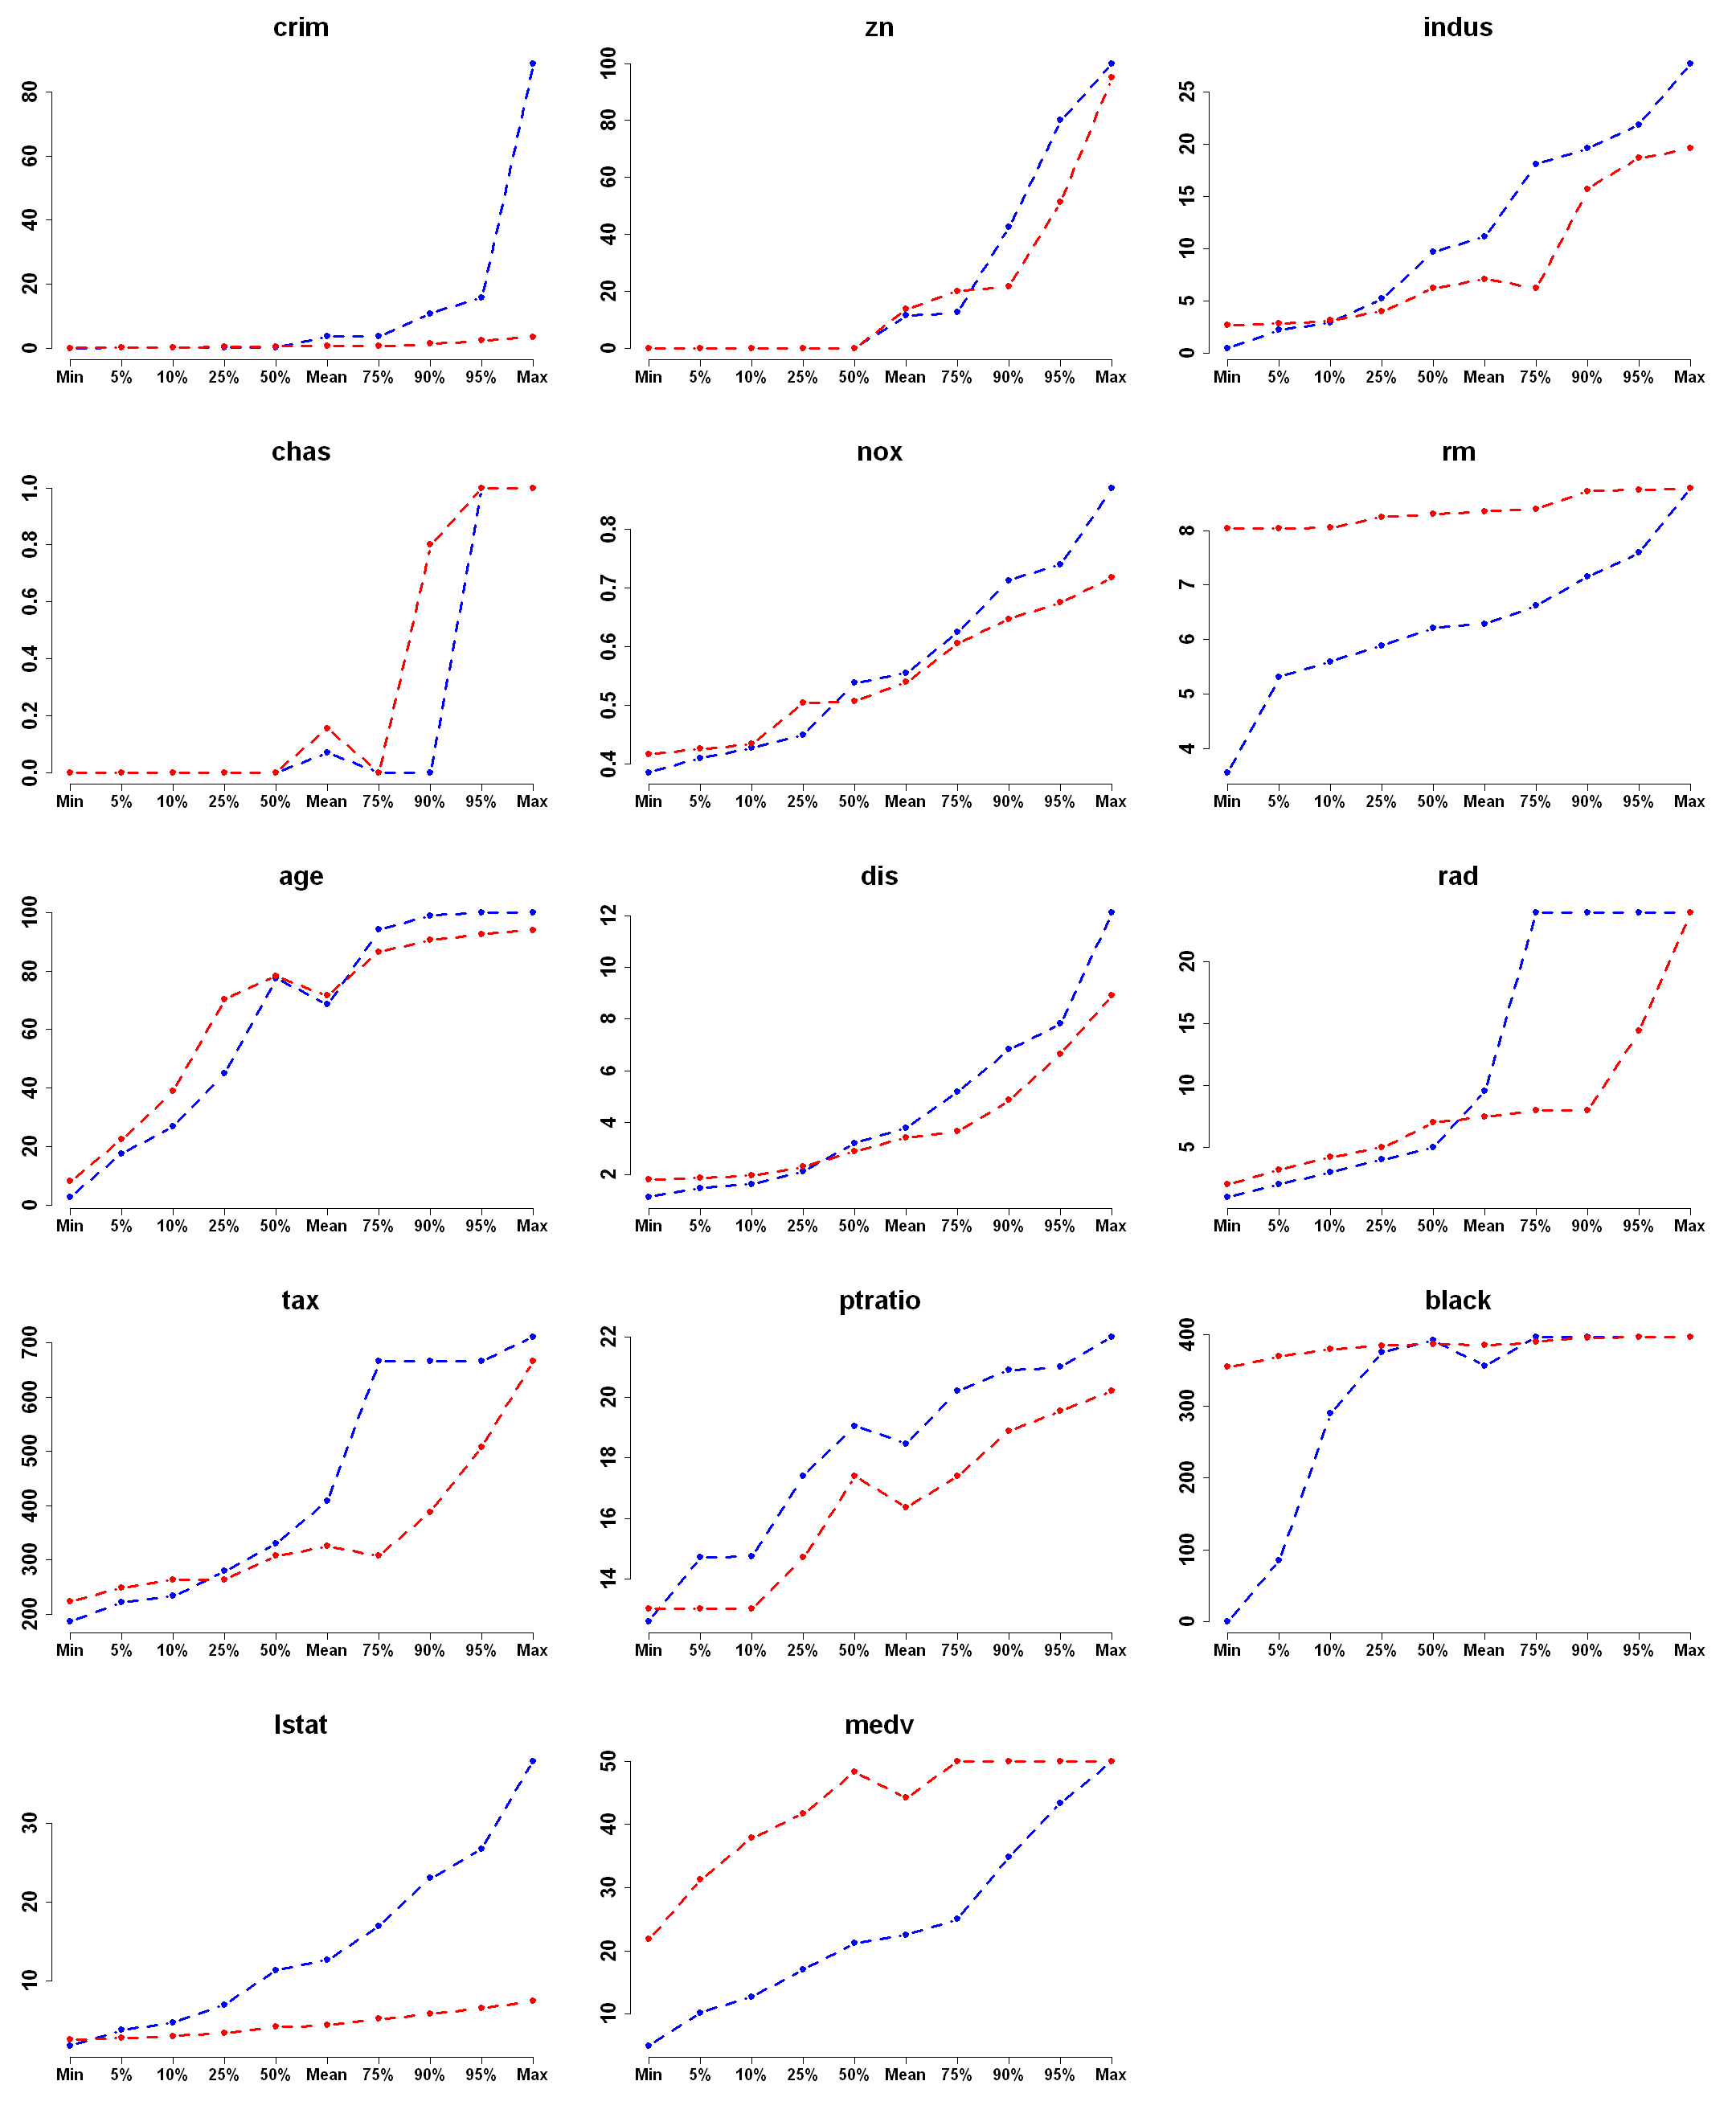

In [111]:
# Comparison of summary statistics
plot_pars(18,22)
par(mfrow=c(5,3))
for (var in colnames(summ_df)) {
    plot(summ_df[, var], type='b', pch=19, col='blue', lty=2, lwd=3, xaxt='n', frame=F,
         cex.axis=2, font.axis=2, cex.main=2.5, xlab='', ylab='',
         main=var)
    axis(side=1, at=seq(nrow(summ_df)), labels=rownames(summ_df), cex.axis=1.5, font.axis=2)
    lines(summ_hrmt[, var], type='b', pch=19, col='red', lty=2, lwd=3)
}
cat('blue : df\n')
cat('red : hrmt')

<a id='obs-hrmt'></a>
<div class="alert alert-block alert-info">
<h5>Observations</h5>
The towns with more than 8 no. of rooms differ from the overall dataset on the following points:<br>
    &ensp; <i><u>Major divergence</u></i><br>
    • <b>crim</b> &rarr; all of the towns have very low crime rates, max crim in hrmt is lower than p75 of df <br>
    • <b>black</b> &rarr; none of the towns have very low black figures <br>
    • <b>lstat</b> &rarr; low lstat levels; max lstat of hrmt is little higher than p25 of df<br>
    • <b>medv</b> &rarr; higher medv levels, p5 of hrmt is higher than p75 of df<br>
    &ensp; <i><u>Minor divergence</u></i><br>
    • <b>indus</b> &rarr; range of indus is slightly smaller, generally lower indus levels<br>
    • <b>rad</b> &rarr; very few cases of high radial highway accessibility<br>
    • <b>tax</b> &rarr; mostly medium tax bracket towns, p90 of hrmt &lt; mean of df<br>
    • <b>ptratio</b> &rarr; generally one notch below df levels<br>
    
*percentile rank is denoted by 'pXX'*
</div>

[go to toc](#toc2)

##### --&nbsp; Workings &nbsp; --------------------------------------------------------------

###### zn

In [112]:
var_prop(df, hrmt, 'zn', sort(unique(hrmt$zn)))

,count_df1,prop_df1,count_df2,prop_df2,ratio
0,372,0.735,8,0.615,0.837
20,21,0.042,3,0.231,5.500
22,10,0.020,1,0.077,3.850
95,4,0.008,1,0.077,9.625
total,407,0.805,13,1.000,1.242


###### indus

In [113]:
var_prop(df, hrmt, 'indus', sort(unique(hrmt$indus)))

,count_df1,prop_df1,count_df2,prop_df2,ratio
2.68,2,0.004,1,0.077,19.250
2.89,5,0.010,1,0.077,7.700
3.97,12,0.024,3,0.231,9.625
5.86,10,0.020,1,0.077,3.850
6.2,18,0.036,5,0.385,10.694
18.1,132,0.261,1,0.077,0.295
19.58,30,0.059,1,0.077,1.305
total,209,0.414,13,1.001,2.418


###### chas

In [114]:
var_prop(df, hrmt, 'chas', c(0,1))

,count_df1,prop_df1,count_df2,prop_df2,ratio
0,471,0.931,11,0.846,0.909
1,35,0.069,2,0.154,2.232
total,506,1.000,13,1.000,1.000


######  rad

In [115]:
var_prop(df, hrmt, 'rad', sort(unique(hrmt$rad)))

,count_df1,prop_df1,count_df2,prop_df2,ratio
2,24,0.047,1,0.077,1.638
4,110,0.217,1,0.077,0.355
5,115,0.227,4,0.308,1.357
7,17,0.034,1,0.077,2.265
8,24,0.047,5,0.385,8.191
24,132,0.261,1,0.077,0.295
total,422,0.833,13,1.001,1.202


######  tax

In [116]:
var_prop(df, hrmt, 'tax', sort(unique(hrmt$tax)))

,count_df1,prop_df1,count_df2,prop_df2,ratio
224,10,0.020,1,0.077,3.850
264,12,0.024,3,0.231,9.625
276,9,0.018,1,0.077,4.278
307,40,0.079,5,0.385,4.873
330,10,0.020,1,0.077,3.850
403,30,0.059,1,0.077,1.305
666,132,0.261,1,0.077,0.295
total,243,0.481,13,1.001,2.081


######  black

In [117]:
var_prop(df, hrmt, 'black', sort(unique(hrmt$black)))

,count_df1,prop_df1,count_df2,prop_df2,ratio
354.55,1,0.002,1,0.077,38.500
378.95,1,0.002,1,0.077,38.500
382,1,0.002,1,0.077,38.500
384.54,1,0.002,1,0.077,38.500
385.05,1,0.002,1,0.077,38.500
385.91,1,0.002,1,0.077,38.500
386.86,1,0.002,1,0.077,38.500
387.38,1,0.002,1,0.077,38.500
388.45,2,0.004,1,0.077,19.250
389.7,1,0.002,1,0.077,38.500


<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[go to toc](#toc2)

<table>
<tr style="background-color:white">
    <th><b>-------------------------------------------- &ensp; &nbsp;</b></th>
    <th><img src="https://www.redwolf.in/image/cache/catalog/artwork-Images/mens/bugs-bunny-thats-all-folks-t-shirt-artwork-700x700.png" style="width:150px" style="display:inline-block; "/></th><th style="float:right"></th>
    <th><b>&ensp;--------------------------------------------</b></th>
</tr>
</table>